In [1]:
import os
import pandas as pd
import numpy as np
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
file_path = "../data/5M/INTC_5M.csv"
df = pd.read_csv(file_path)
df["timestamp"] = pd.to_datetime(df["Datetime"], utc=True, errors='coerce')
df = df.drop(columns=["Datetime"])
df.dropna(subset=["timestamp"], inplace=True)
df["timestamp"] = df["timestamp"].dt.tz_localize(None)
df = df.sort_values("timestamp").drop_duplicates()
df["item_id"] = "INTC"
df = df[["item_id", "timestamp", "Close"]]

data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp",
)
data = data.convert_frequency(freq="5T")
print(f"Data loaded: {len(data)} rows")

c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\autogluon\timeseries\dataset\ts_dataframe.py:1009: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


Data loaded: 24372 rows


In [3]:
prediction_length = 20
train_split = int(len(data) * 0.7)
train_data = data.iloc[:train_split]
test_data = data.iloc[train_split:]

predictor = TimeSeriesPredictor(prediction_length=prediction_length, target="Close").fit(
    train_data=train_data,
    hyperparameters={
        "Chronos": [
            {"model_path": "bolt_small", "ag_args": {"name_suffix": "ZeroShot"}},
            {"model_path": "bolt_small", "fine_tune": True, "ag_args": {"name_suffix": "FineTuned"}},
        ]
    },
    time_limit=300,
    enable_ensemble=False,
)
print("finito")

Beginning AutoGluon training... Time limit = 300s
AutoGluon will save models to 'c:\Users\micha\code\finance\diploma\notebooks\AutogluonModels\ag-20250720_174402'
AutoGluon will save models to 'c:\Users\micha\code\finance\diploma\notebooks\AutogluonModels\ag-20250720_174402'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          32
GPU Count:          0
Memory Avail:       43.96 GB / 63.10 GB (69.7%)
Disk Space Avail:   113.99 GB / 465.02 GB (24.5%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_small'},
                                 {'ag_args': {'name_suffix': 'FineTuned'},
                                  'fine_tune': True,
                                  'model_path': 'bol

finito



🔍 Making prediction #1 for window ending at 220
   ⚠️ Error generating baselines: Schur decomposition solver error.
   🎯 AutoGluon native plot for prediction #1...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:534: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args) / nobs


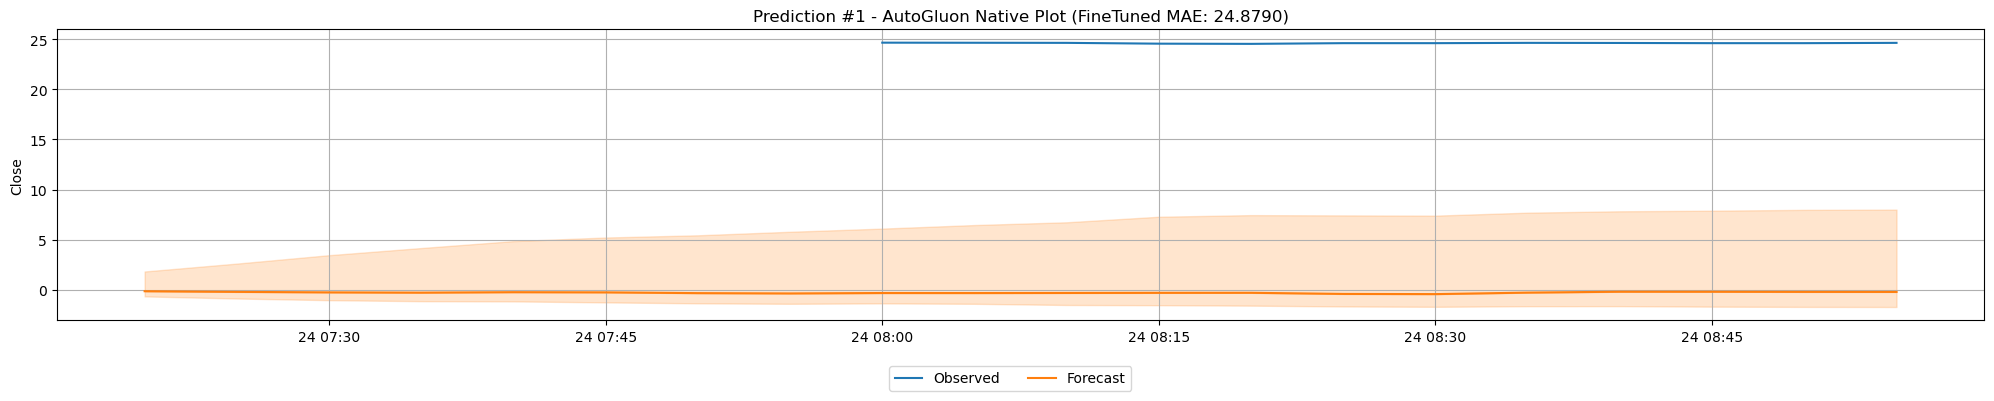

   📊 Custom comparison plot for prediction #1...


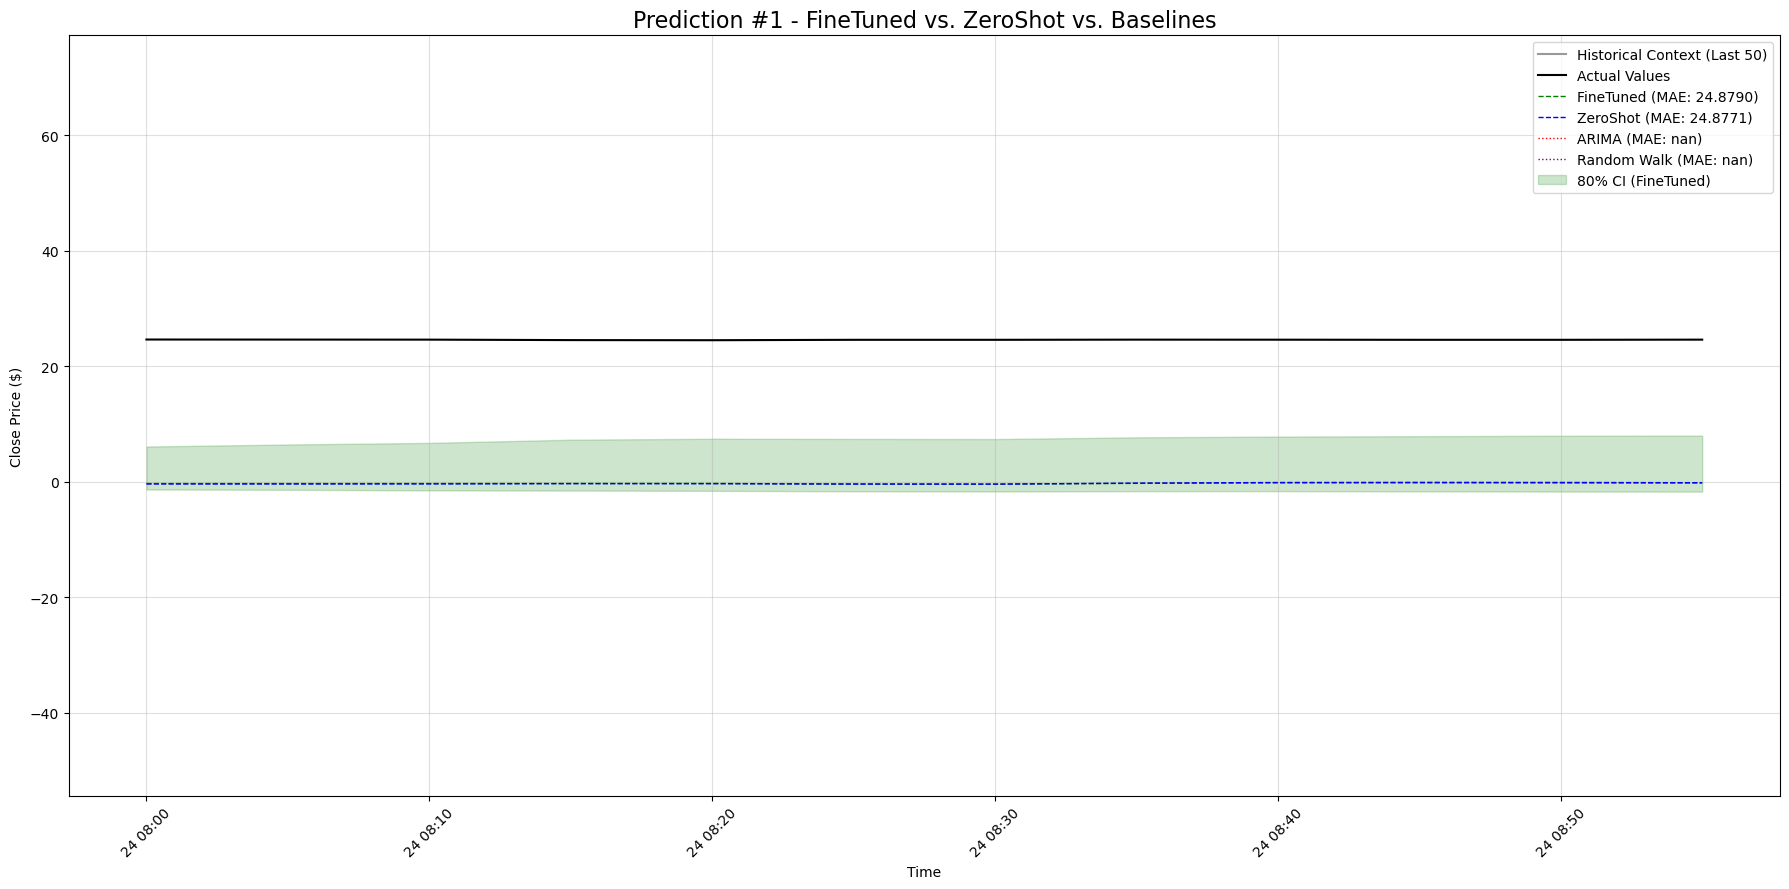

 ✅ FineTuned - MAE: 24.8790, RMSE: 24.8792
 ✅ ZeroShot  - MAE: 24.8771, RMSE: 24.8774
 ✅ ARIMA     - MAE: nan, RMSE: nan
 ✅ Random W. - MAE: nan, RMSE: nan
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_1_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_1_data.csv

🔍 Making prediction #2 for window ending at 364
   🎯 AutoGluon native plot for prediction #2...
   🎯 AutoGluon native plot for prediction #2...


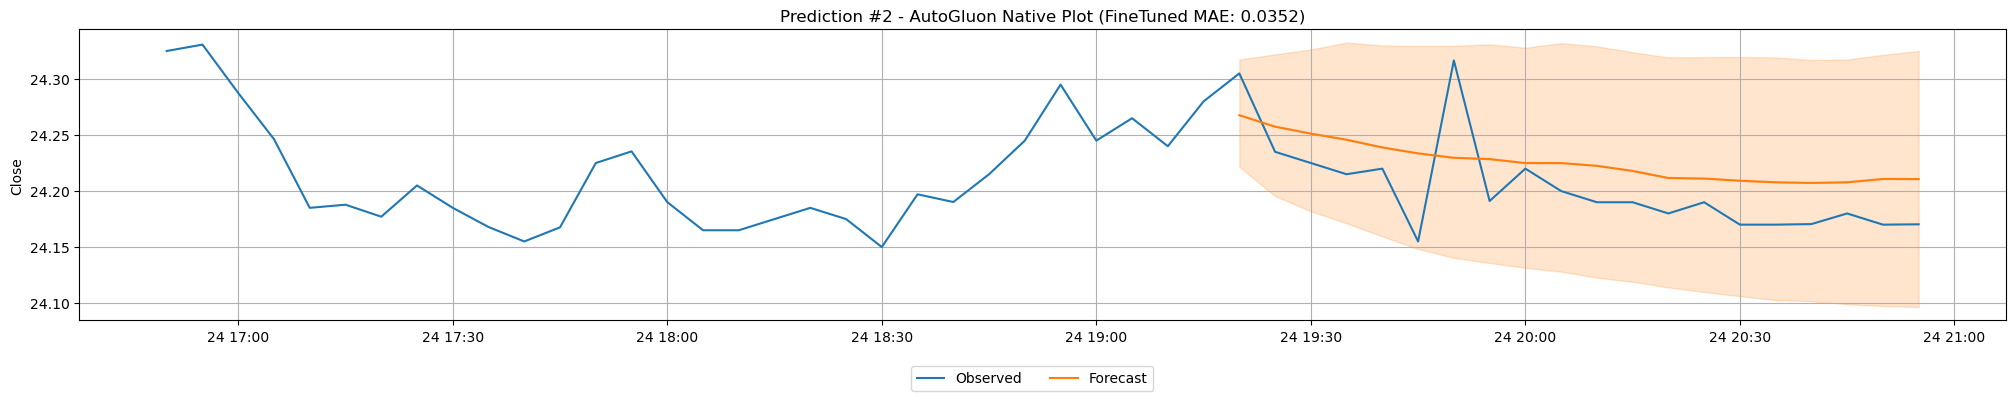

   📊 Custom comparison plot for prediction #2...


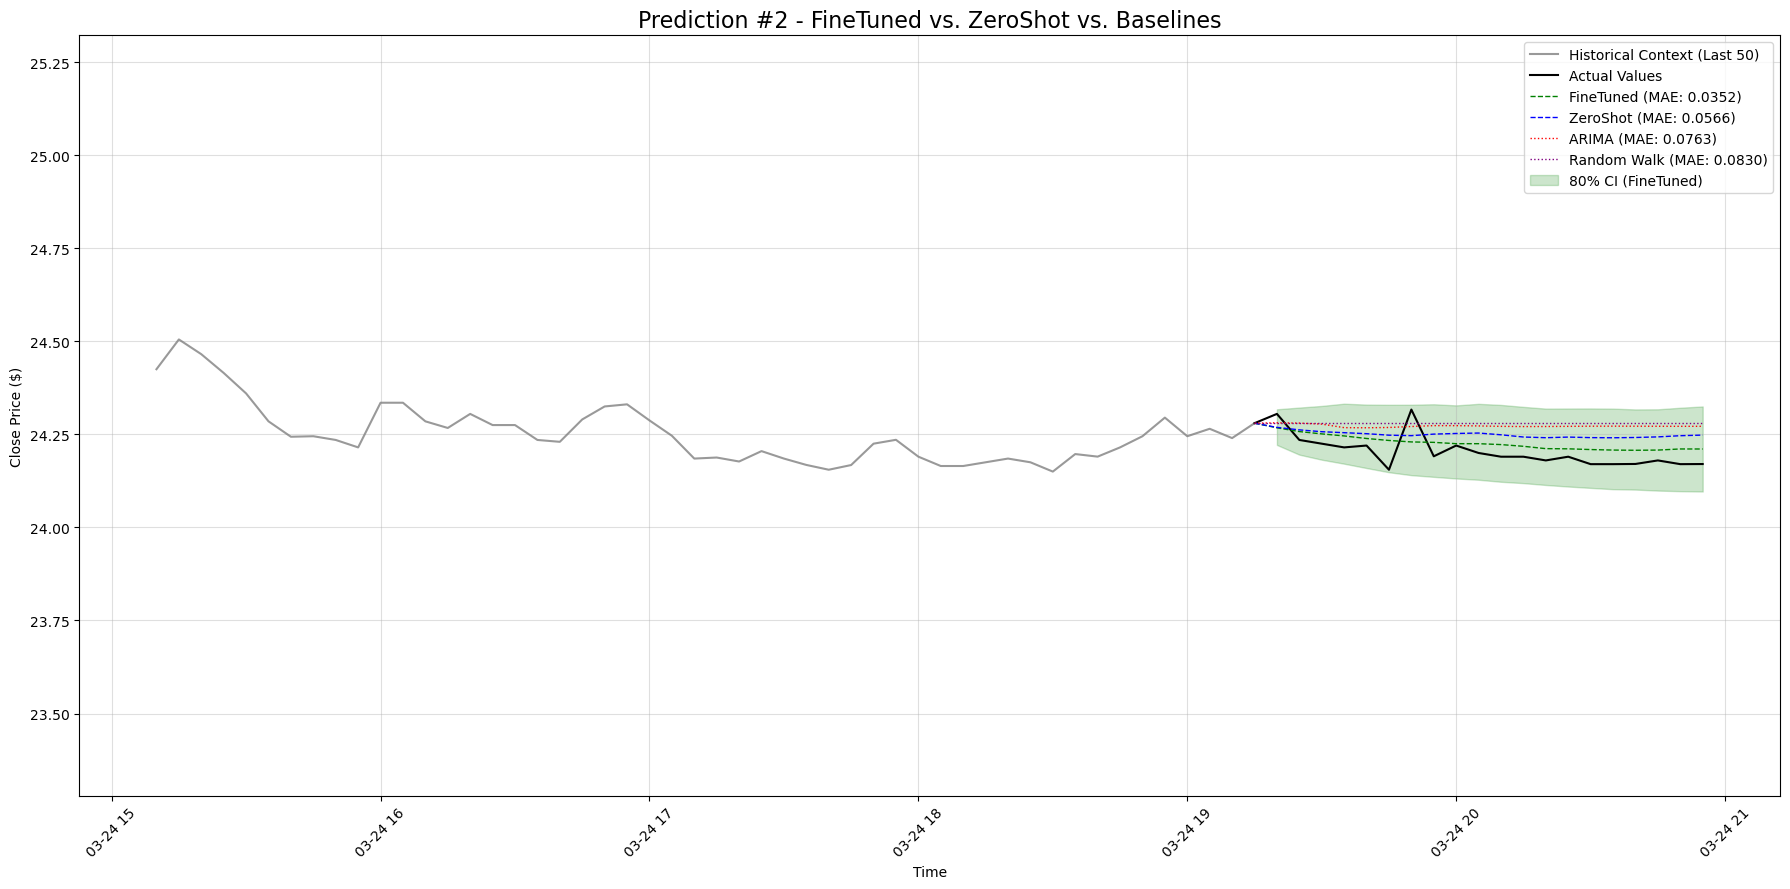

 ✅ FineTuned - MAE: 0.0352, RMSE: 0.0396
 ✅ ZeroShot  - MAE: 0.0566, RMSE: 0.0594
 ✅ ARIMA     - MAE: 0.0763, RMSE: 0.0802
 ✅ Random W. - MAE: 0.0830, RMSE: 0.0875
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_2_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_2_data.csv

🔍 Making prediction #3 for window ending at 509
   🎯 AutoGluon native plot for prediction #3...
   🎯 AutoGluon native plot for prediction #3...


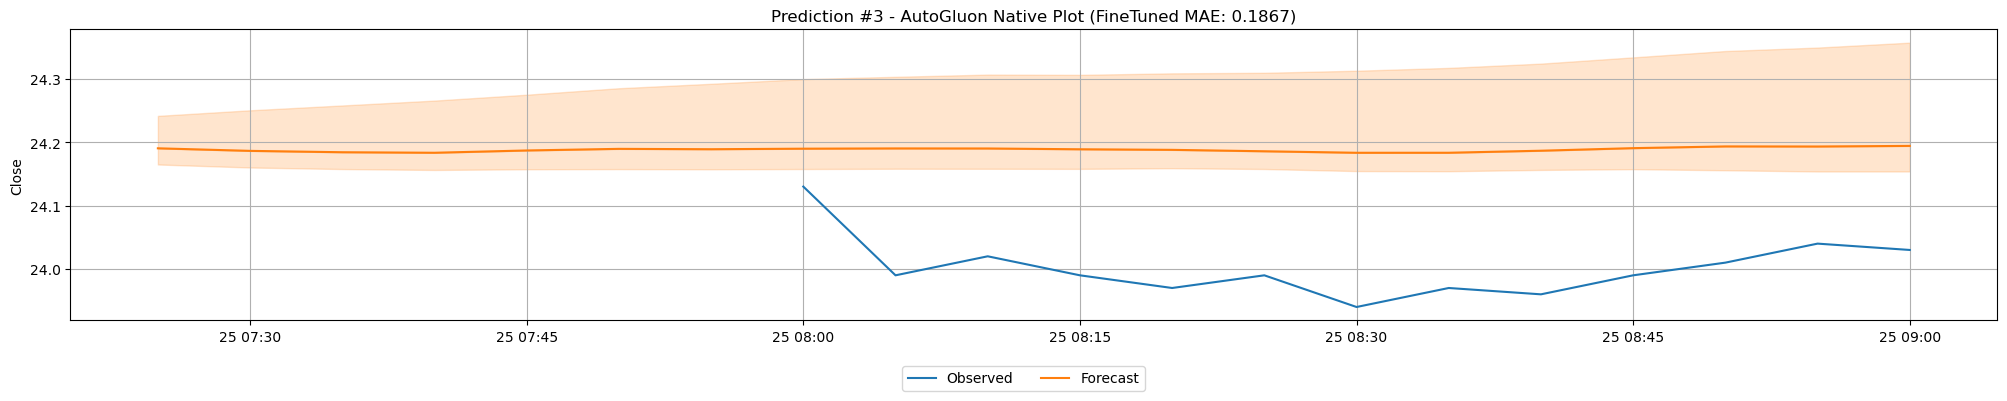

   📊 Custom comparison plot for prediction #3...


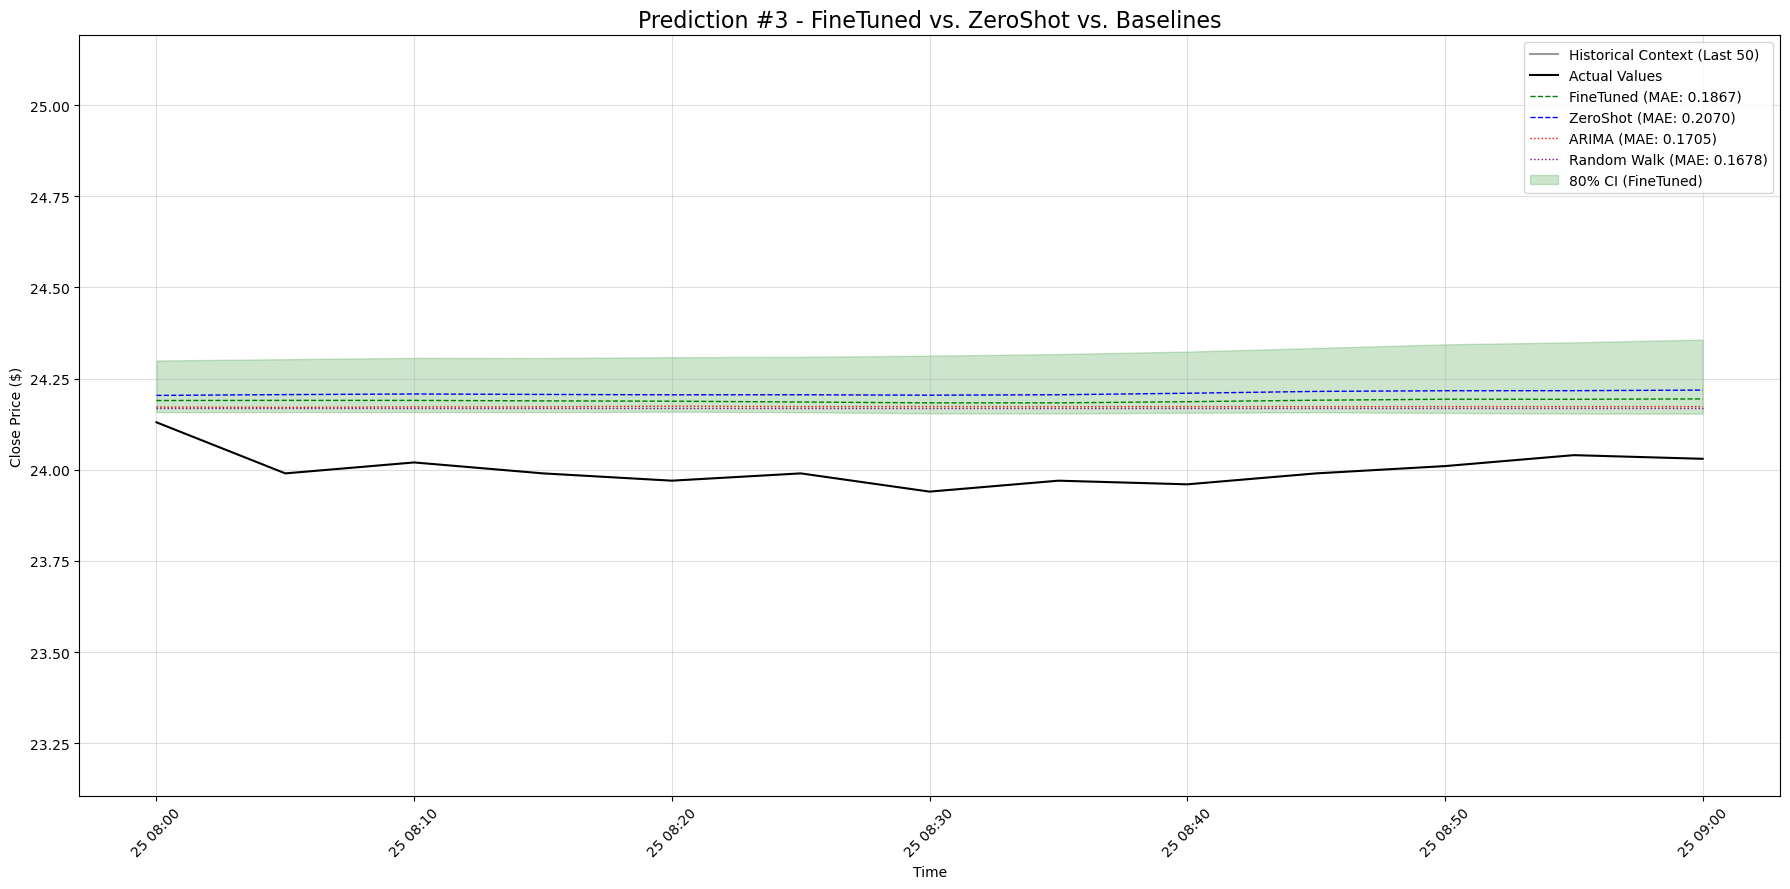

 ✅ FineTuned - MAE: 0.1867, RMSE: 0.1918
 ✅ ZeroShot  - MAE: 0.2070, RMSE: 0.2119
 ✅ ARIMA     - MAE: 0.1705, RMSE: 0.1766
 ✅ Random W. - MAE: 0.1678, RMSE: 0.1739
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_3_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_3_data.csv

🔍 Making prediction #4 for window ending at 654
   🎯 AutoGluon native plot for prediction #4...
   🎯 AutoGluon native plot for prediction #4...


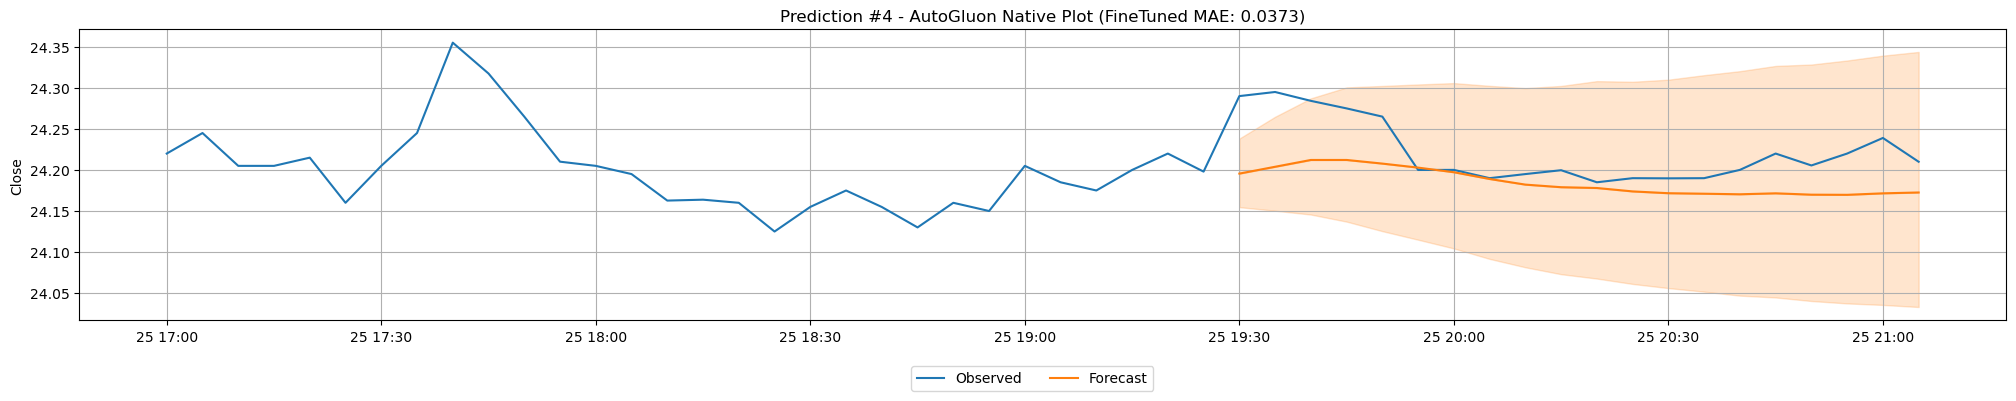

   📊 Custom comparison plot for prediction #4...


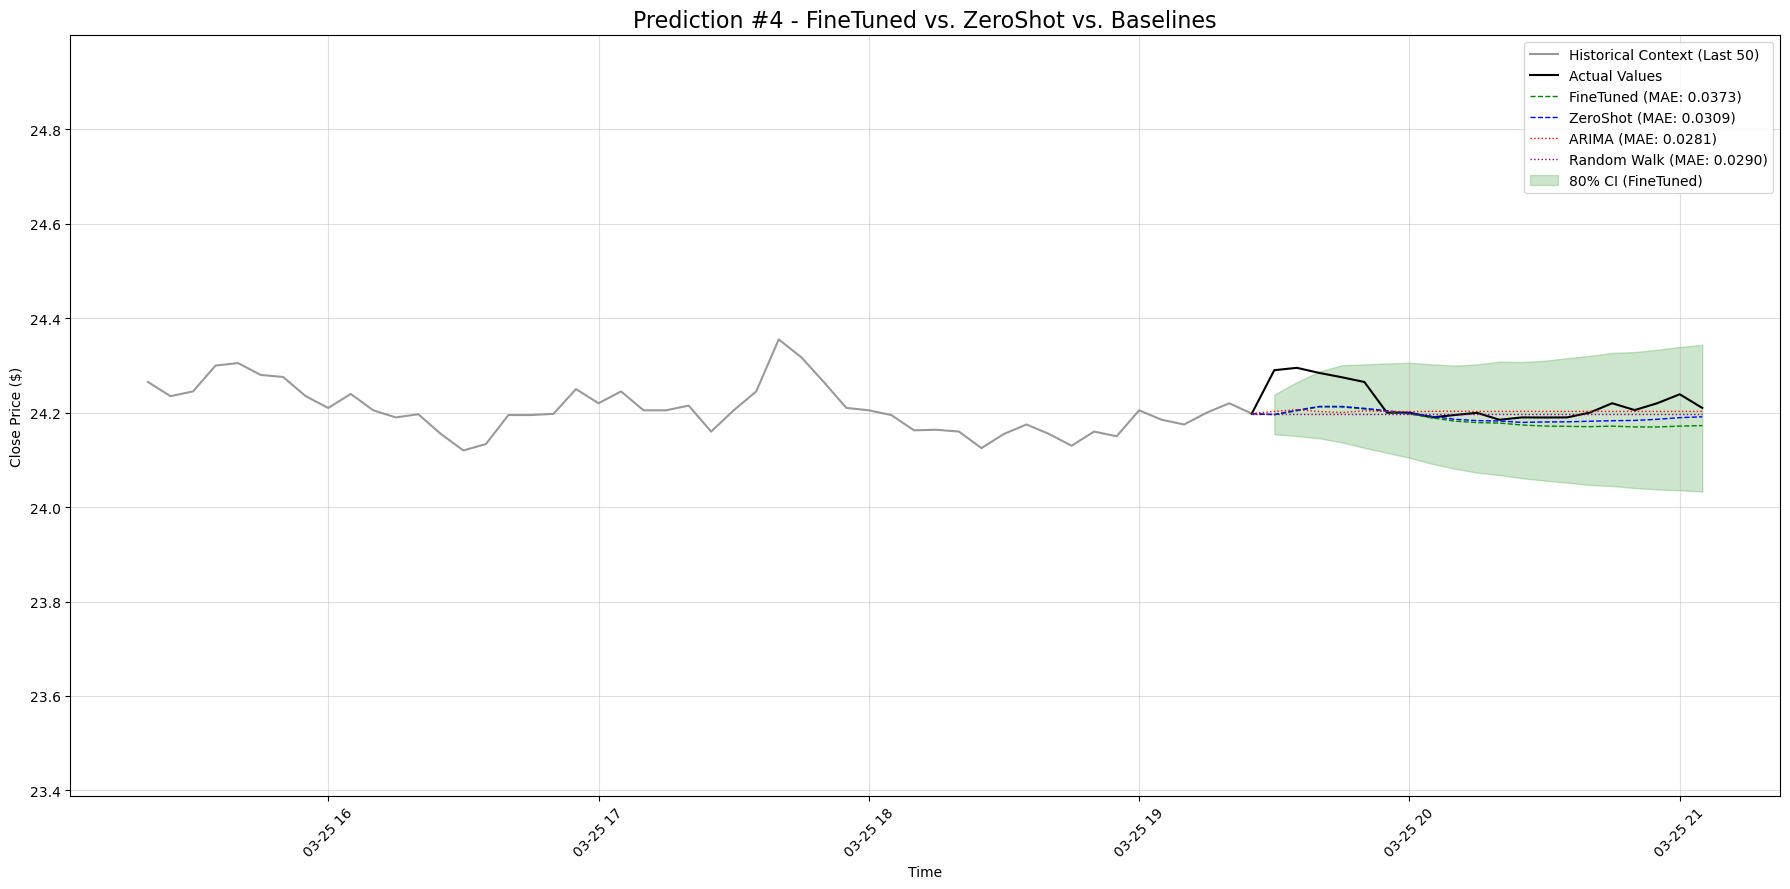

 ✅ FineTuned - MAE: 0.0373, RMSE: 0.0470
 ✅ ZeroShot  - MAE: 0.0309, RMSE: 0.0422
 ✅ ARIMA     - MAE: 0.0281, RMSE: 0.0415
 ✅ Random W. - MAE: 0.0290, RMSE: 0.0442
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_4_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_4_data.csv

🔍 Making prediction #5 for window ending at 798
   🎯 AutoGluon native plot for prediction #5...
   🎯 AutoGluon native plot for prediction #5...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


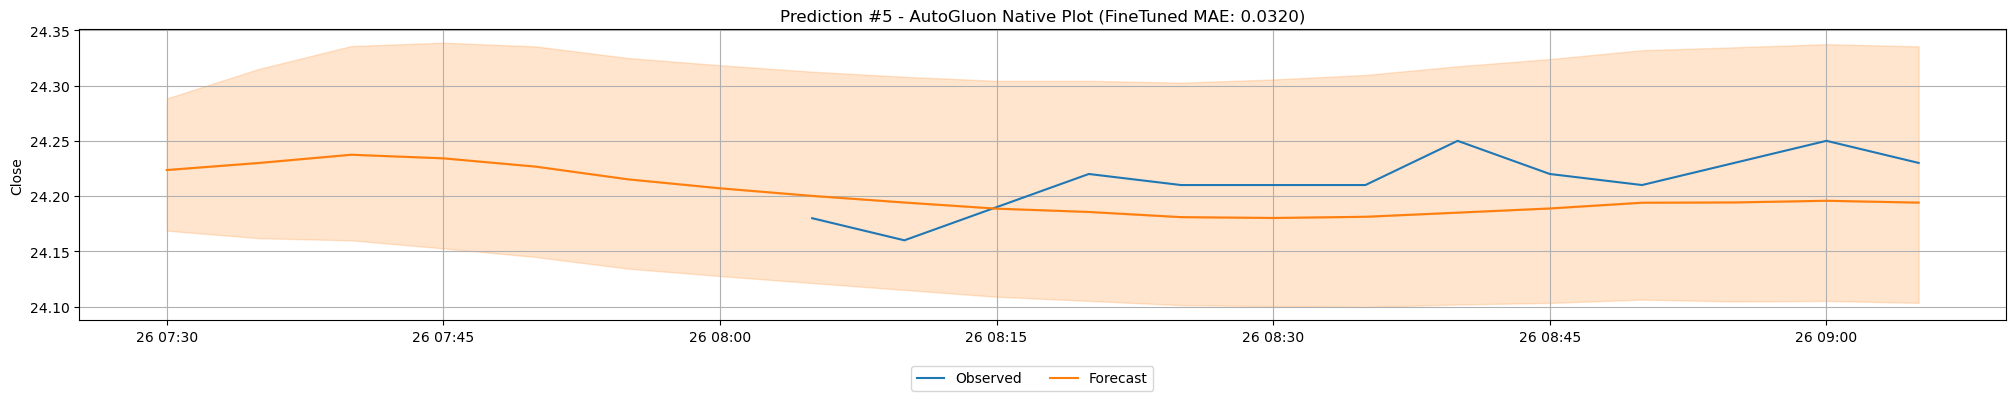

   📊 Custom comparison plot for prediction #5...


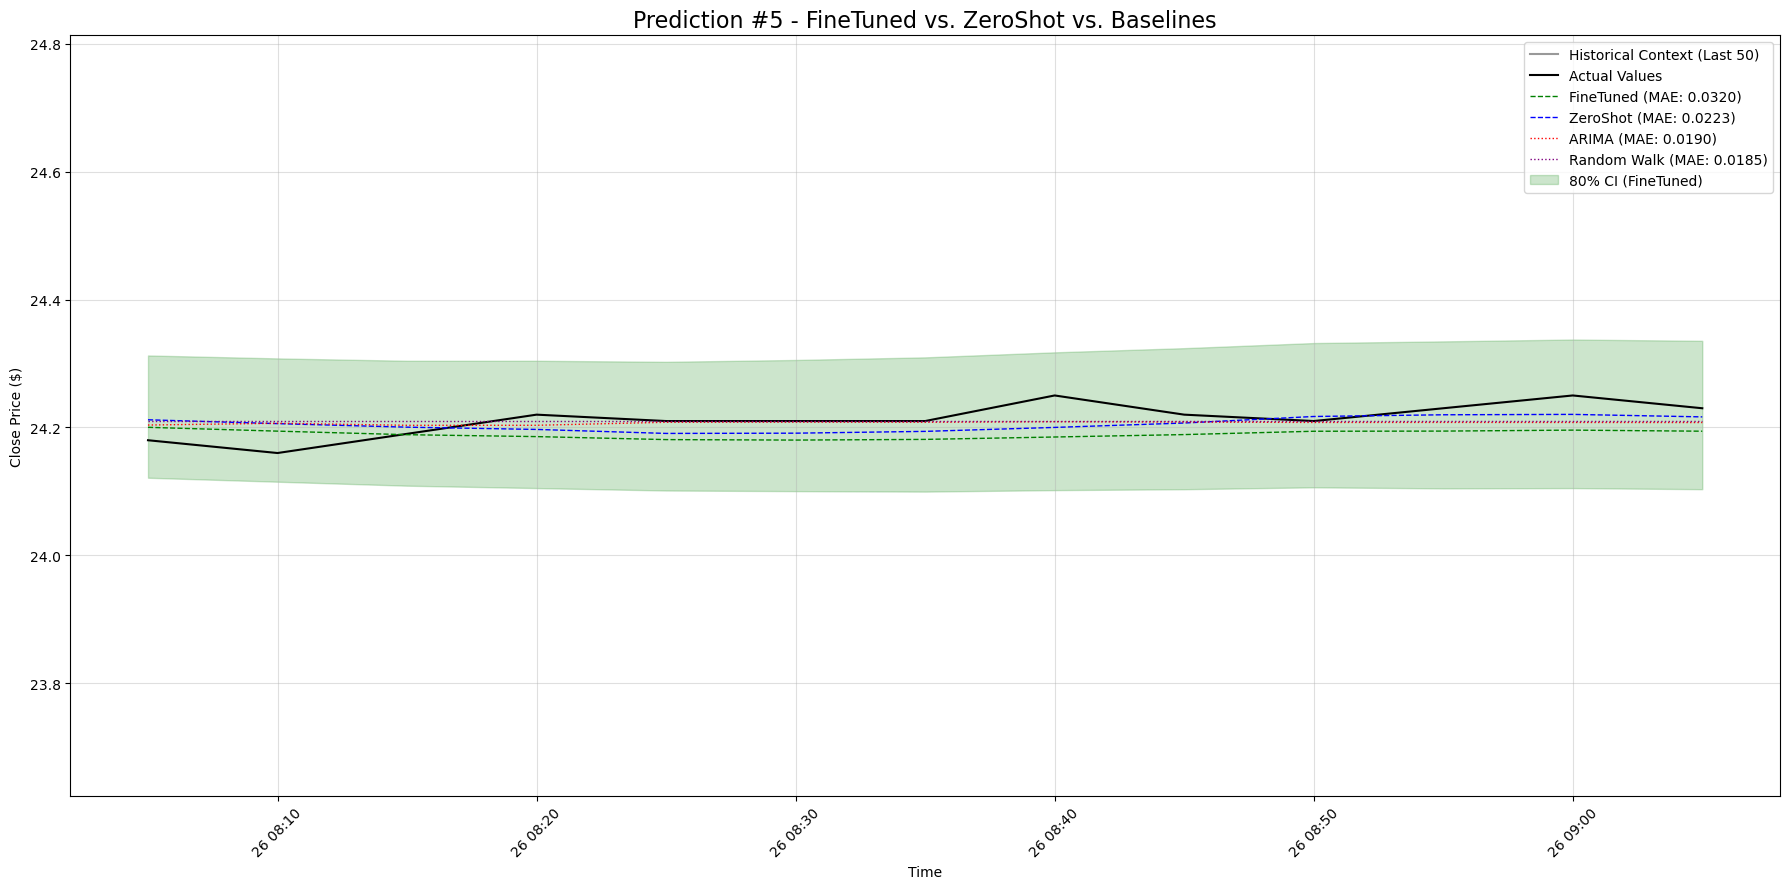

 ✅ FineTuned - MAE: 0.0320, RMSE: 0.0354
 ✅ ZeroShot  - MAE: 0.0223, RMSE: 0.0258
 ✅ ARIMA     - MAE: 0.0190, RMSE: 0.0245
 ✅ Random W. - MAE: 0.0185, RMSE: 0.0248
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_5_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_5_data.csv

🔍 Making prediction #6 for window ending at 943
   🎯 AutoGluon native plot for prediction #6...
   🎯 AutoGluon native plot for prediction #6...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


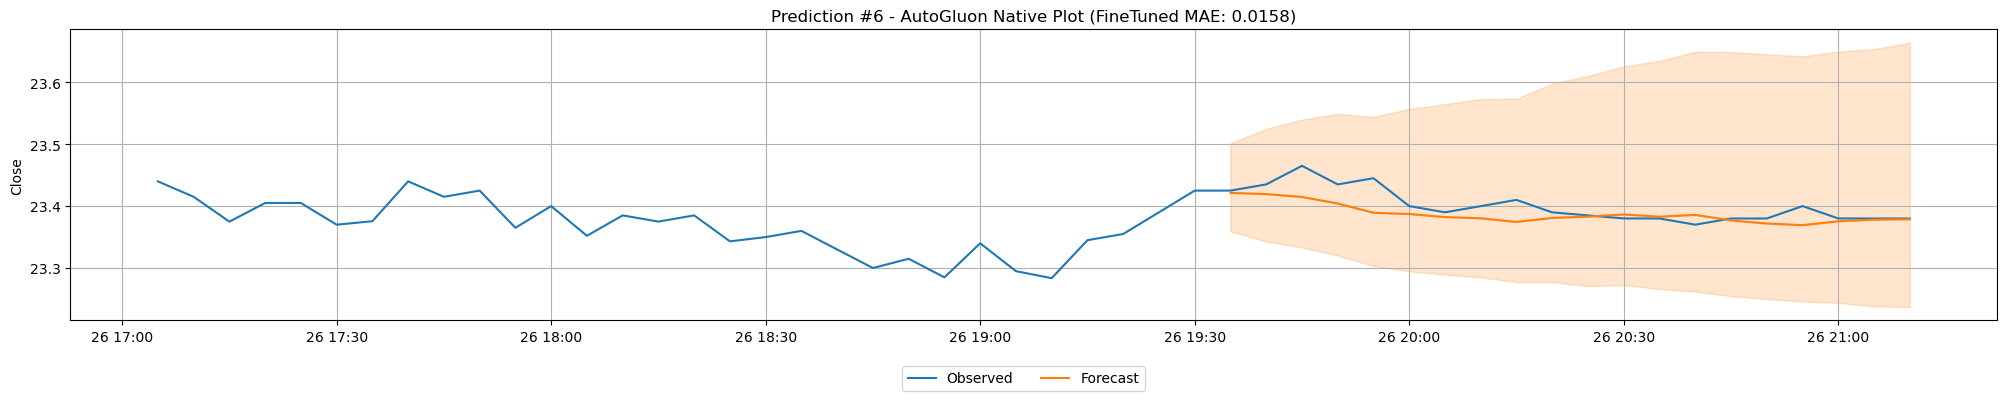

   📊 Custom comparison plot for prediction #6...


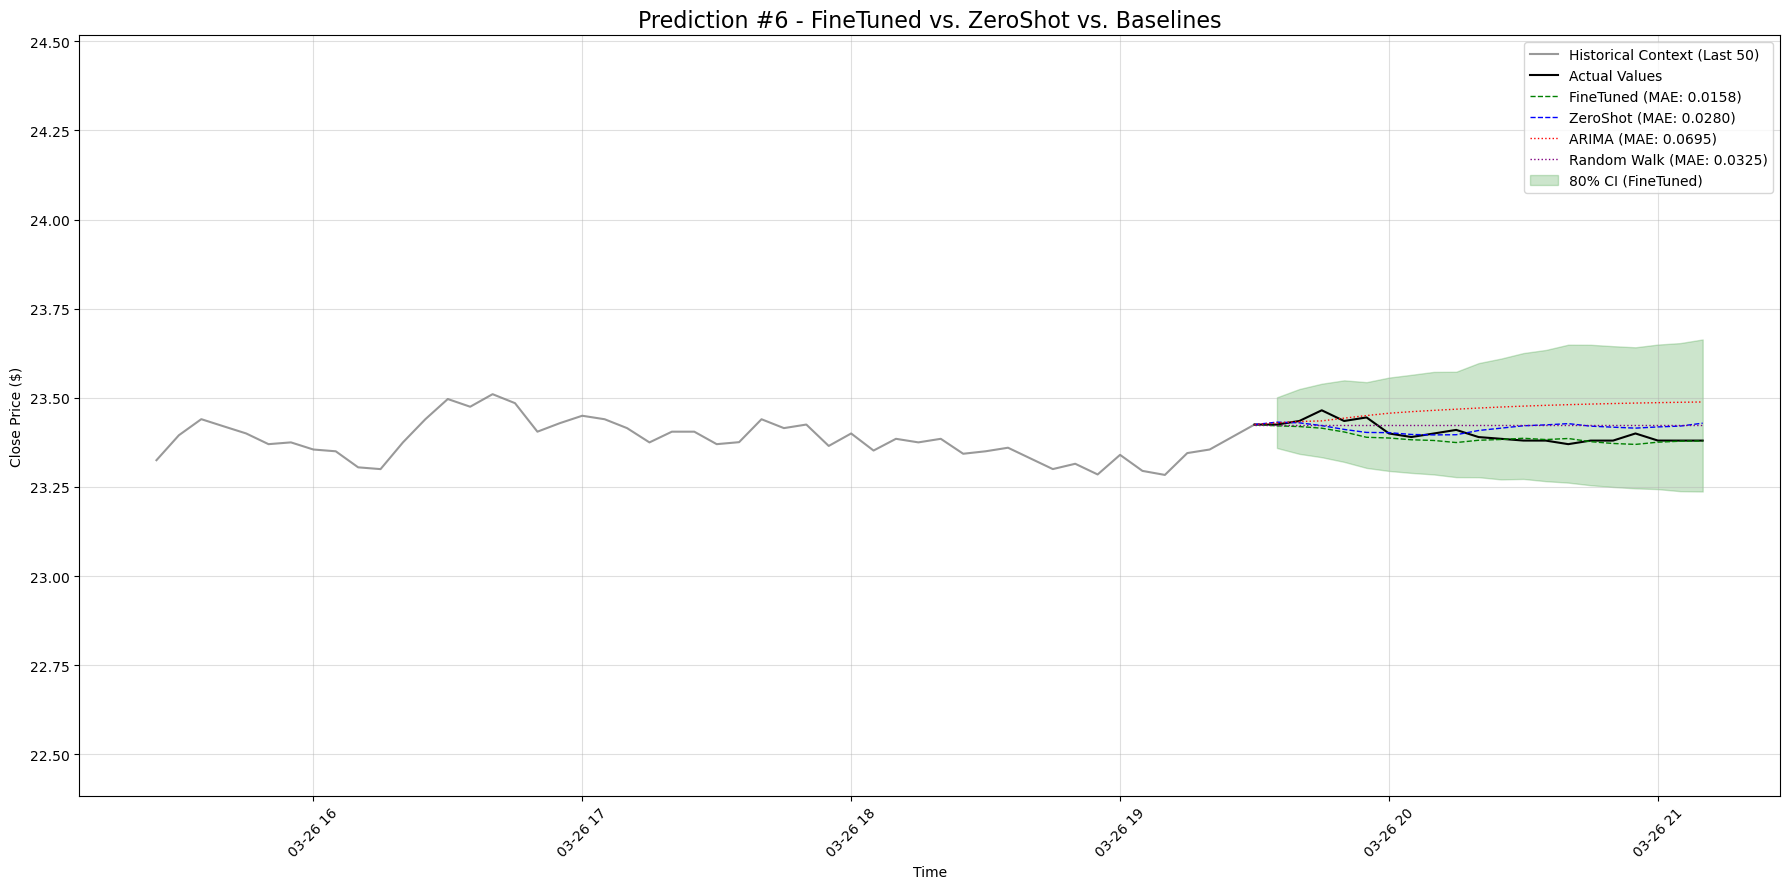

 ✅ FineTuned - MAE: 0.0158, RMSE: 0.0225
 ✅ ZeroShot  - MAE: 0.0280, RMSE: 0.0328
 ✅ ARIMA     - MAE: 0.0695, RMSE: 0.0794
 ✅ Random W. - MAE: 0.0325, RMSE: 0.0357
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_6_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_6_data.csv

🔍 Making prediction #7 for window ending at 1088
   🎯 AutoGluon native plot for prediction #7...
   🎯 AutoGluon native plot for prediction #7...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


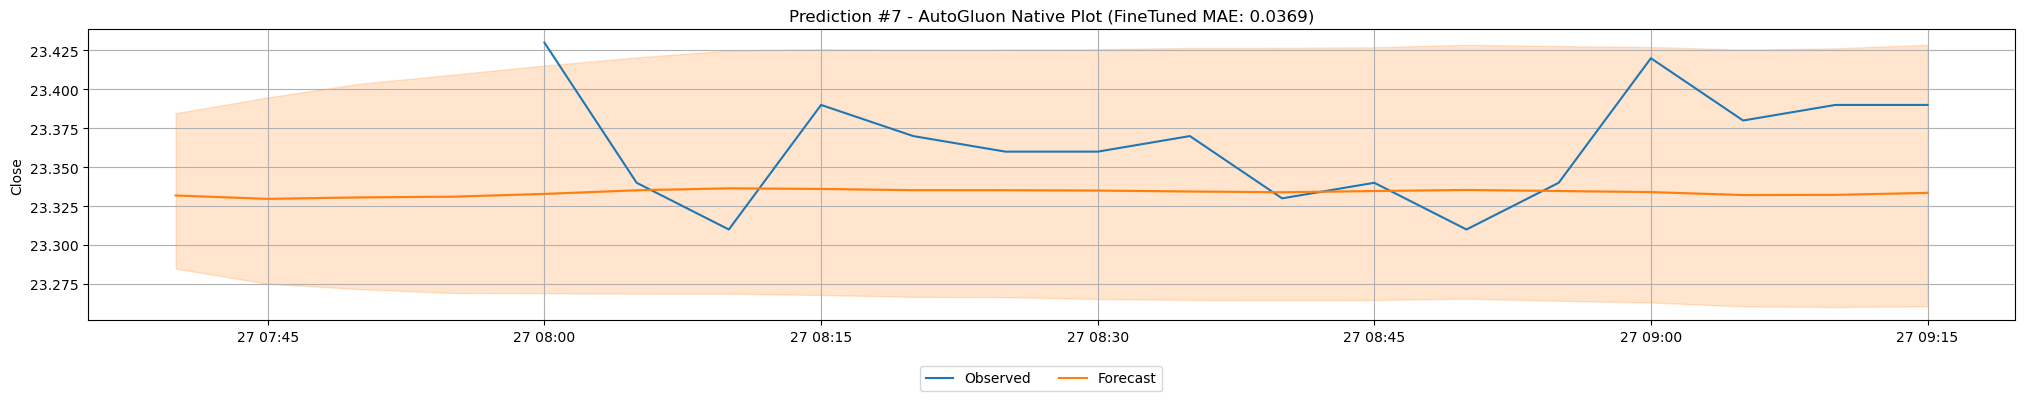

   📊 Custom comparison plot for prediction #7...


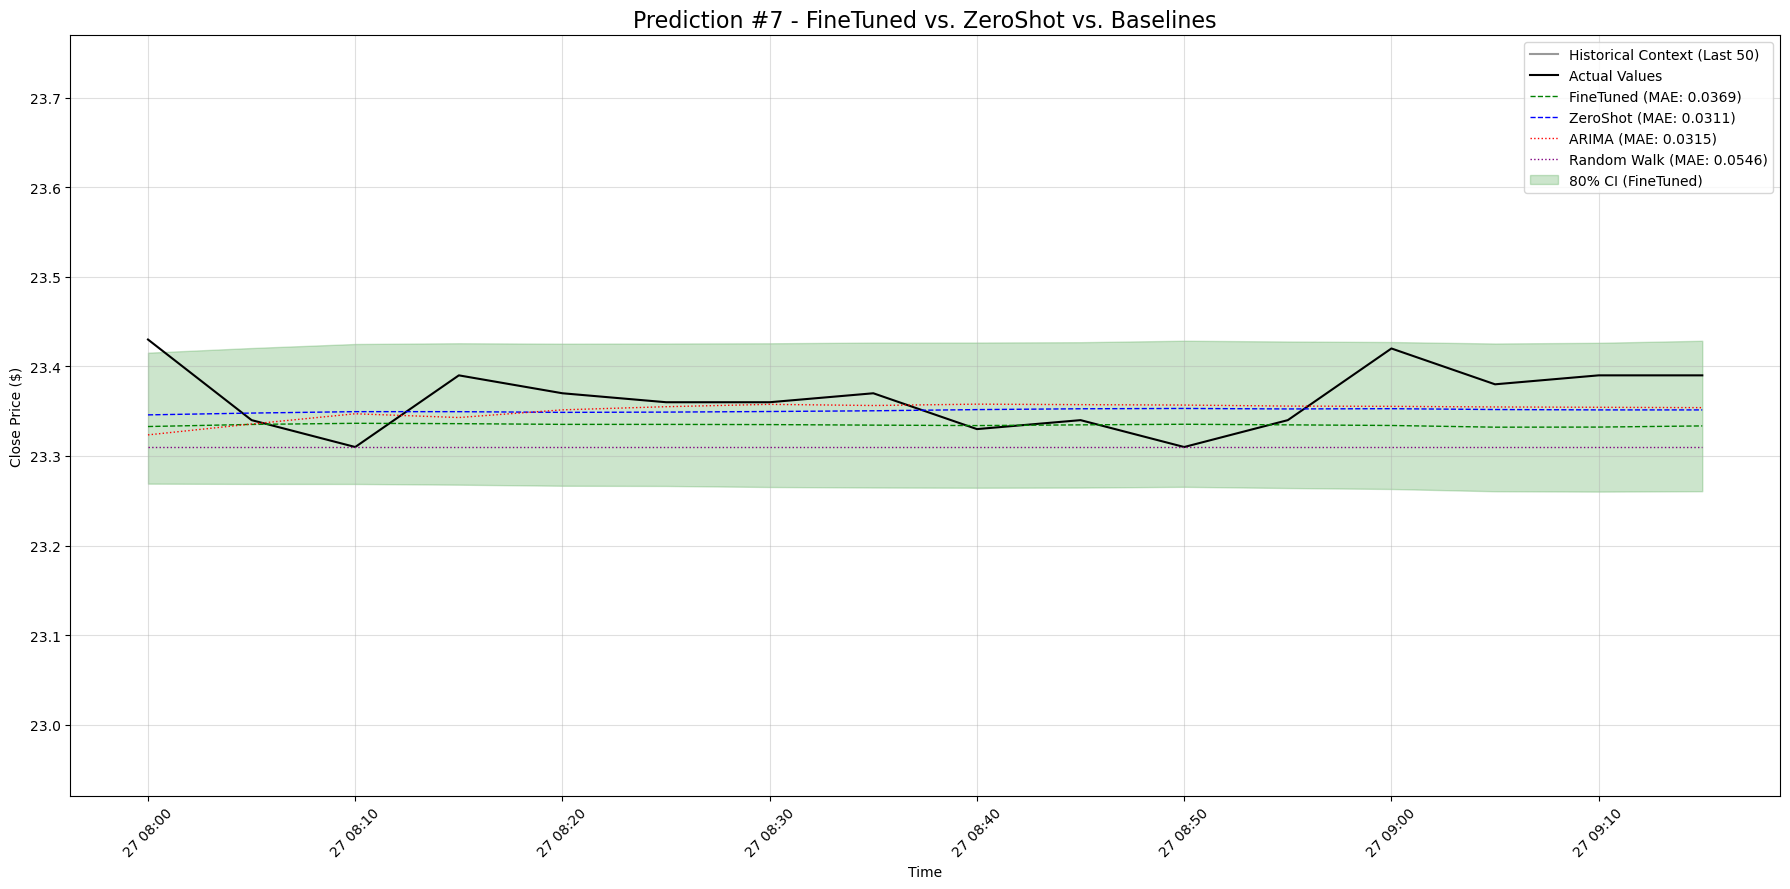

 ✅ FineTuned - MAE: 0.0369, RMSE: 0.0459
 ✅ ZeroShot  - MAE: 0.0311, RMSE: 0.0374
 ✅ ARIMA     - MAE: 0.0315, RMSE: 0.0406
 ✅ Random W. - MAE: 0.0546, RMSE: 0.0643
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_7_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_7_data.csv

🔍 Making prediction #8 for window ending at 1233
   🎯 AutoGluon native plot for prediction #8...
   🎯 AutoGluon native plot for prediction #8...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


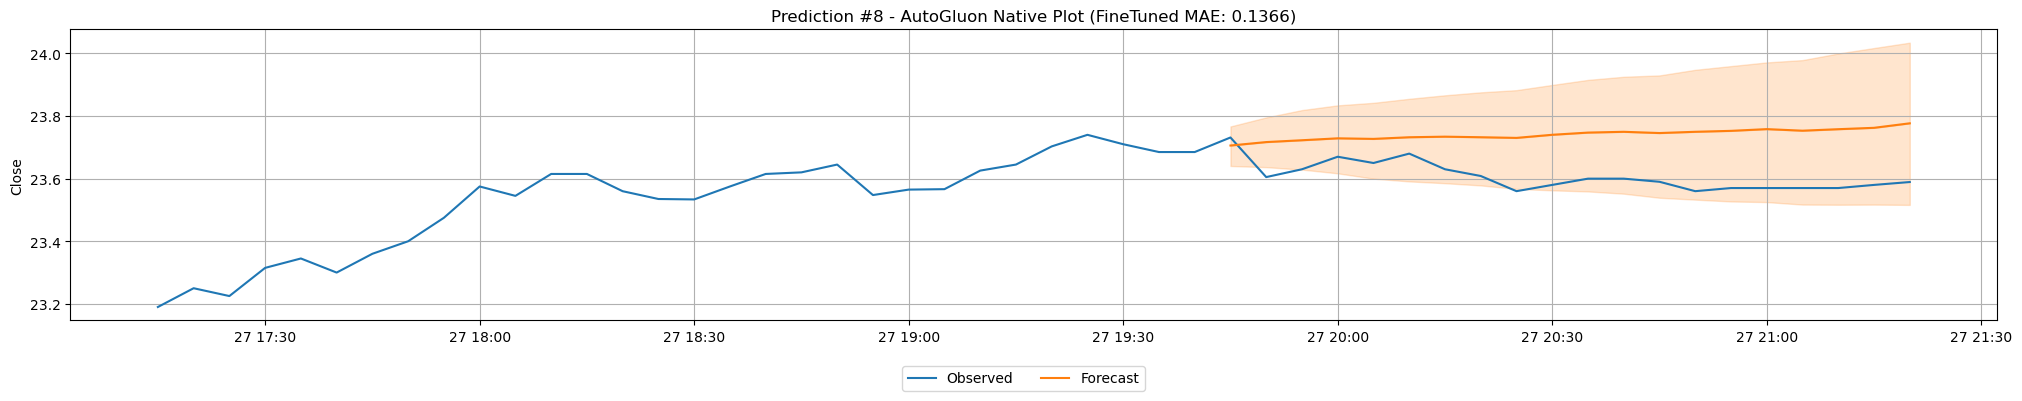

   📊 Custom comparison plot for prediction #8...


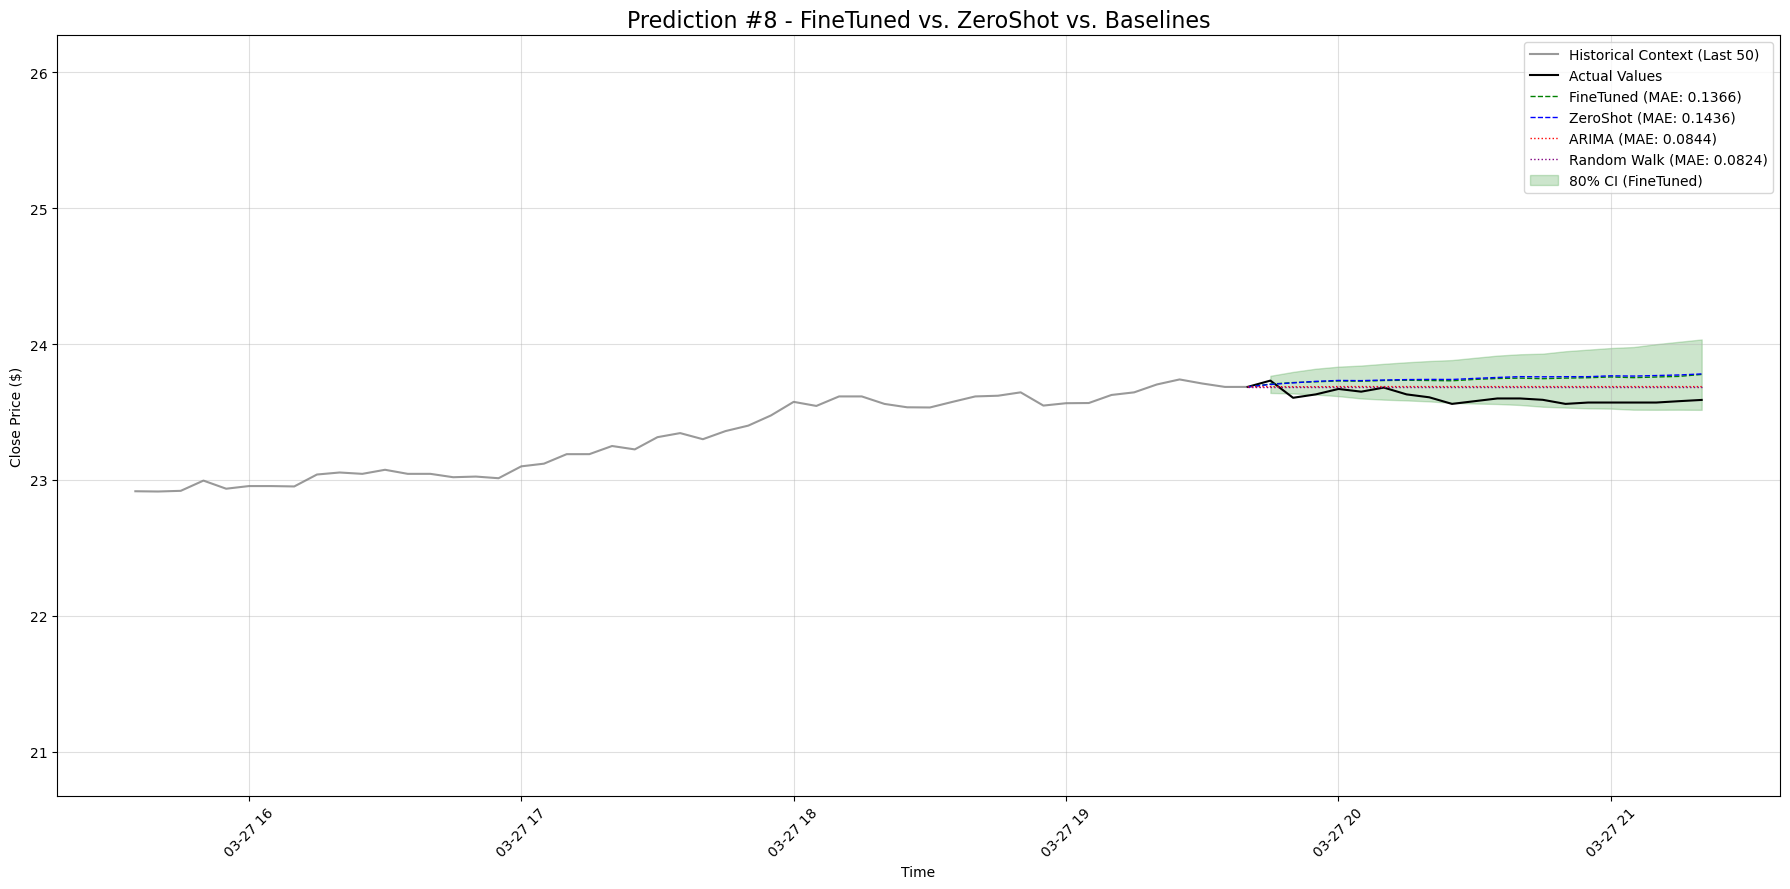

 ✅ FineTuned - MAE: 0.1366, RMSE: 0.1458
 ✅ ZeroShot  - MAE: 0.1436, RMSE: 0.1533
 ✅ ARIMA     - MAE: 0.0844, RMSE: 0.0915
 ✅ Random W. - MAE: 0.0824, RMSE: 0.0897
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_8_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_8_data.csv

🔍 Making prediction #9 for window ending at 1377
   🎯 AutoGluon native plot for prediction #9...
   🎯 AutoGluon native plot for prediction #9...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


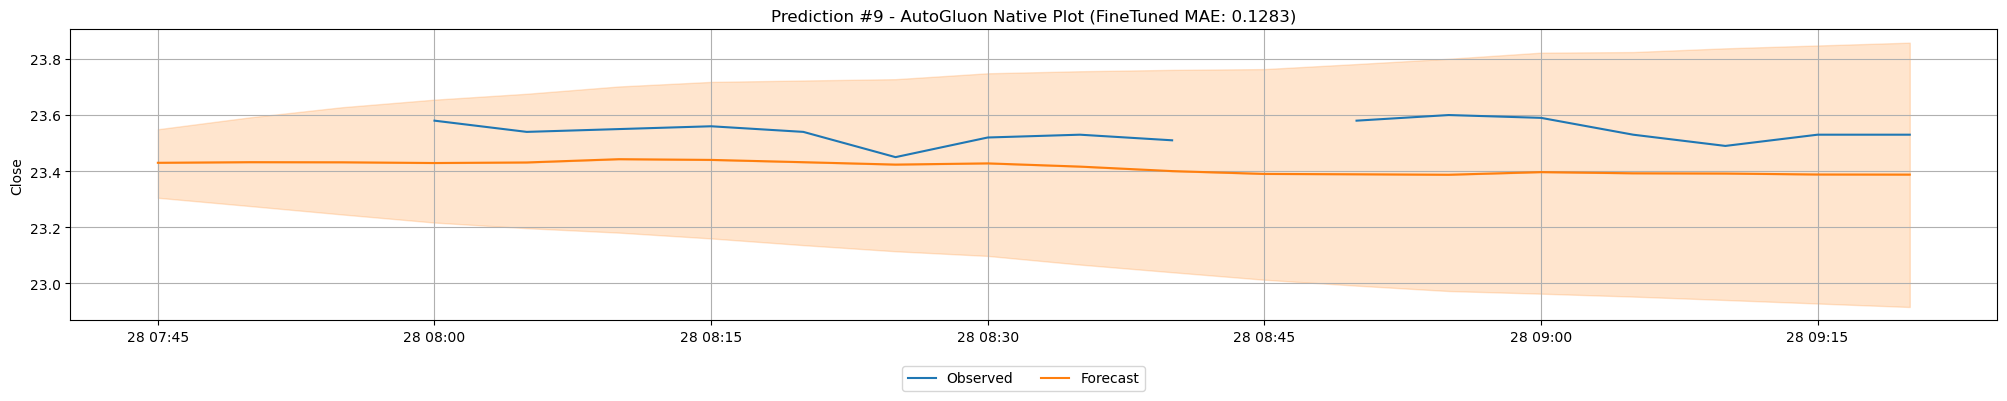

   📊 Custom comparison plot for prediction #9...


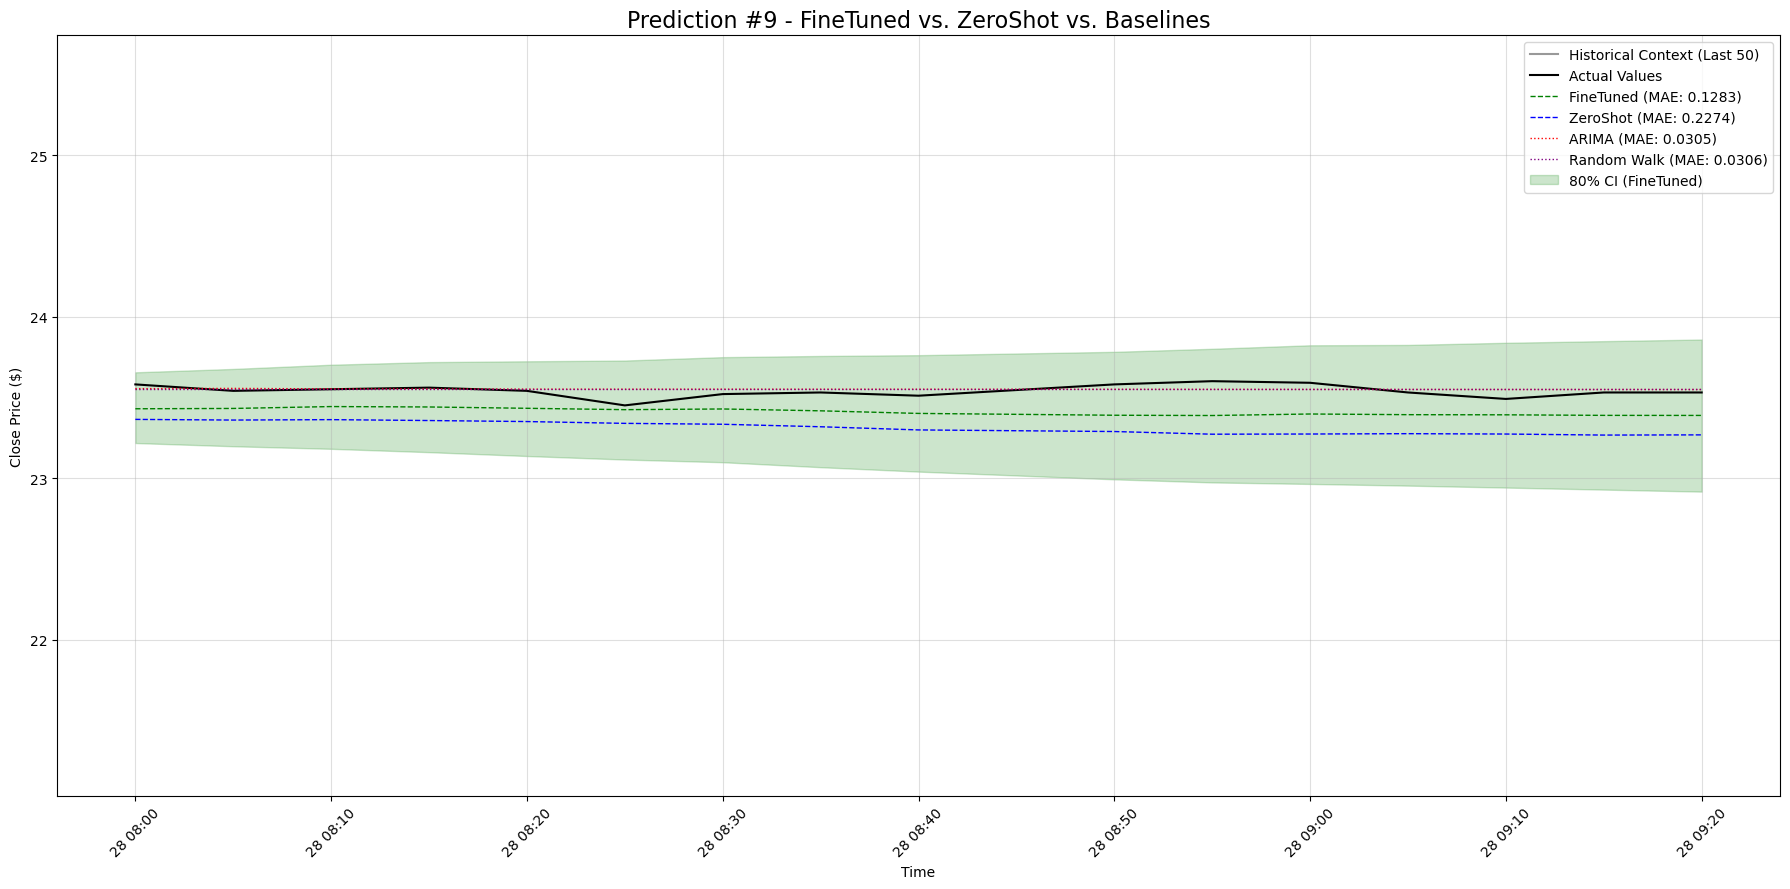

 ✅ FineTuned - MAE: 0.1283, RMSE: 0.1356
 ✅ ZeroShot  - MAE: 0.2274, RMSE: 0.2338
 ✅ ARIMA     - MAE: 0.0305, RMSE: 0.0385
 ✅ Random W. - MAE: 0.0306, RMSE: 0.0386
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_9_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_9_data.csv

🔍 Making prediction #10 for window ending at 1522
   🎯 AutoGluon native plot for prediction #10...
   🎯 AutoGluon native plot for prediction #10...


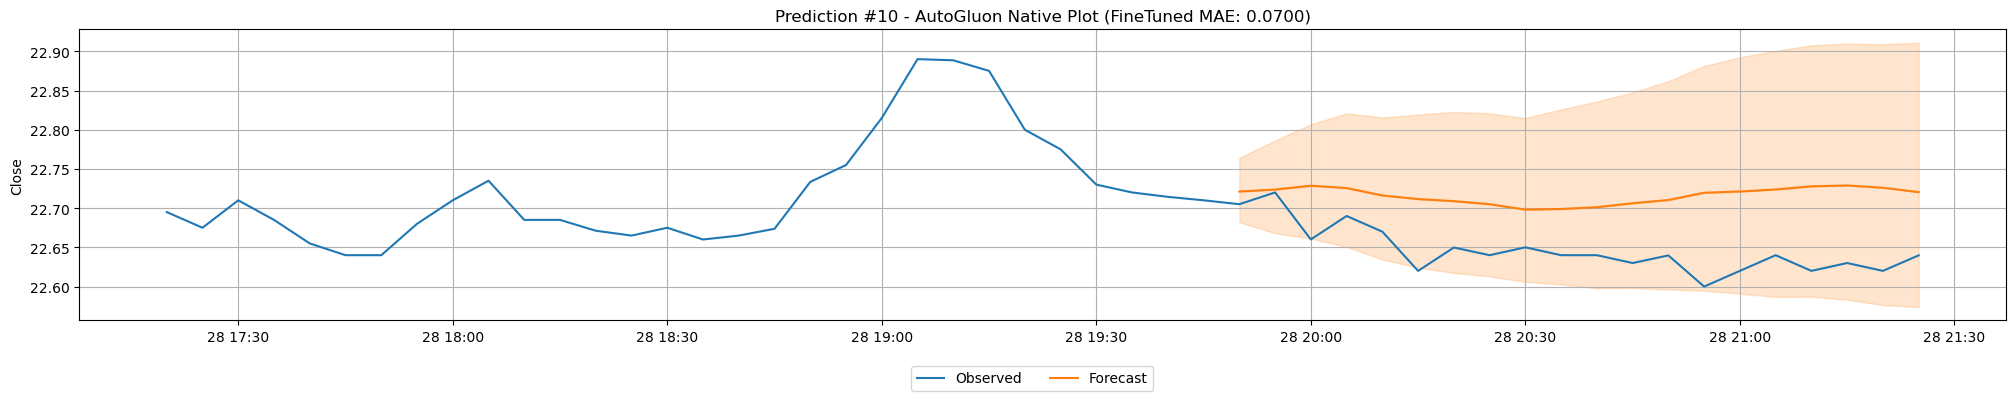

   📊 Custom comparison plot for prediction #10...


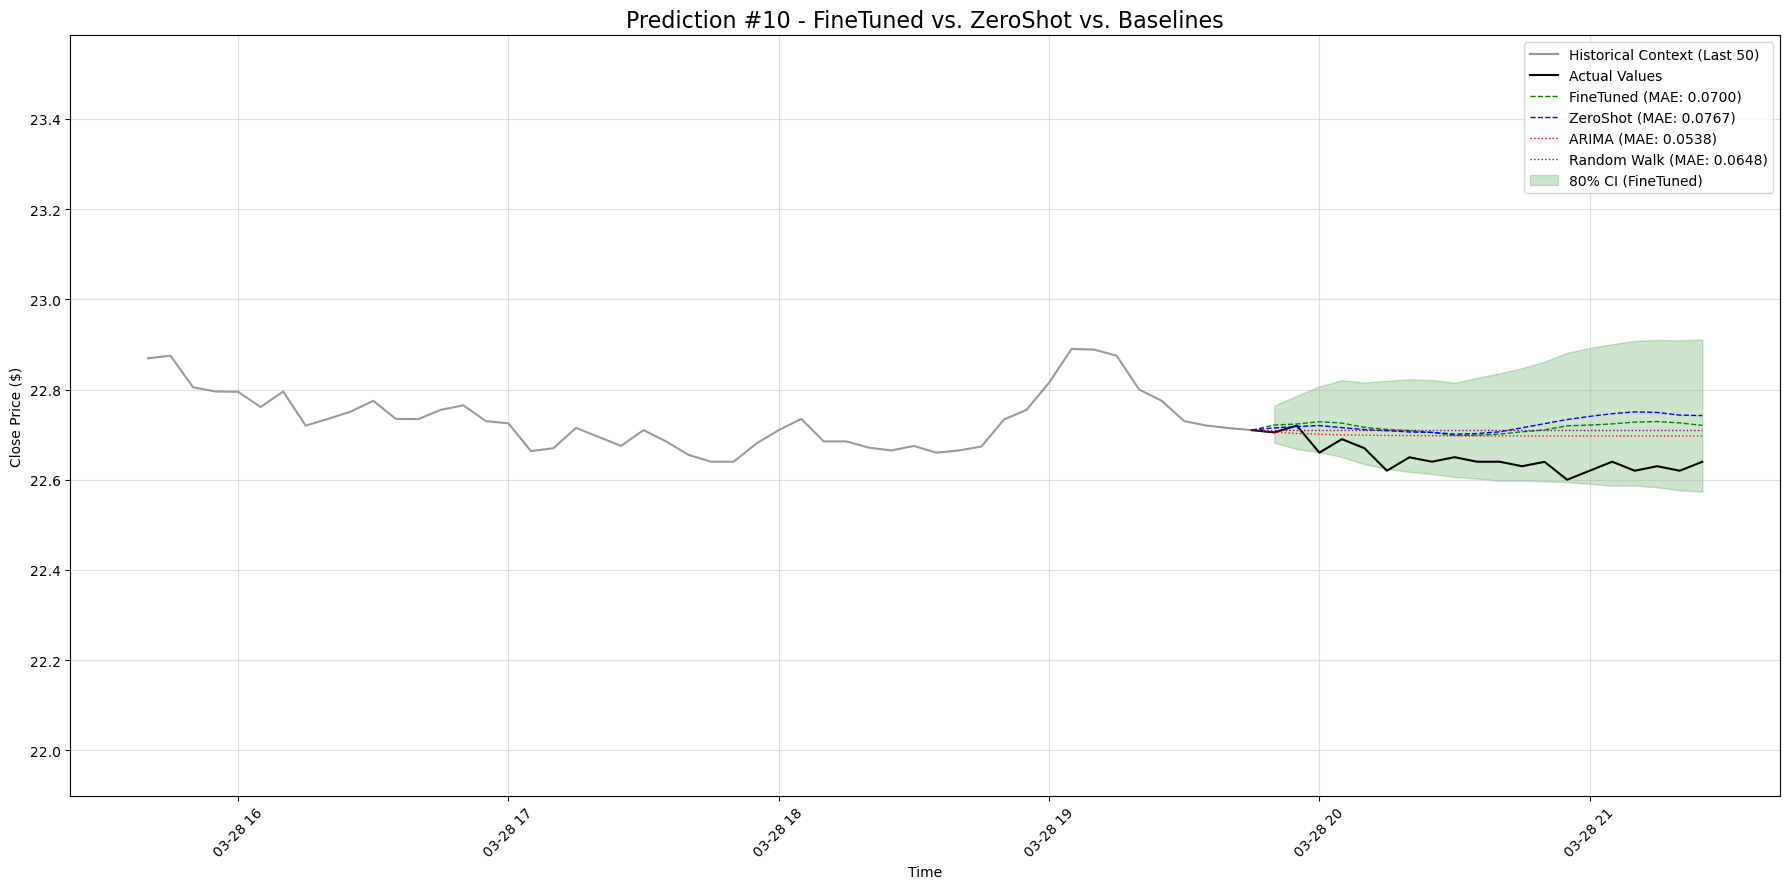

 ✅ FineTuned - MAE: 0.0700, RMSE: 0.0760
 ✅ ZeroShot  - MAE: 0.0767, RMSE: 0.0858
 ✅ ARIMA     - MAE: 0.0538, RMSE: 0.0589
 ✅ Random W. - MAE: 0.0648, RMSE: 0.0702
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_10_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_10_data.csv

🔍 Making prediction #11 for window ending at 1667

🔍 Making prediction #12 for window ending at 1812

🔍 Making prediction #12 for window ending at 1812

🔍 Making prediction #13 for window ending at 1956

🔍 Making prediction #13 for window ending at 1956

🔍 Making prediction #14 for window ending at 2101

🔍 Making prediction #14 for window ending at 2101

🔍 Making prediction #15 for window ending at 2246

🔍 Making prediction #15 for window ending at 2246
   ⚠️ Error generating baselines: too many indices for array: array is 0-dimensional, but 1 were indexed
   🎯 AutoGl

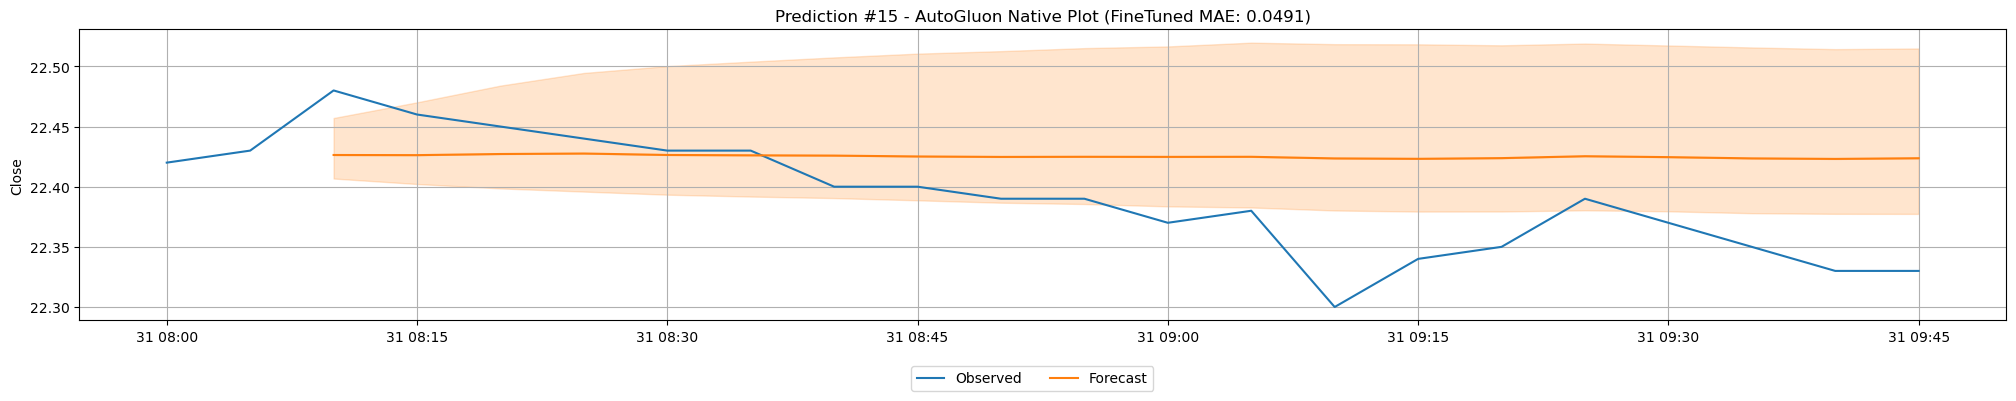

   📊 Custom comparison plot for prediction #15...


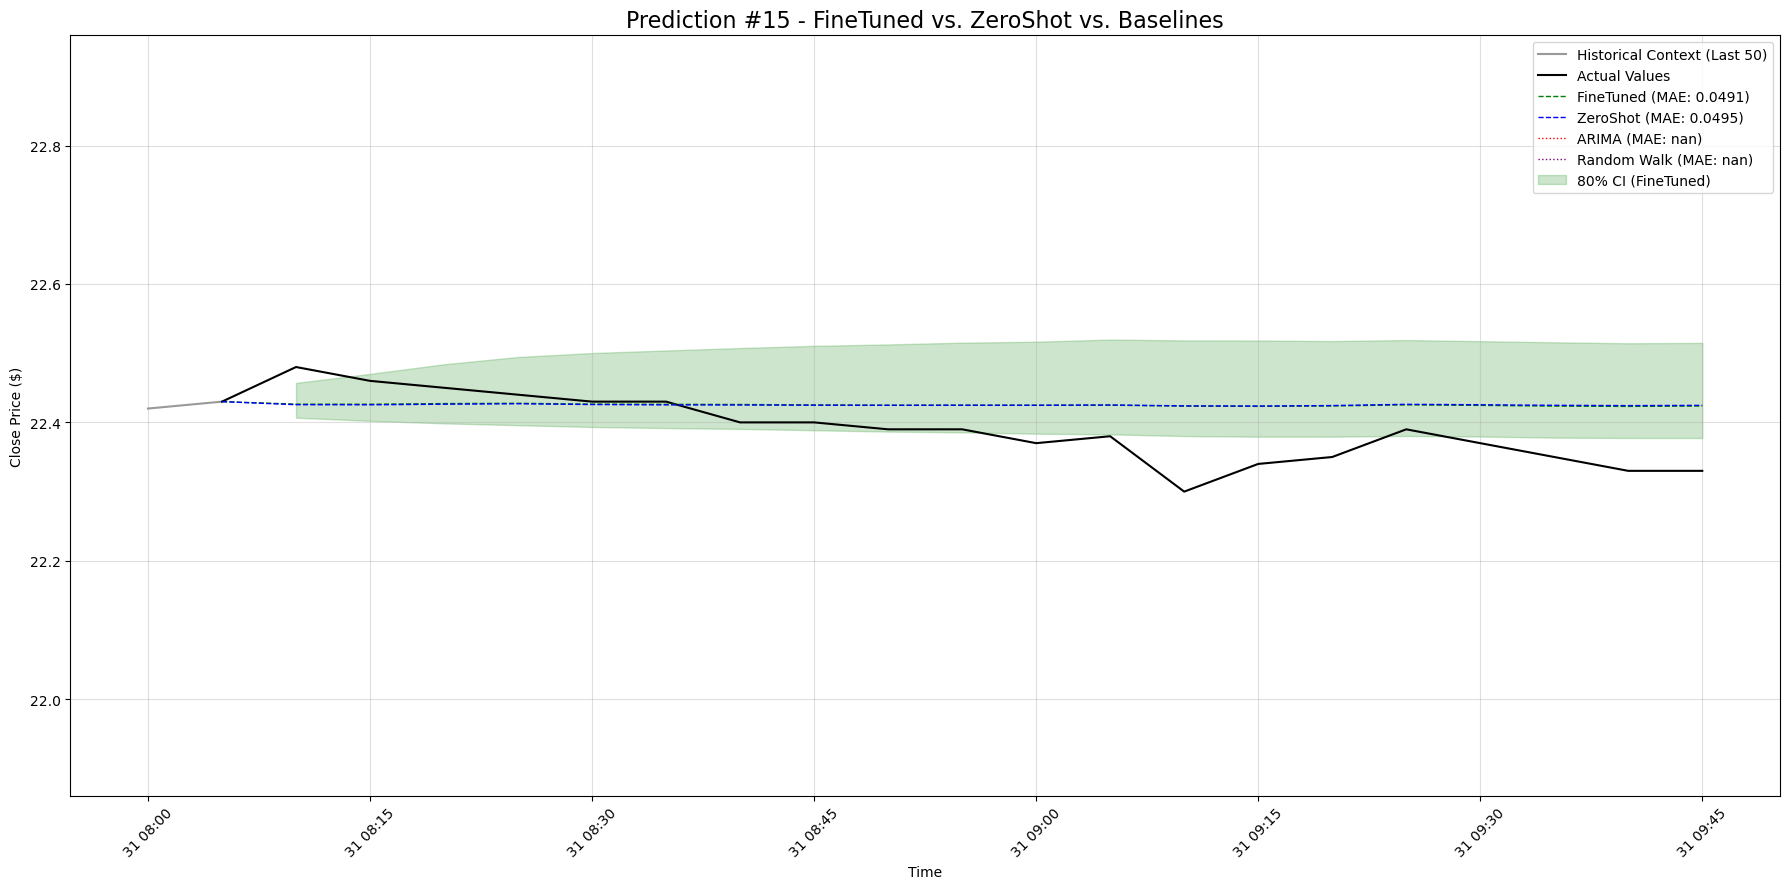

 ✅ FineTuned - MAE: 0.0491, RMSE: 0.0584
 ✅ ZeroShot  - MAE: 0.0495, RMSE: 0.0589
 ✅ ARIMA     - MAE: nan, RMSE: nan
 ✅ Random W. - MAE: nan, RMSE: nan
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_15_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_15_data.csv

🔍 Making prediction #16 for window ending at 2391
   🎯 AutoGluon native plot for prediction #16...
   🎯 AutoGluon native plot for prediction #16...


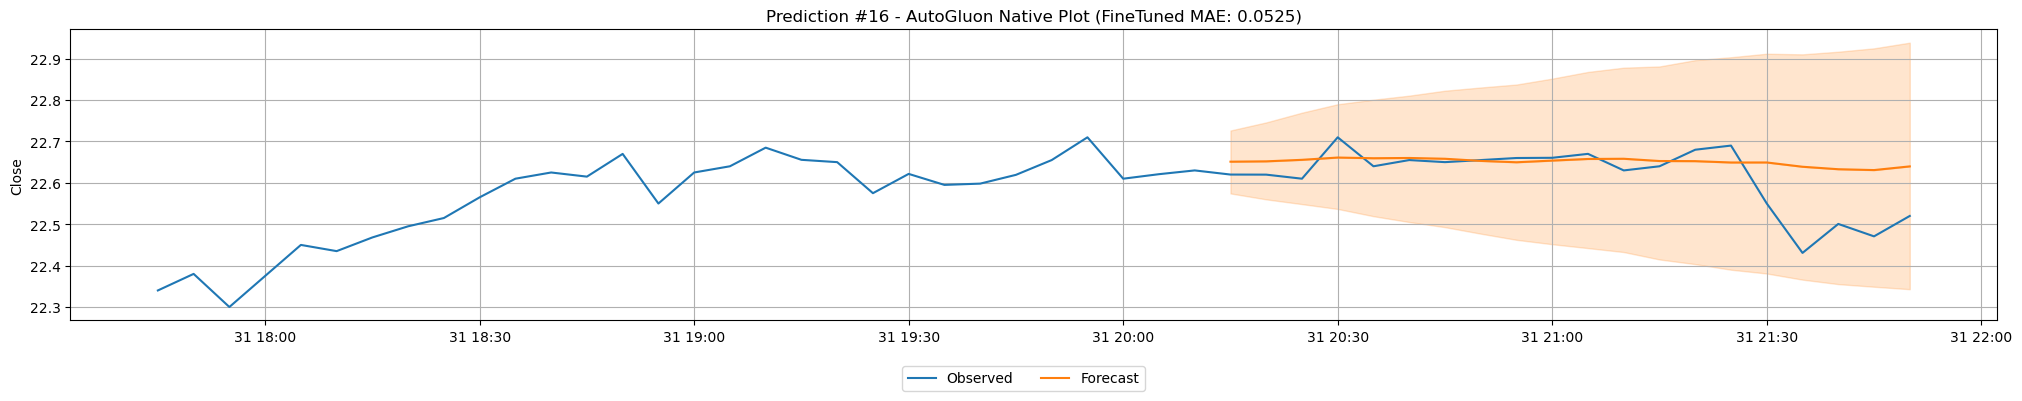

   📊 Custom comparison plot for prediction #16...


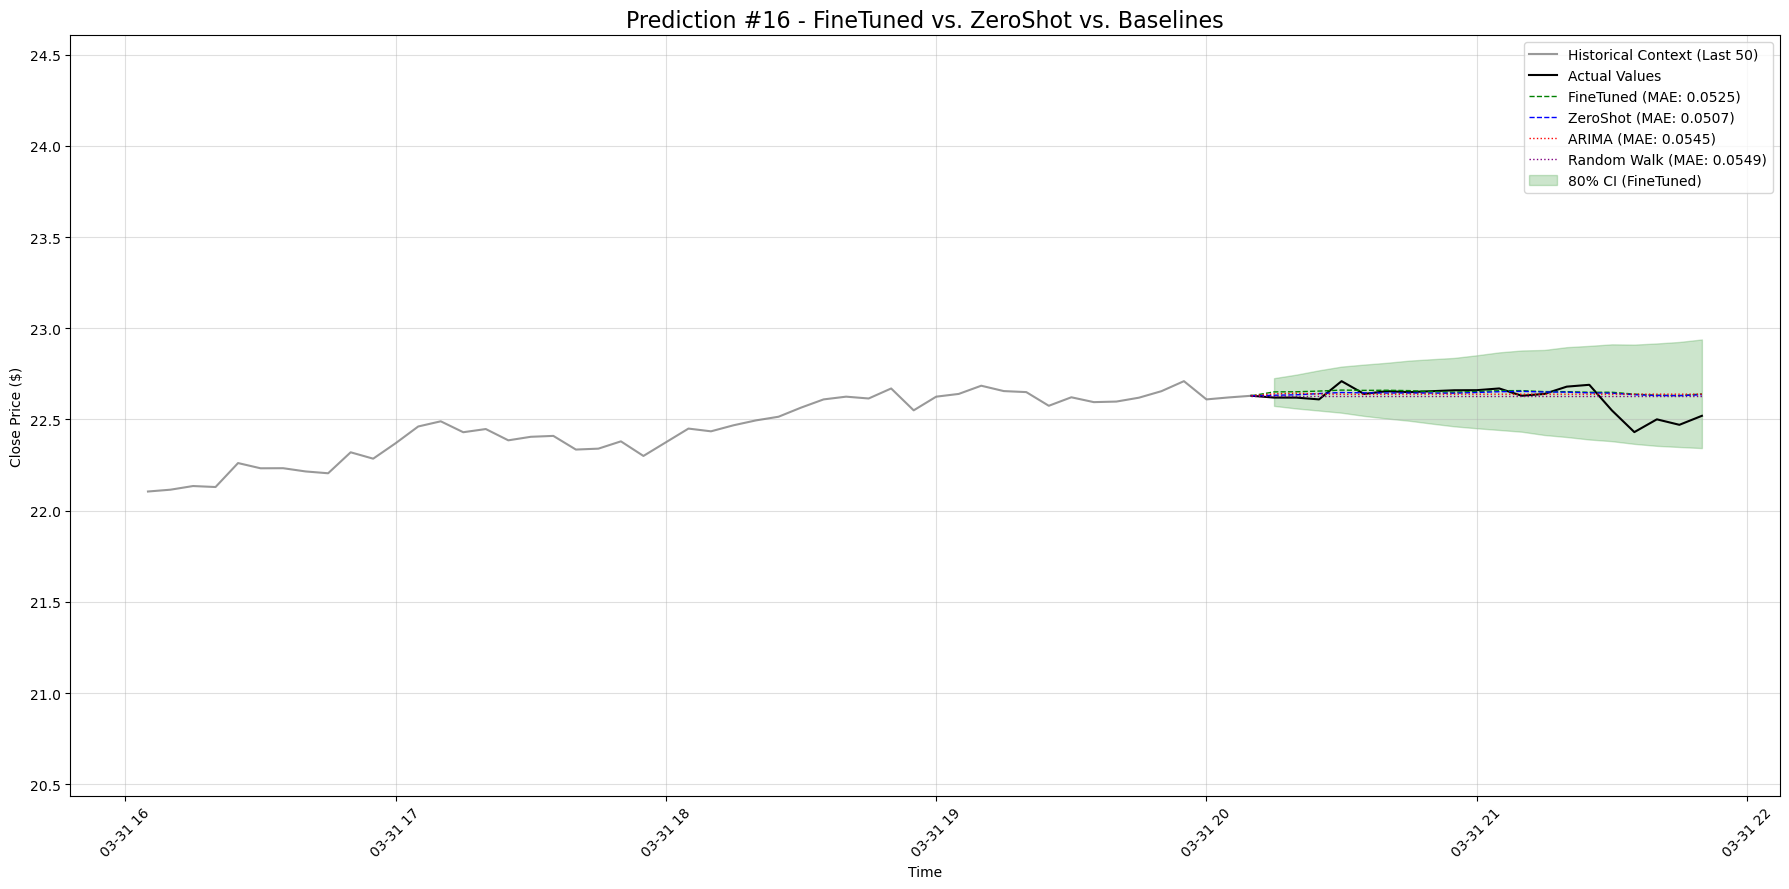

 ✅ FineTuned - MAE: 0.0525, RMSE: 0.0779
 ✅ ZeroShot  - MAE: 0.0507, RMSE: 0.0764
 ✅ ARIMA     - MAE: 0.0545, RMSE: 0.0795
 ✅ Random W. - MAE: 0.0549, RMSE: 0.0770
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_16_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_16_data.csv

🔍 Making prediction #17 for window ending at 2535
   🎯 AutoGluon native plot for prediction #17...
   🎯 AutoGluon native plot for prediction #17...


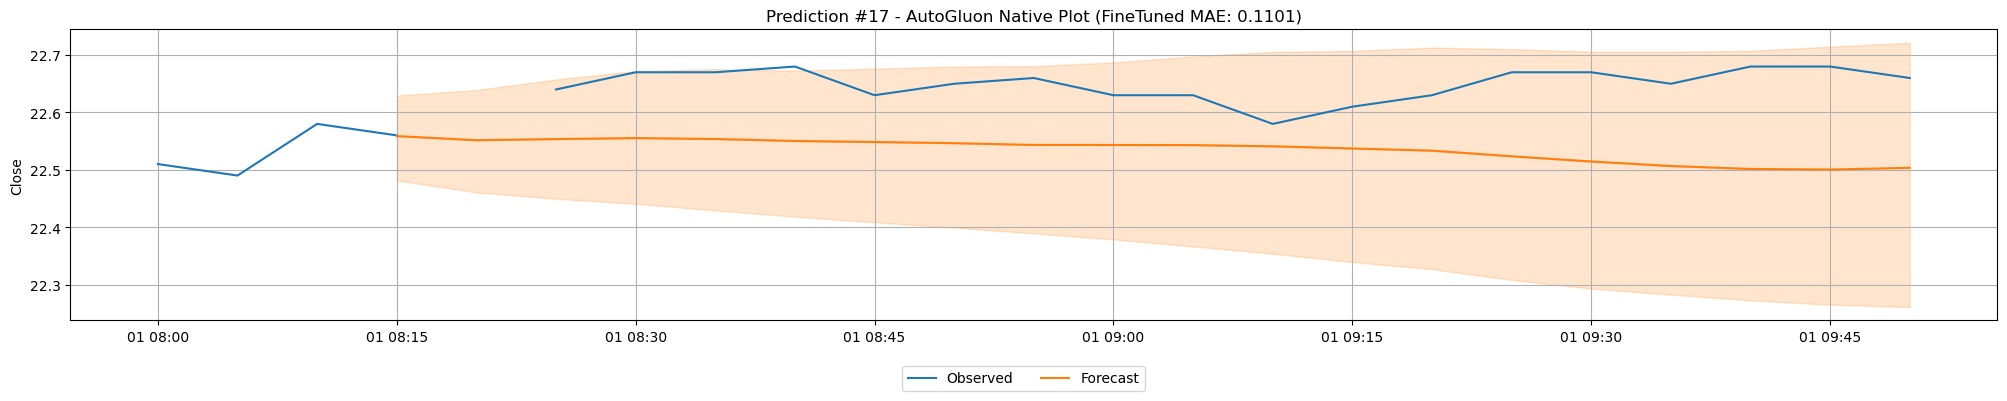

   📊 Custom comparison plot for prediction #17...


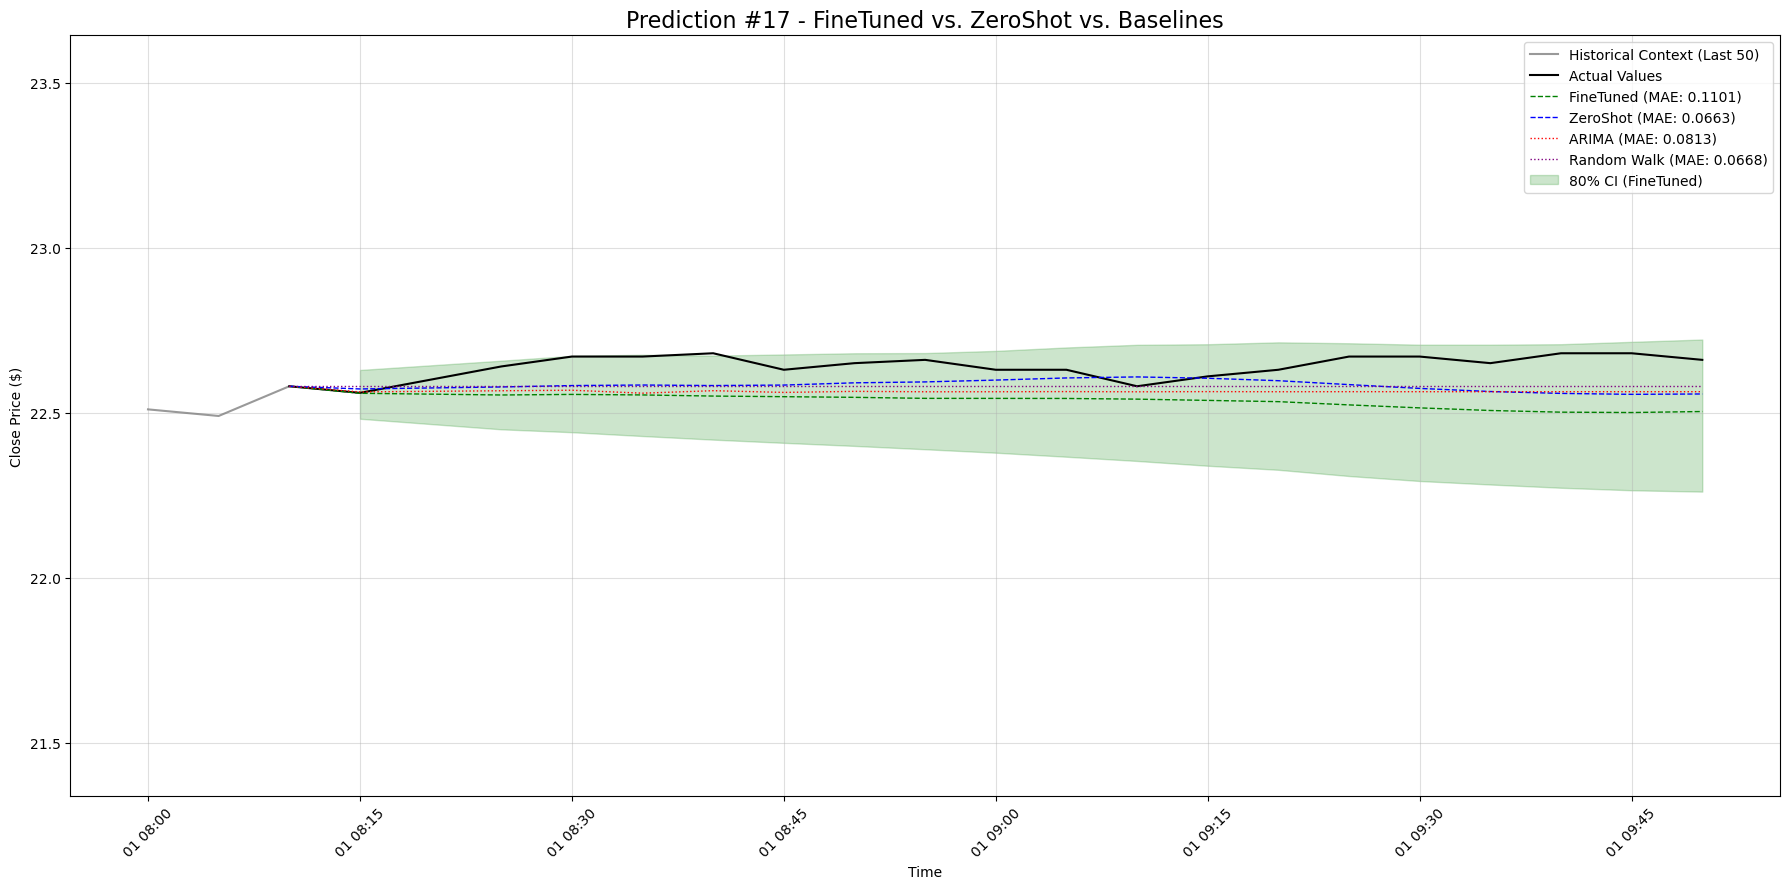

 ✅ FineTuned - MAE: 0.1101, RMSE: 0.1188
 ✅ ZeroShot  - MAE: 0.0663, RMSE: 0.0751
 ✅ ARIMA     - MAE: 0.0813, RMSE: 0.0872
 ✅ Random W. - MAE: 0.0668, RMSE: 0.0725
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_17_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_17_data.csv

🔍 Making prediction #18 for window ending at 2680
   🎯 AutoGluon native plot for prediction #18...
   🎯 AutoGluon native plot for prediction #18...


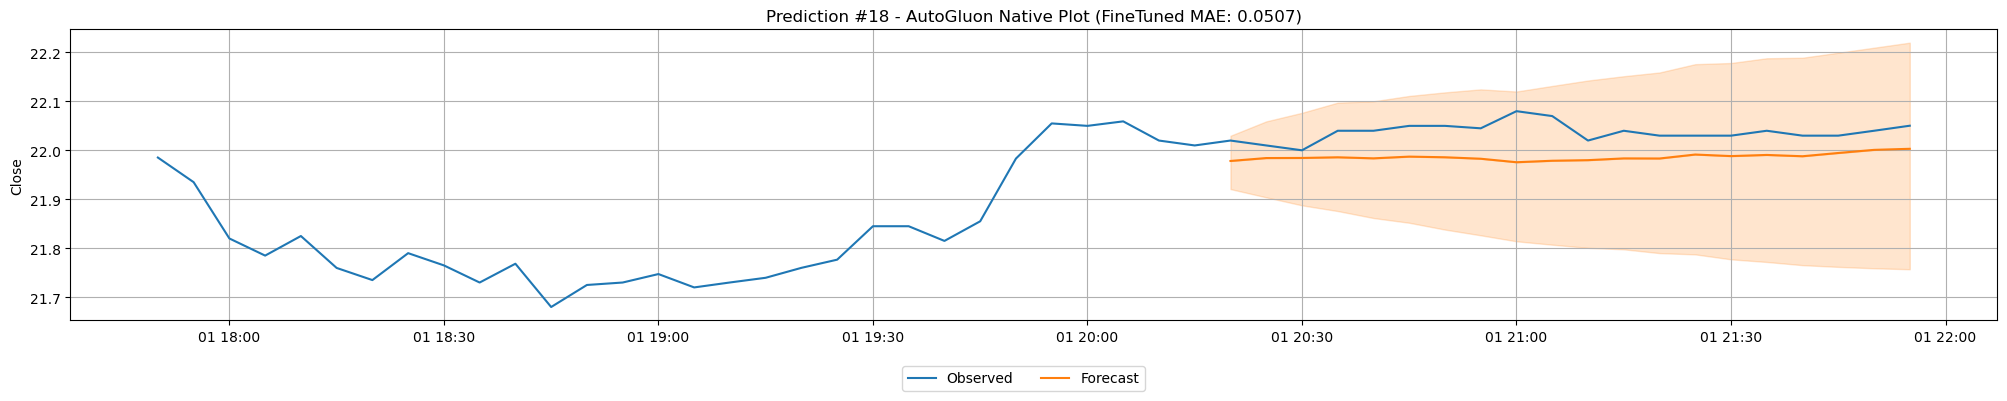

   📊 Custom comparison plot for prediction #18...


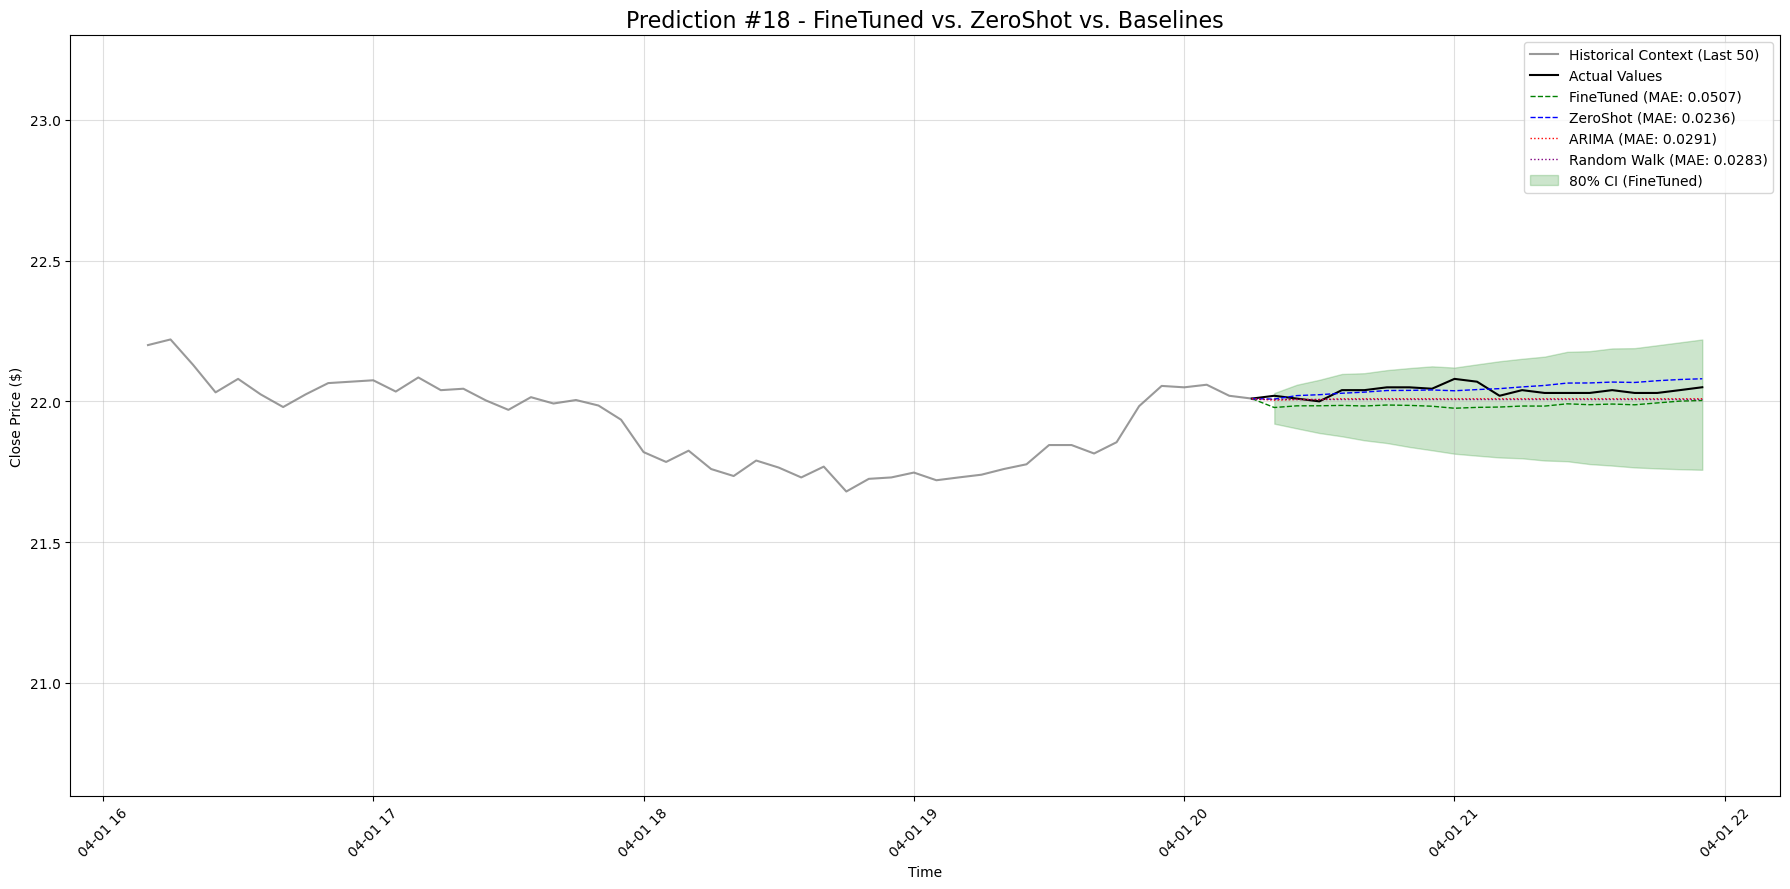

 ✅ FineTuned - MAE: 0.0507, RMSE: 0.0544
 ✅ ZeroShot  - MAE: 0.0236, RMSE: 0.0267
 ✅ ARIMA     - MAE: 0.0291, RMSE: 0.0333
 ✅ Random W. - MAE: 0.0283, RMSE: 0.0327
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_18_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_18_data.csv

🔍 Making prediction #19 for window ending at 2825
   🎯 AutoGluon native plot for prediction #19...
   🎯 AutoGluon native plot for prediction #19...


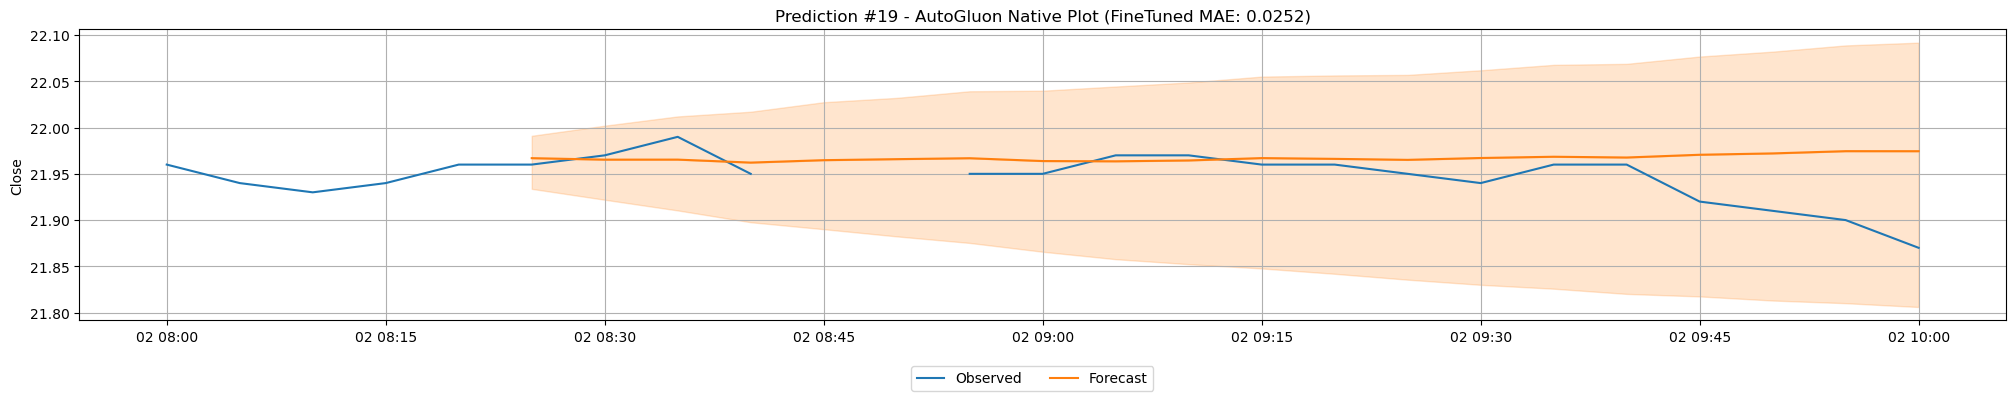

   📊 Custom comparison plot for prediction #19...


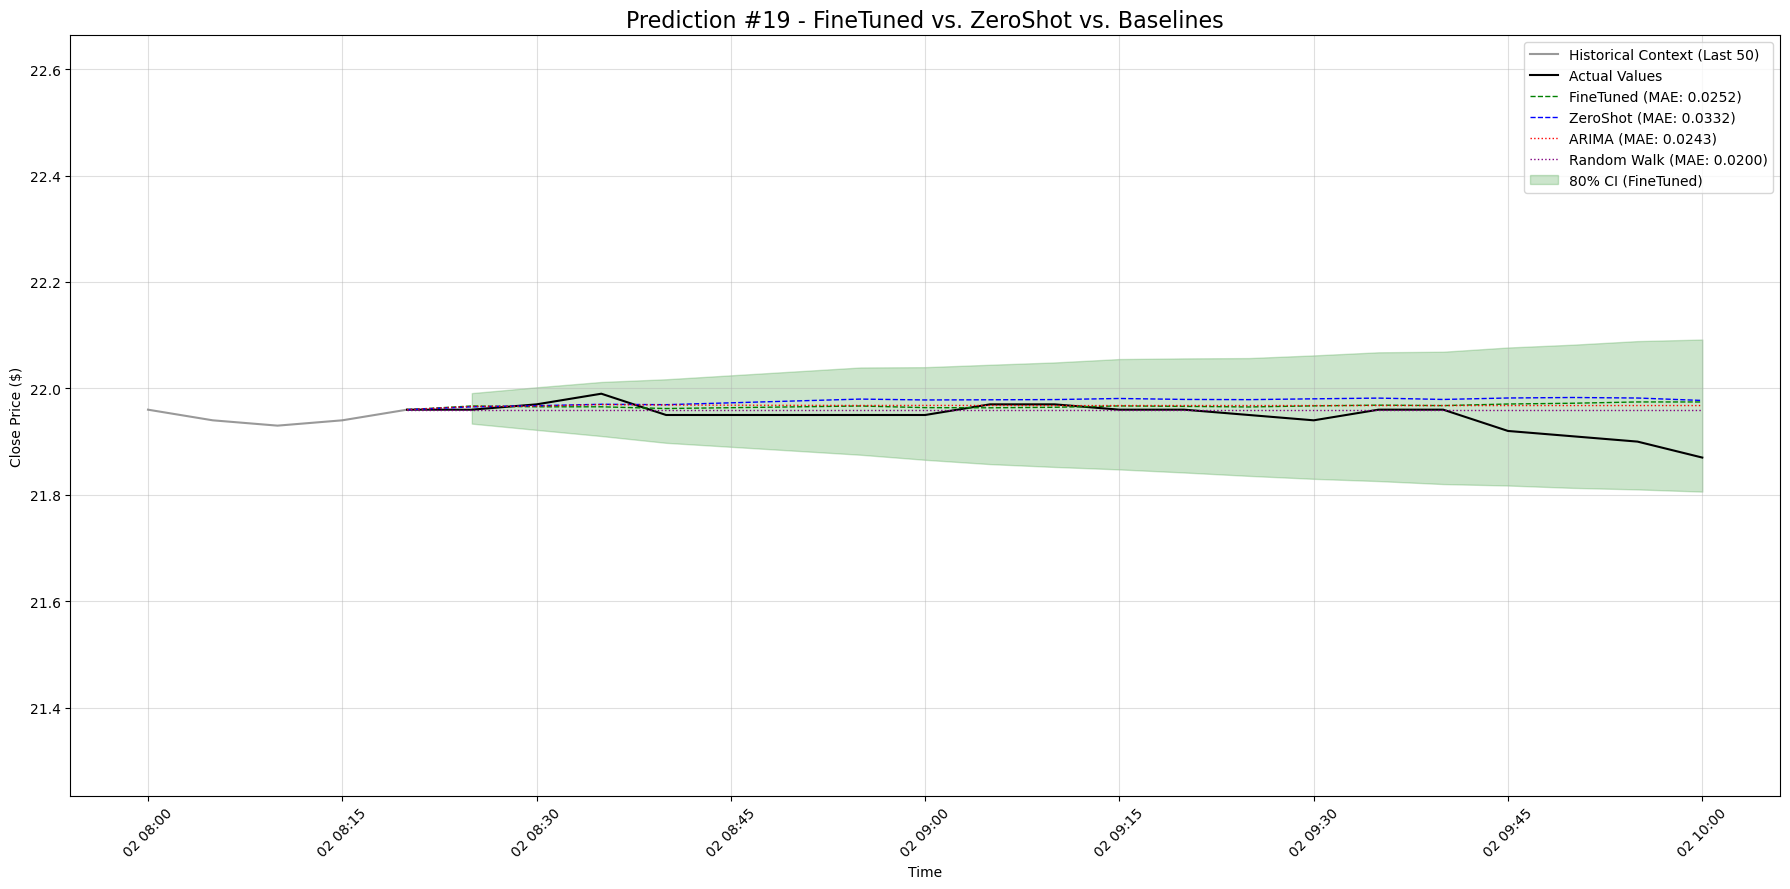

 ✅ FineTuned - MAE: 0.0252, RMSE: 0.0376
 ✅ ZeroShot  - MAE: 0.0332, RMSE: 0.0436
 ✅ ARIMA     - MAE: 0.0243, RMSE: 0.0354
 ✅ Random W. - MAE: 0.0200, RMSE: 0.0314
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_19_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_19_data.csv

🔍 Making prediction #20 for window ending at 2969
   🎯 AutoGluon native plot for prediction #20...
   🎯 AutoGluon native plot for prediction #20...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


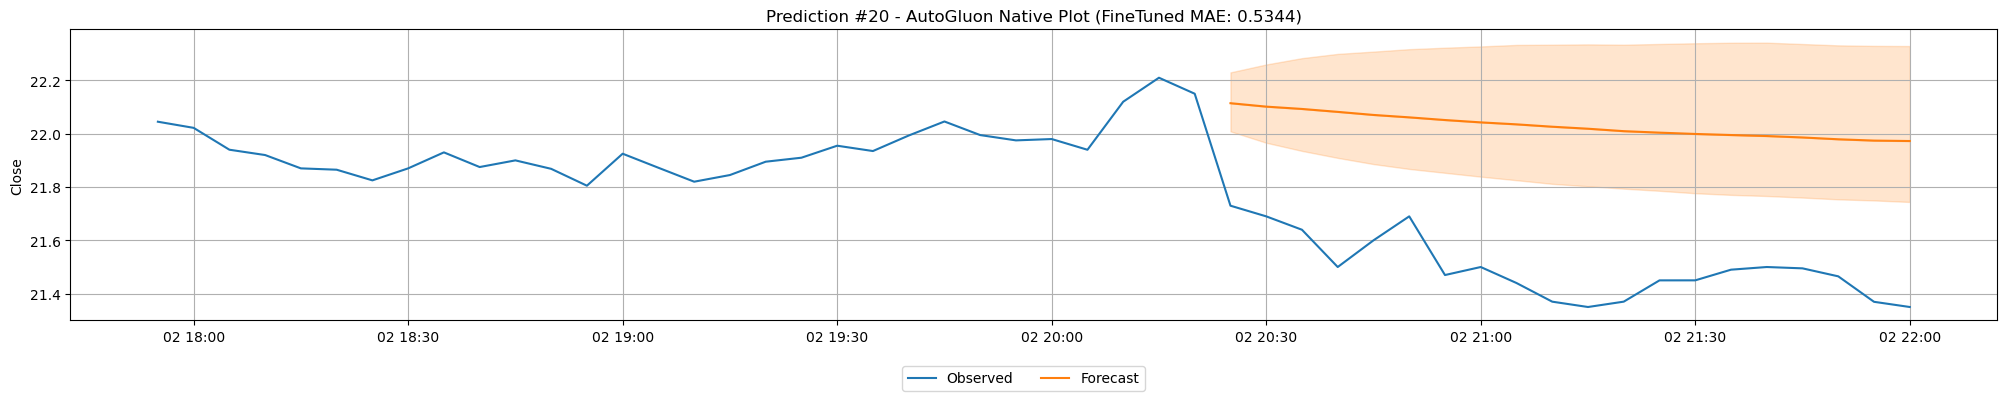

   📊 Custom comparison plot for prediction #20...


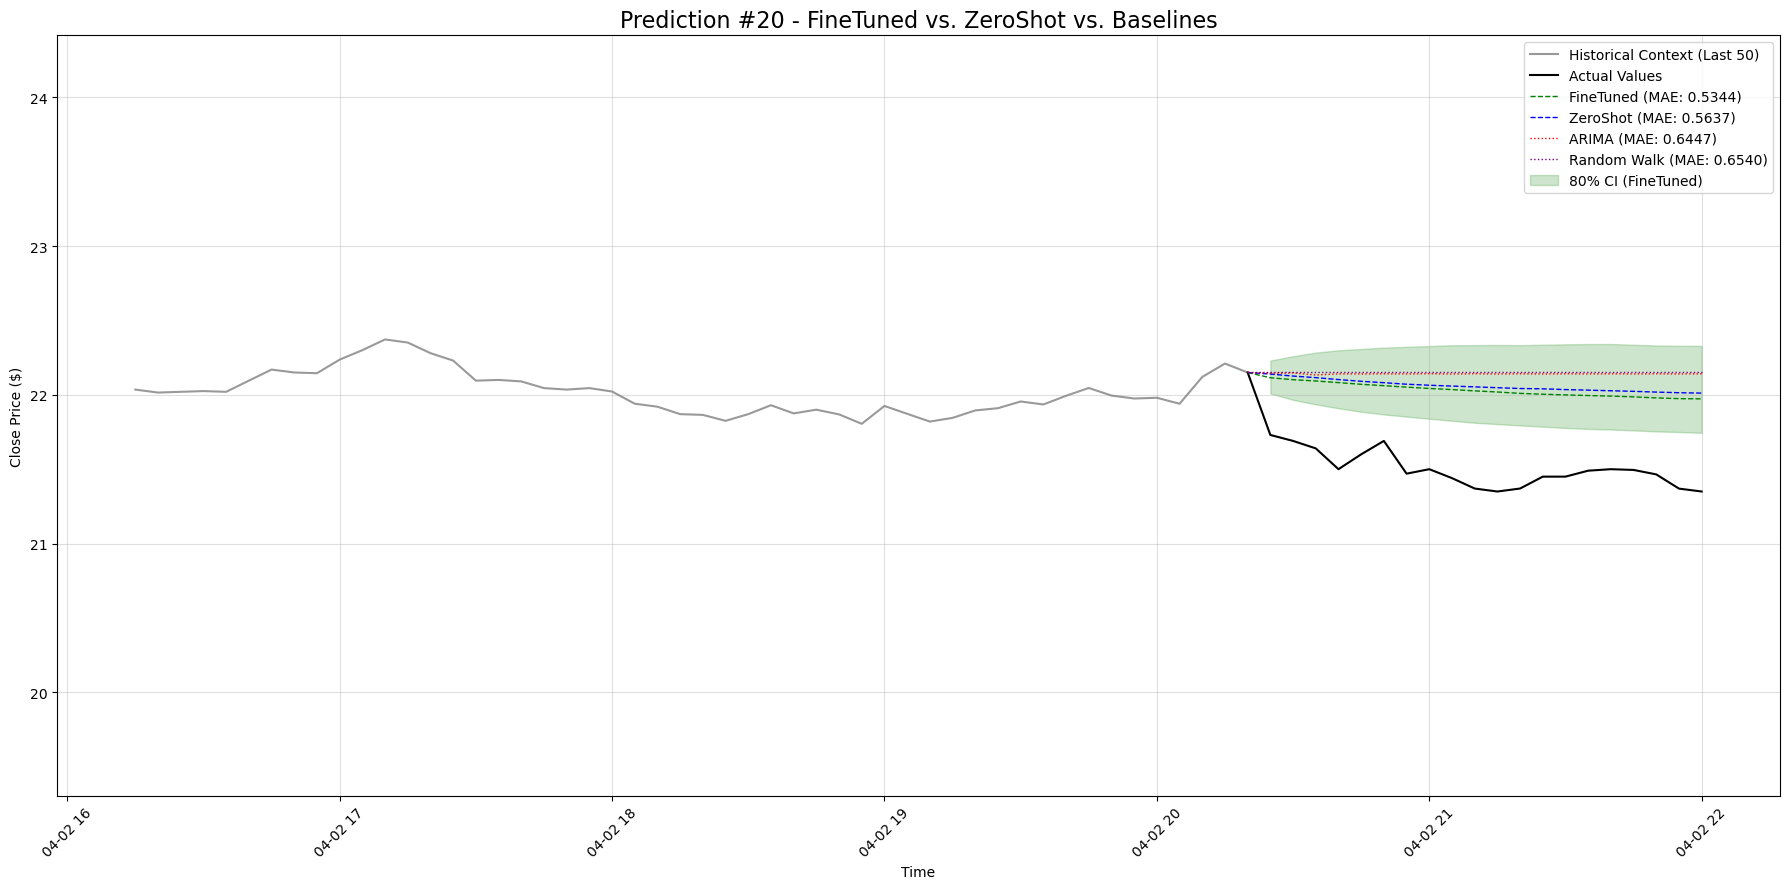

 ✅ FineTuned - MAE: 0.5344, RMSE: 0.5412
 ✅ ZeroShot  - MAE: 0.5637, RMSE: 0.5704
 ✅ ARIMA     - MAE: 0.6447, RMSE: 0.6547
 ✅ Random W. - MAE: 0.6540, RMSE: 0.6639
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_20_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_20_data.csv

🔍 Making prediction #21 for window ending at 3114
   🎯 AutoGluon native plot for prediction #21...
   🎯 AutoGluon native plot for prediction #21...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


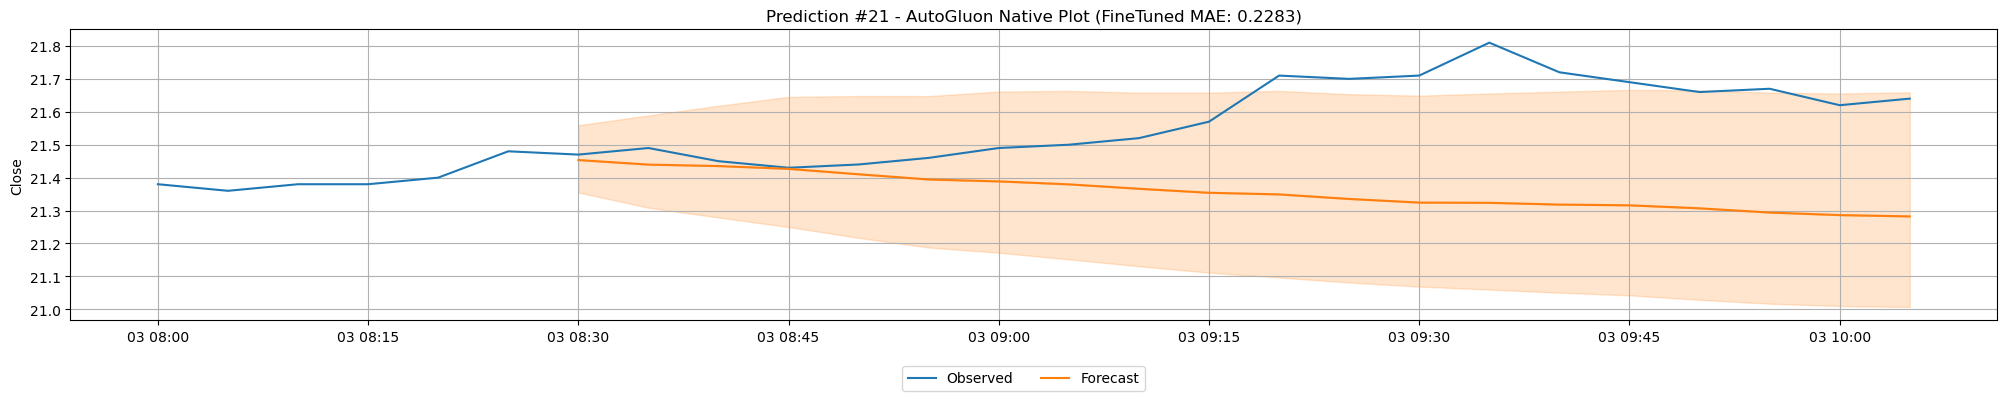

   📊 Custom comparison plot for prediction #21...


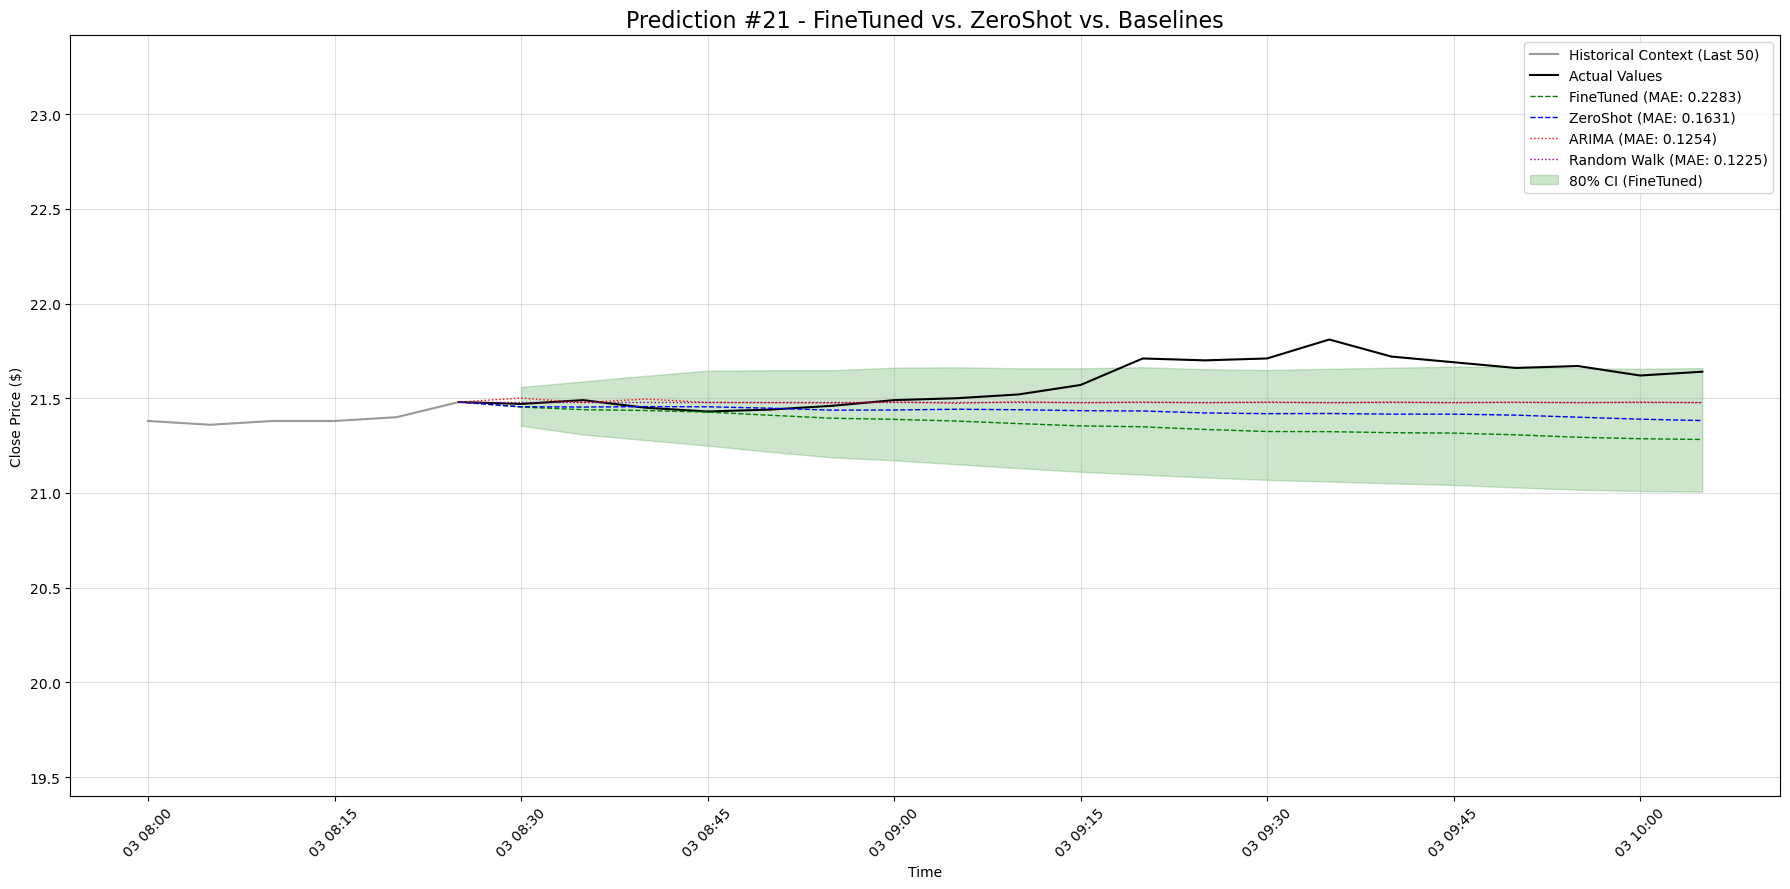

 ✅ FineTuned - MAE: 0.2283, RMSE: 0.2792
 ✅ ZeroShot  - MAE: 0.1631, RMSE: 0.2058
 ✅ ARIMA     - MAE: 0.1254, RMSE: 0.1590
 ✅ Random W. - MAE: 0.1225, RMSE: 0.1572
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_21_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_21_data.csv

🔍 Making prediction #22 for window ending at 3259
   🎯 AutoGluon native plot for prediction #22...
   🎯 AutoGluon native plot for prediction #22...


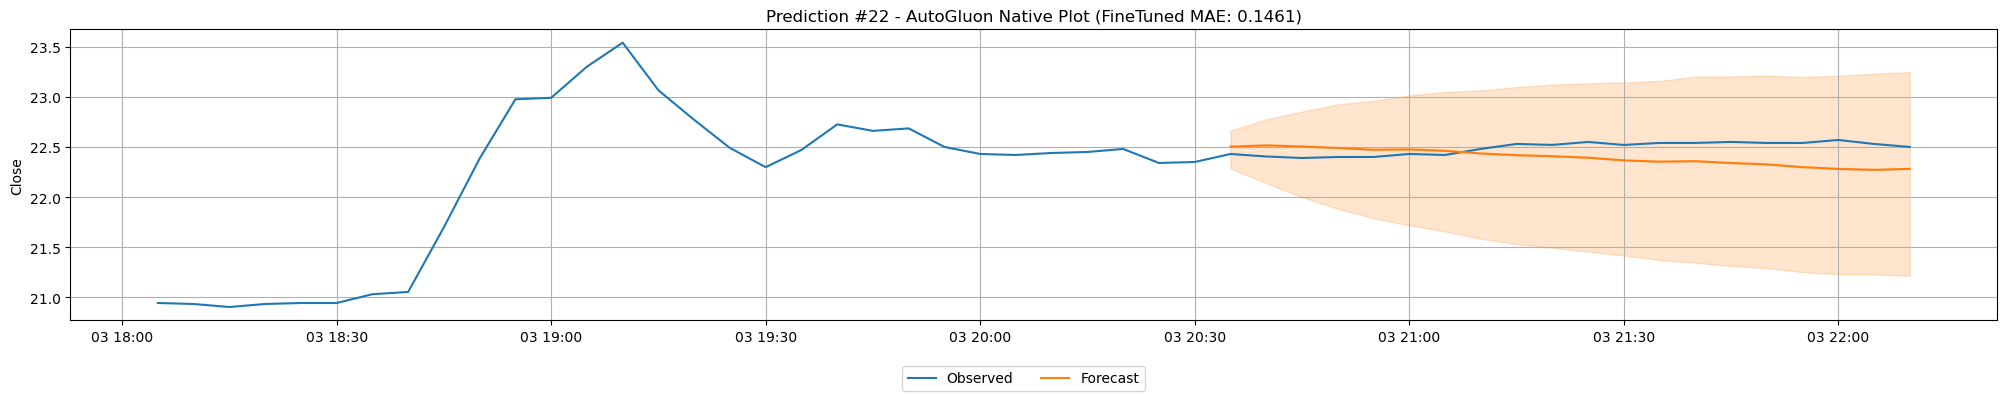

   📊 Custom comparison plot for prediction #22...


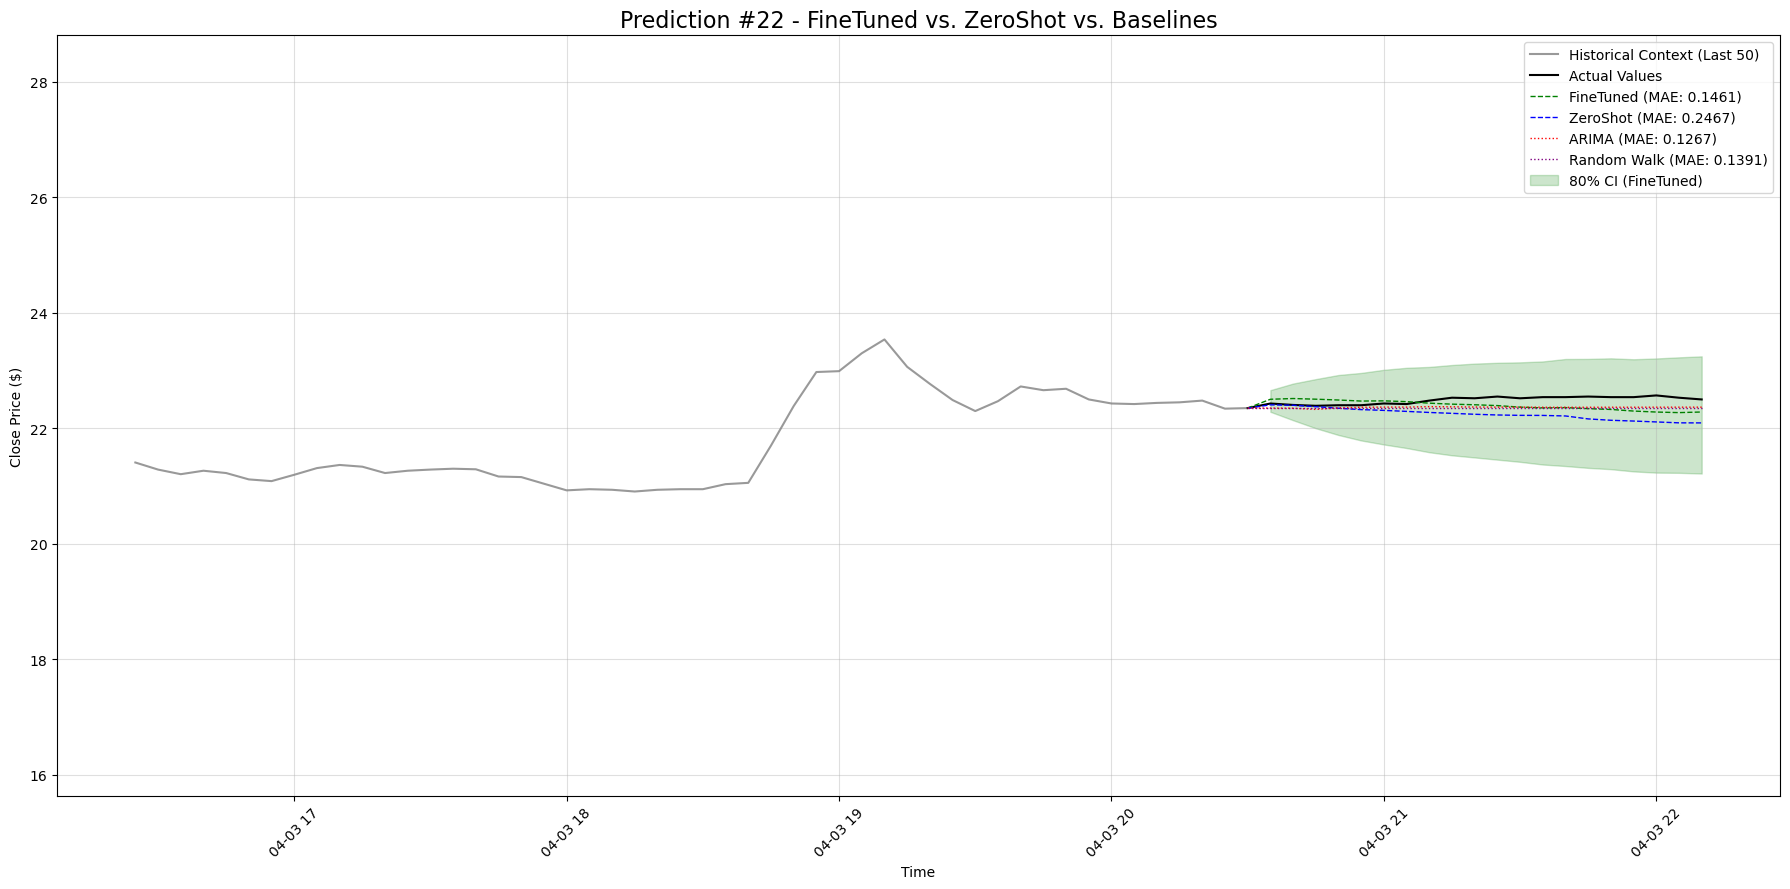

 ✅ FineTuned - MAE: 0.1461, RMSE: 0.1635
 ✅ ZeroShot  - MAE: 0.2467, RMSE: 0.2895
 ✅ ARIMA     - MAE: 0.1267, RMSE: 0.1384
 ✅ Random W. - MAE: 0.1391, RMSE: 0.1519
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_22_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_22_data.csv

🔍 Making prediction #23 for window ending at 3404
   🎯 AutoGluon native plot for prediction #23...
   🎯 AutoGluon native plot for prediction #23...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


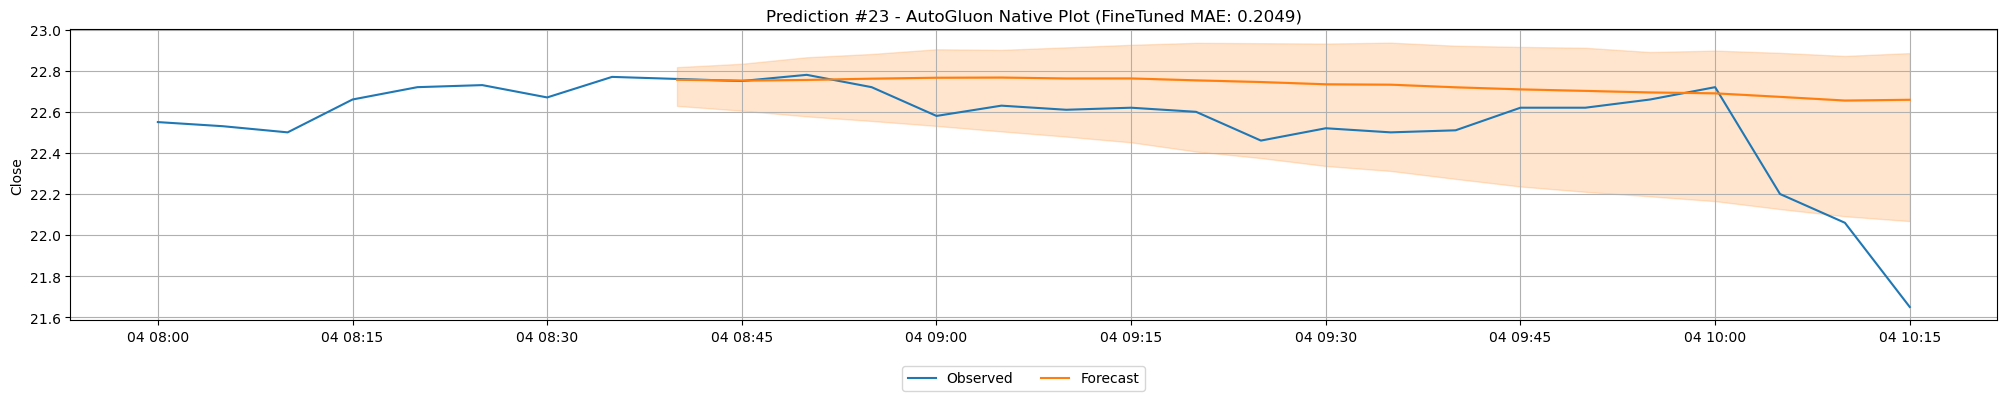

   📊 Custom comparison plot for prediction #23...


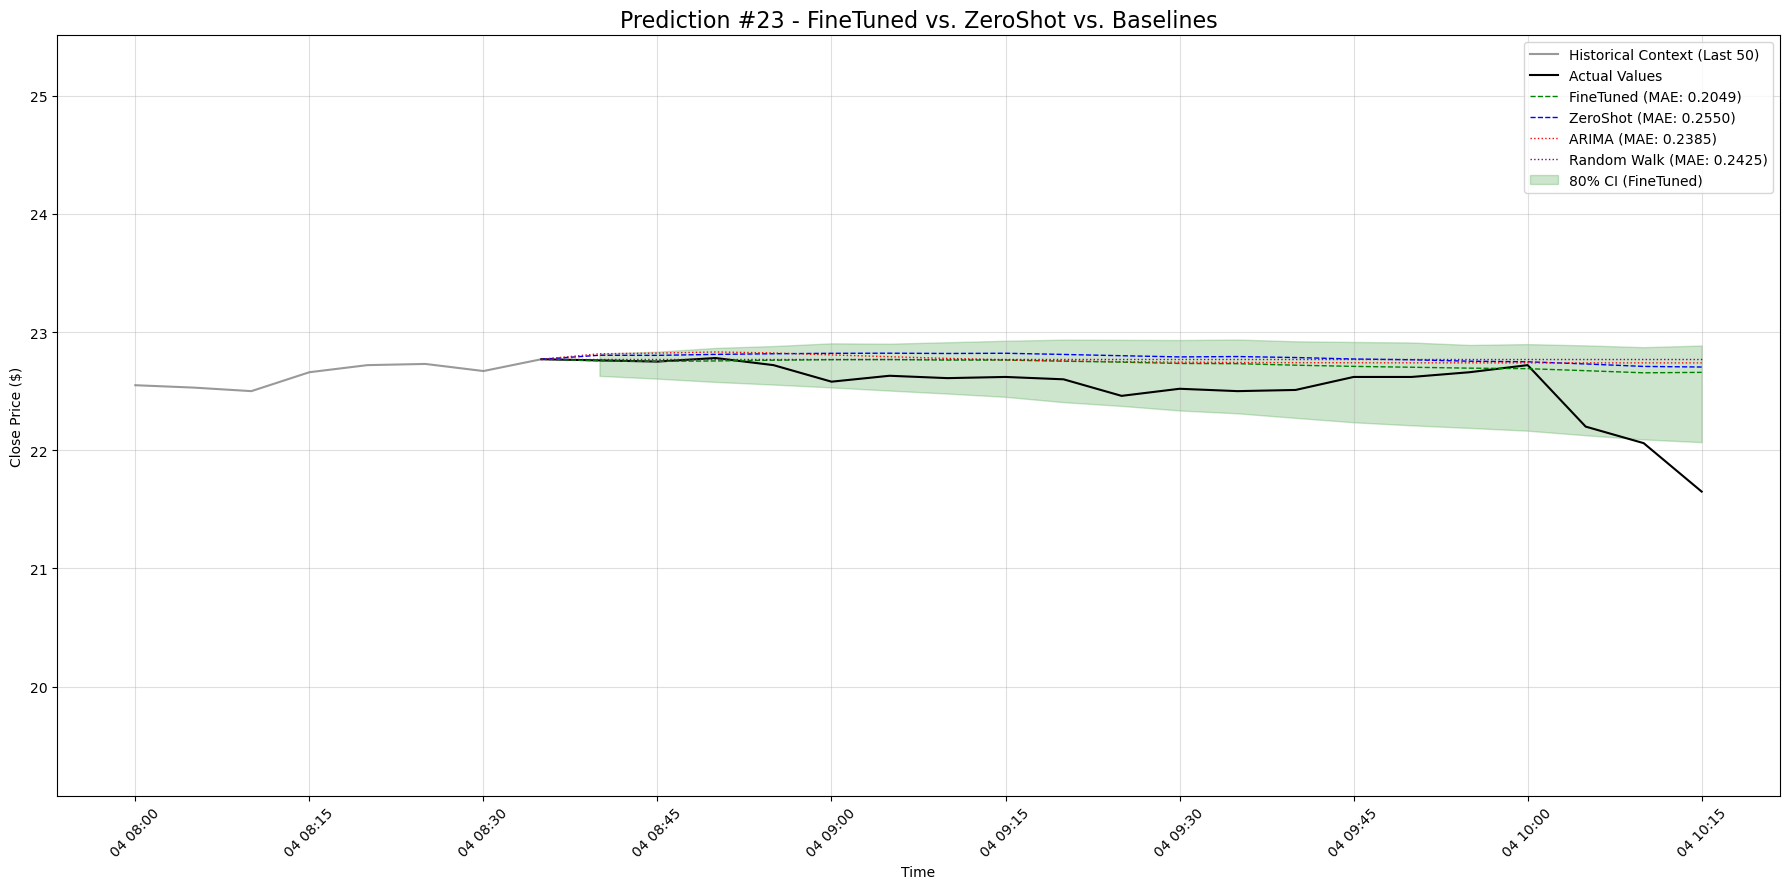

 ✅ FineTuned - MAE: 0.2049, RMSE: 0.3131
 ✅ ZeroShot  - MAE: 0.2550, RMSE: 0.3501
 ✅ ARIMA     - MAE: 0.2385, RMSE: 0.3458
 ✅ Random W. - MAE: 0.2425, RMSE: 0.3590
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_23_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_23_data.csv

🔍 Making prediction #24 for window ending at 3548
   🎯 AutoGluon native plot for prediction #24...
   🎯 AutoGluon native plot for prediction #24...


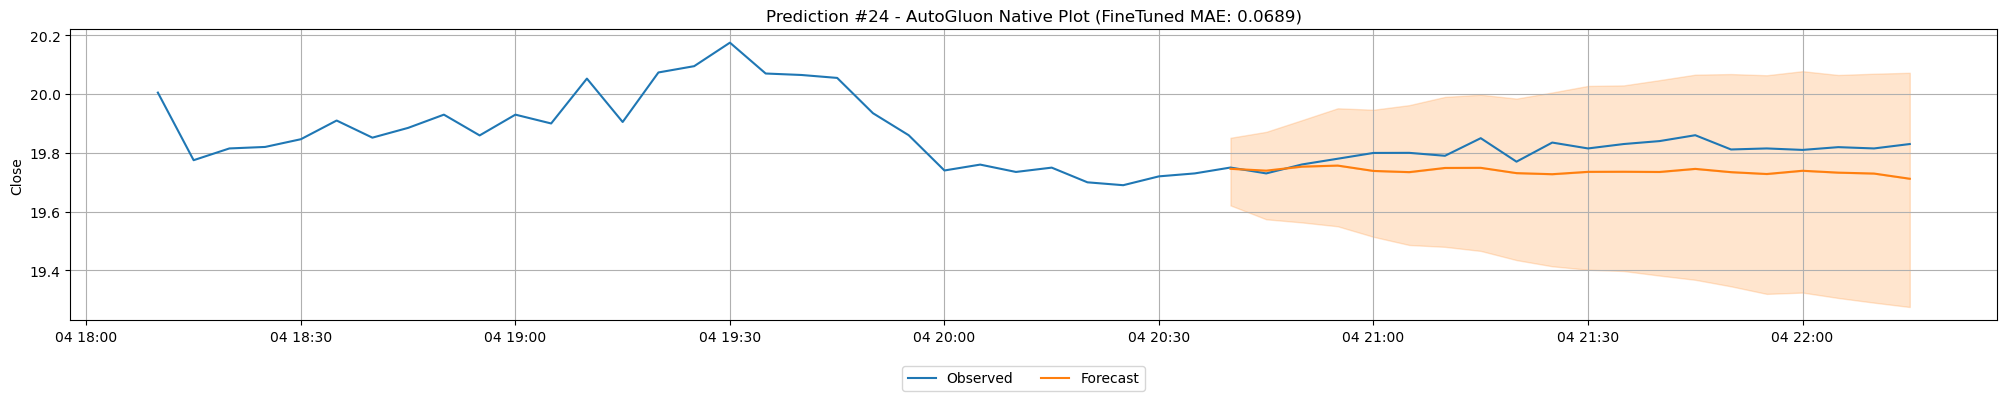

   📊 Custom comparison plot for prediction #24...


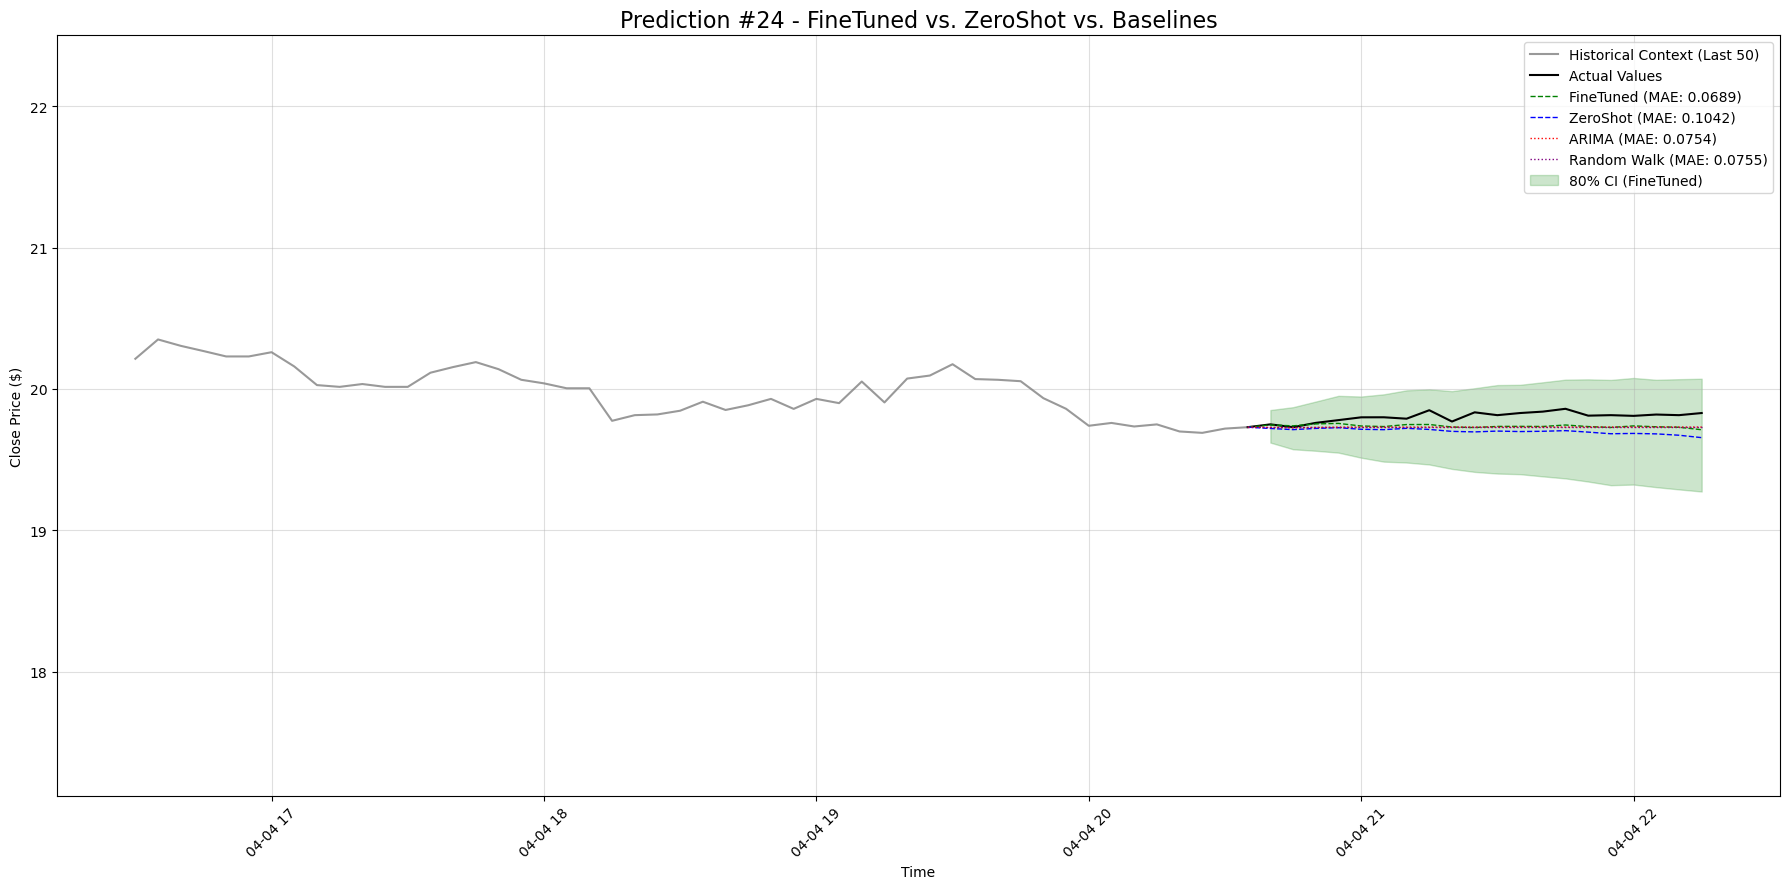

 ✅ FineTuned - MAE: 0.0689, RMSE: 0.0776
 ✅ ZeroShot  - MAE: 0.1042, RMSE: 0.1131
 ✅ ARIMA     - MAE: 0.0754, RMSE: 0.0819
 ✅ Random W. - MAE: 0.0755, RMSE: 0.0824
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_24_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_24_data.csv

🔍 Making prediction #25 for window ending at 3693

🔍 Making prediction #26 for window ending at 3838

🔍 Making prediction #26 for window ending at 3838

🔍 Making prediction #27 for window ending at 3983

🔍 Making prediction #27 for window ending at 3983

🔍 Making prediction #28 for window ending at 4127

🔍 Making prediction #28 for window ending at 4127

🔍 Making prediction #29 for window ending at 4272

🔍 Making prediction #29 for window ending at 4272
   🎯 AutoGluon native plot for prediction #29...
   🎯 AutoGluon native plot for prediction #29...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


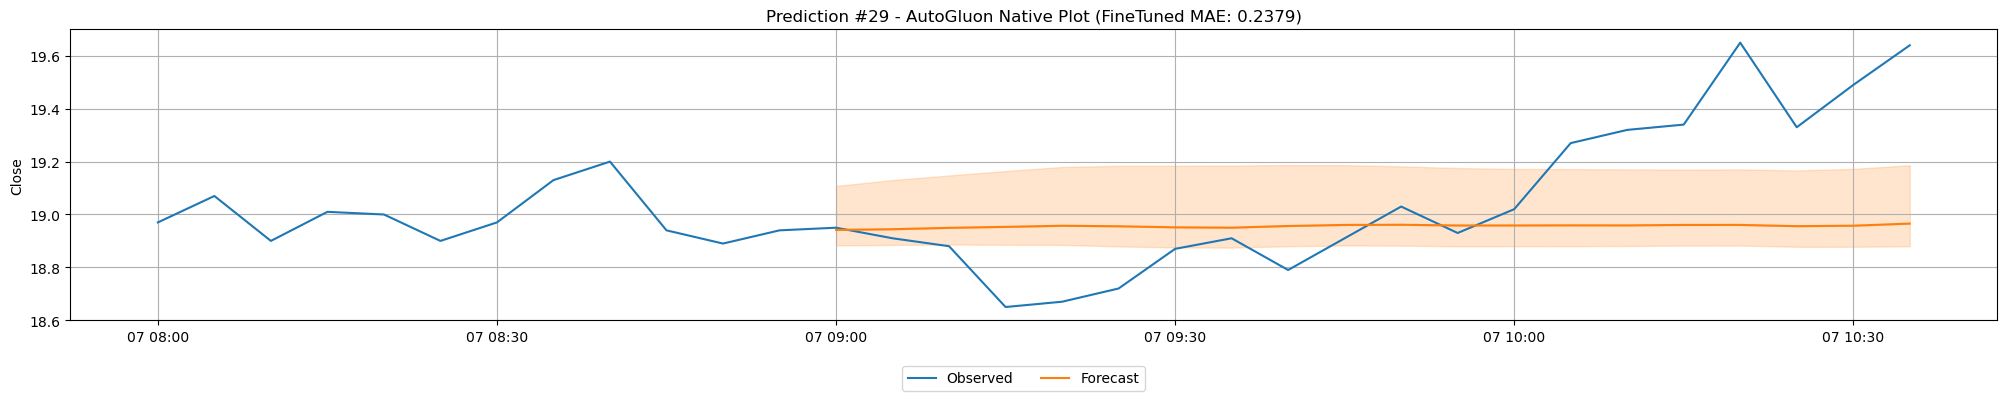

   📊 Custom comparison plot for prediction #29...


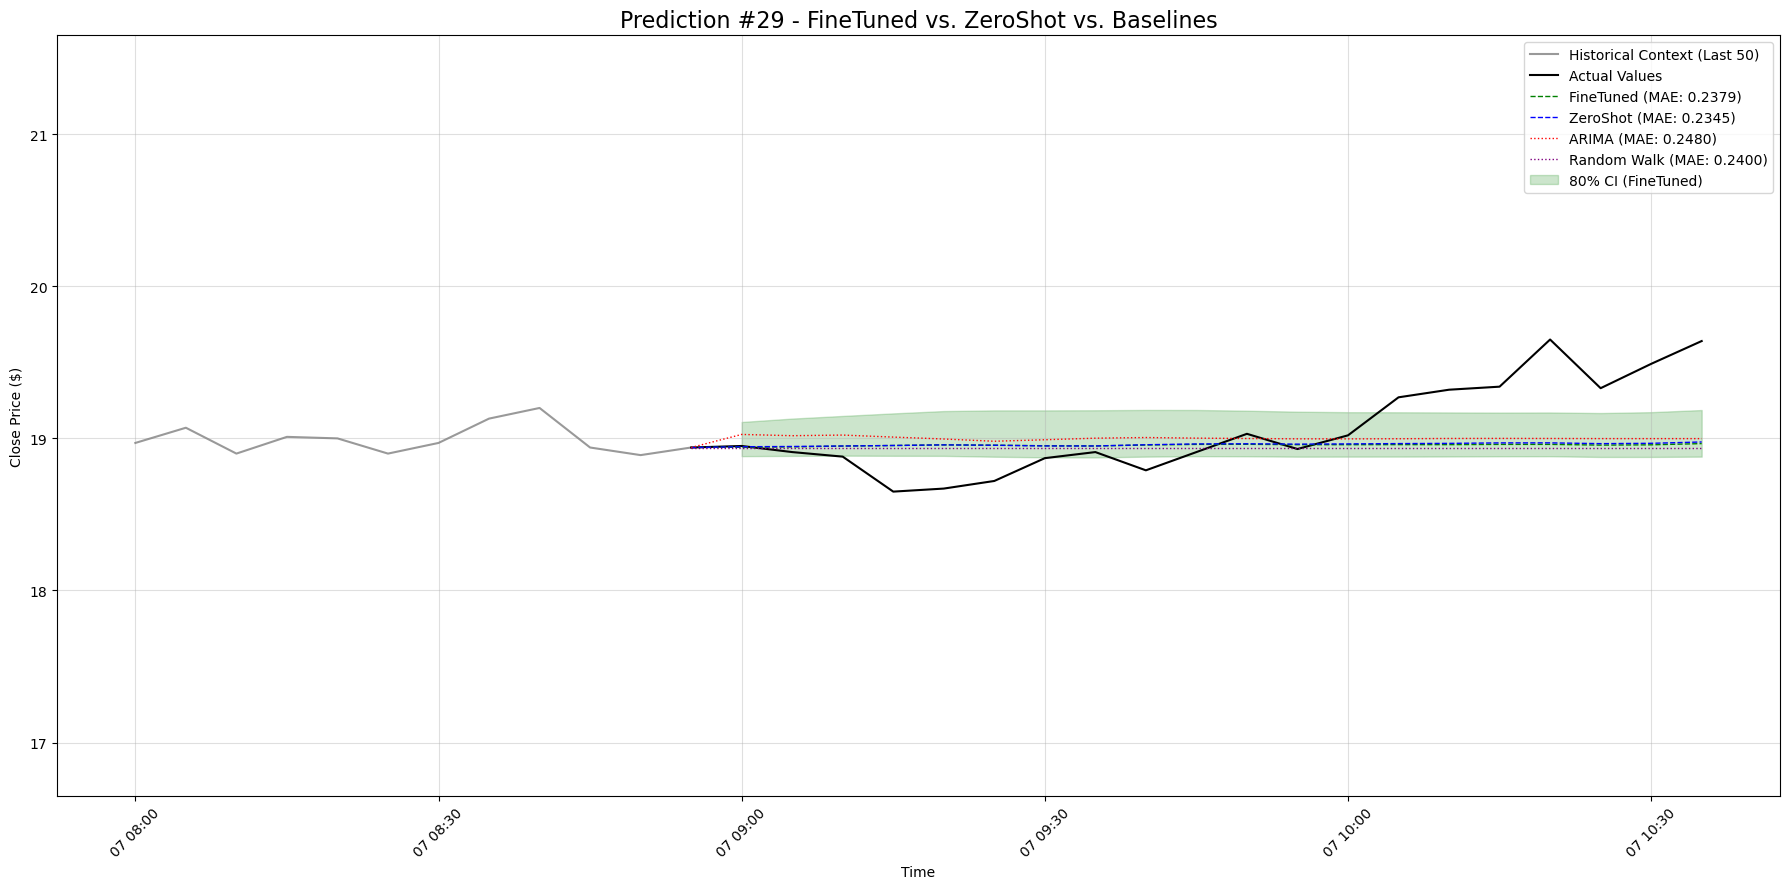

 ✅ FineTuned - MAE: 0.2379, RMSE: 0.3169
 ✅ ZeroShot  - MAE: 0.2345, RMSE: 0.3119
 ✅ ARIMA     - MAE: 0.2480, RMSE: 0.3085
 ✅ Random W. - MAE: 0.2400, RMSE: 0.3253
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_29_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_29_data.csv

🔍 Making prediction #30 for window ending at 4417
   🎯 AutoGluon native plot for prediction #30...
   🎯 AutoGluon native plot for prediction #30...


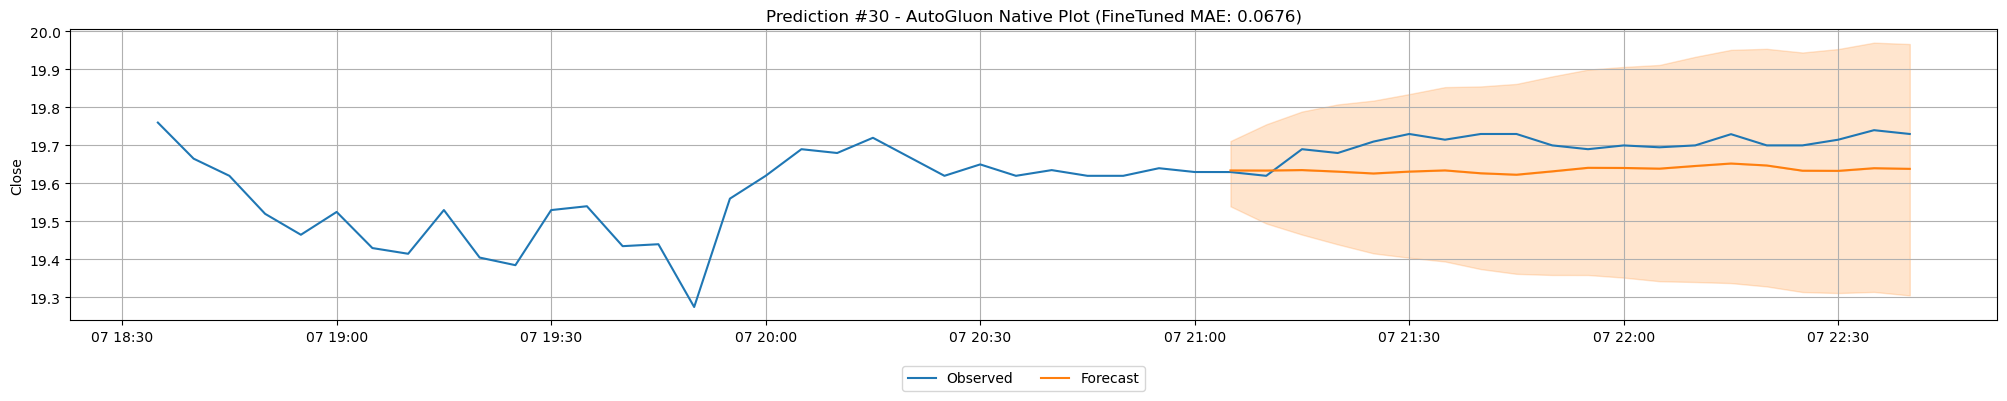

   📊 Custom comparison plot for prediction #30...


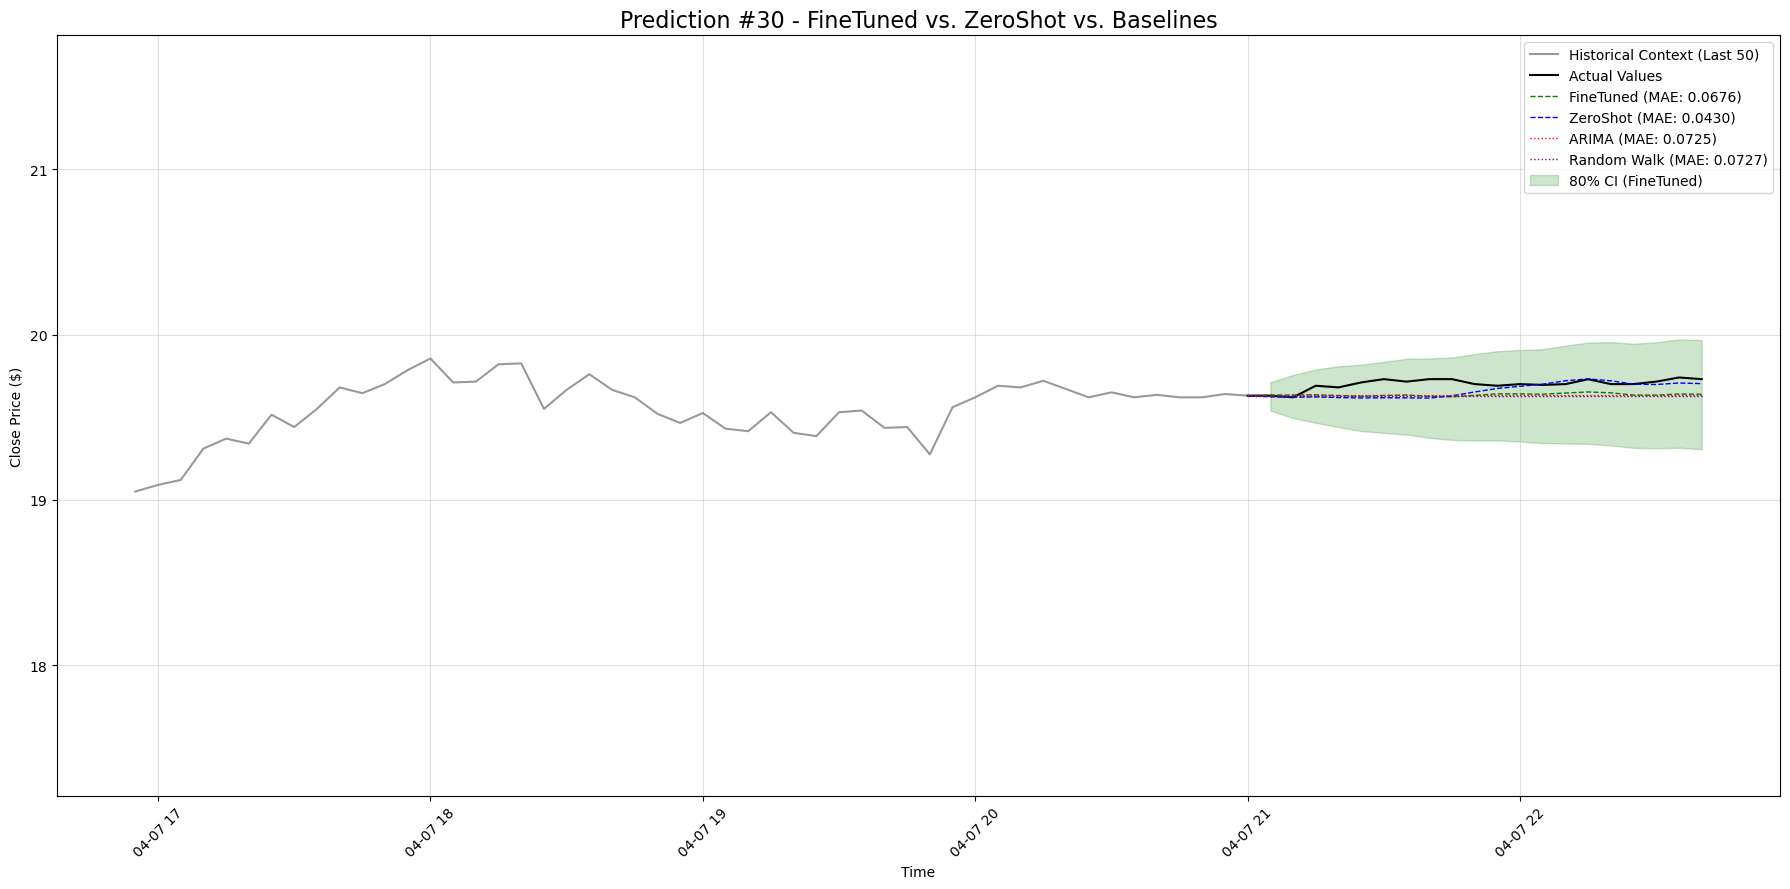

 ✅ FineTuned - MAE: 0.0676, RMSE: 0.0728
 ✅ ZeroShot  - MAE: 0.0430, RMSE: 0.0585
 ✅ ARIMA     - MAE: 0.0725, RMSE: 0.0774
 ✅ Random W. - MAE: 0.0727, RMSE: 0.0779
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_30_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_30_data.csv

🔍 Making prediction #31 for window ending at 4562
   🎯 AutoGluon native plot for prediction #31...
   🎯 AutoGluon native plot for prediction #31...


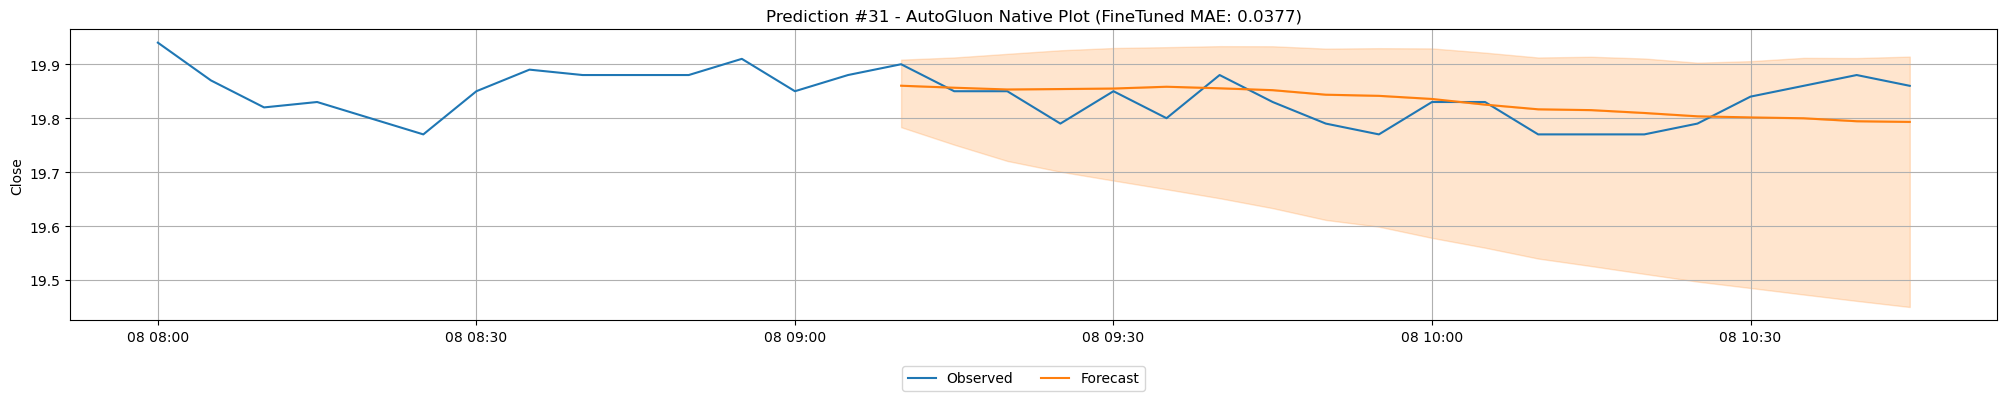

   📊 Custom comparison plot for prediction #31...


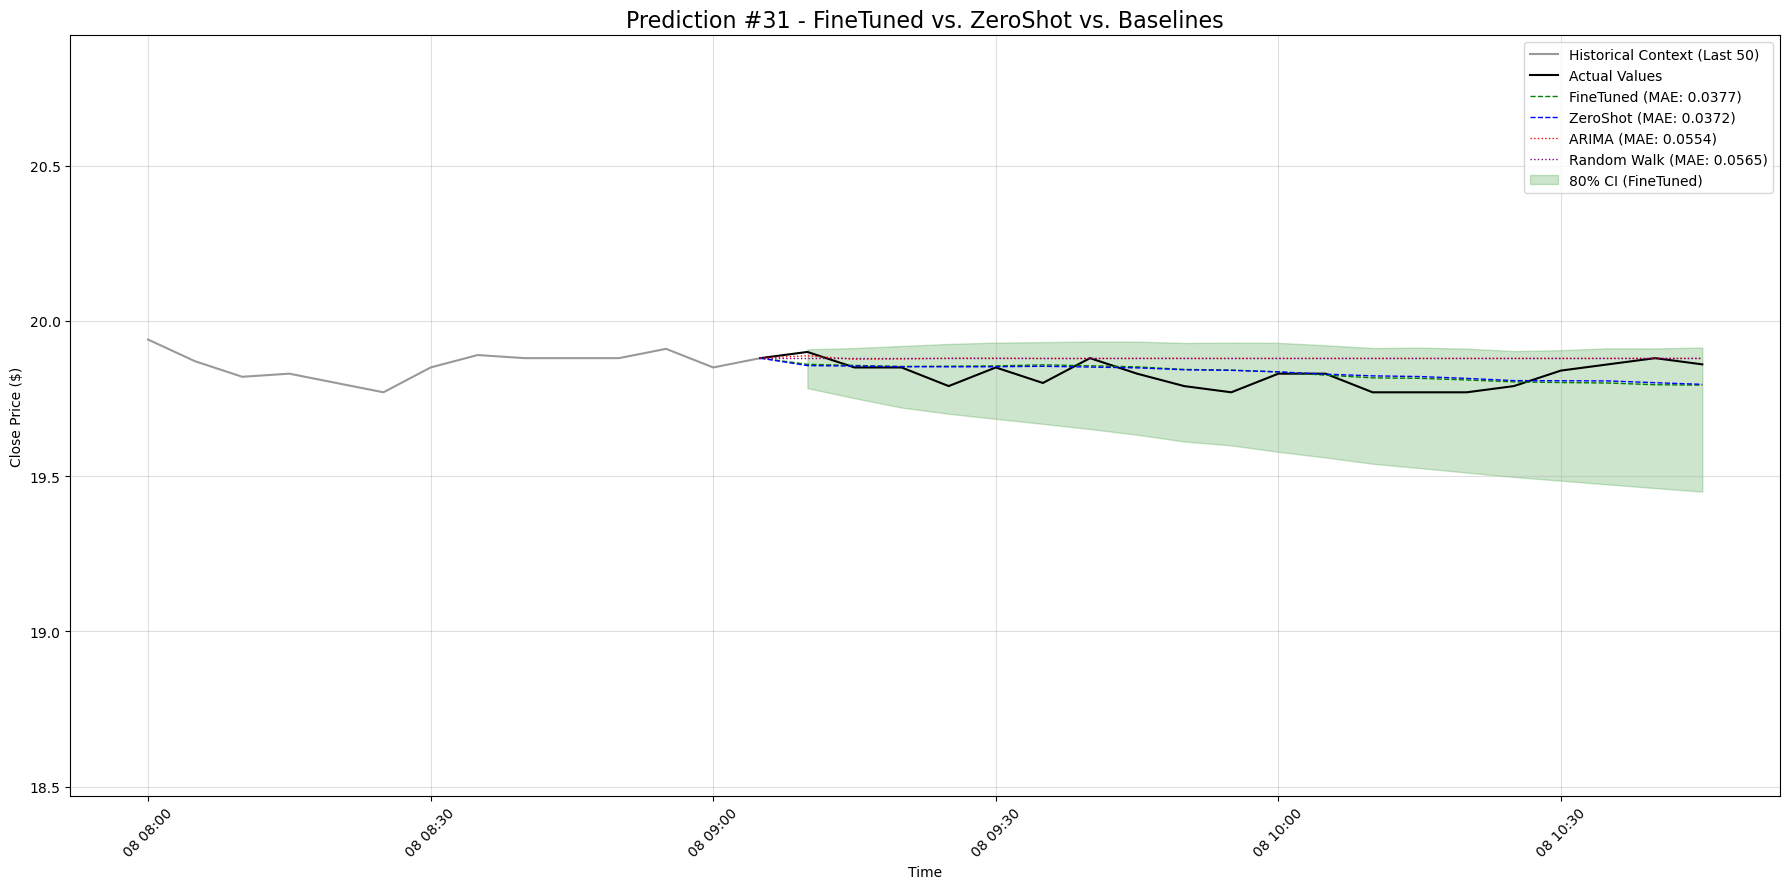

 ✅ FineTuned - MAE: 0.0377, RMSE: 0.0453
 ✅ ZeroShot  - MAE: 0.0372, RMSE: 0.0446
 ✅ ARIMA     - MAE: 0.0554, RMSE: 0.0671
 ✅ Random W. - MAE: 0.0565, RMSE: 0.0679
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_31_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_31_data.csv

🔍 Making prediction #32 for window ending at 4706
   🎯 AutoGluon native plot for prediction #32...
   🎯 AutoGluon native plot for prediction #32...


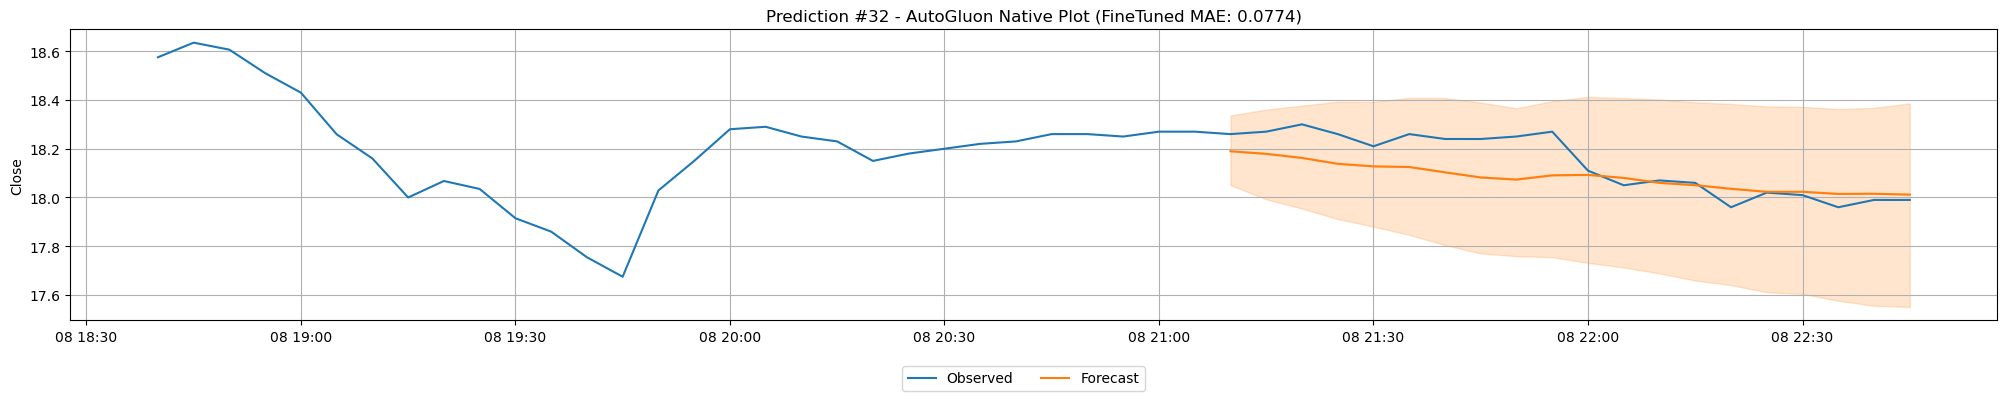

   📊 Custom comparison plot for prediction #32...


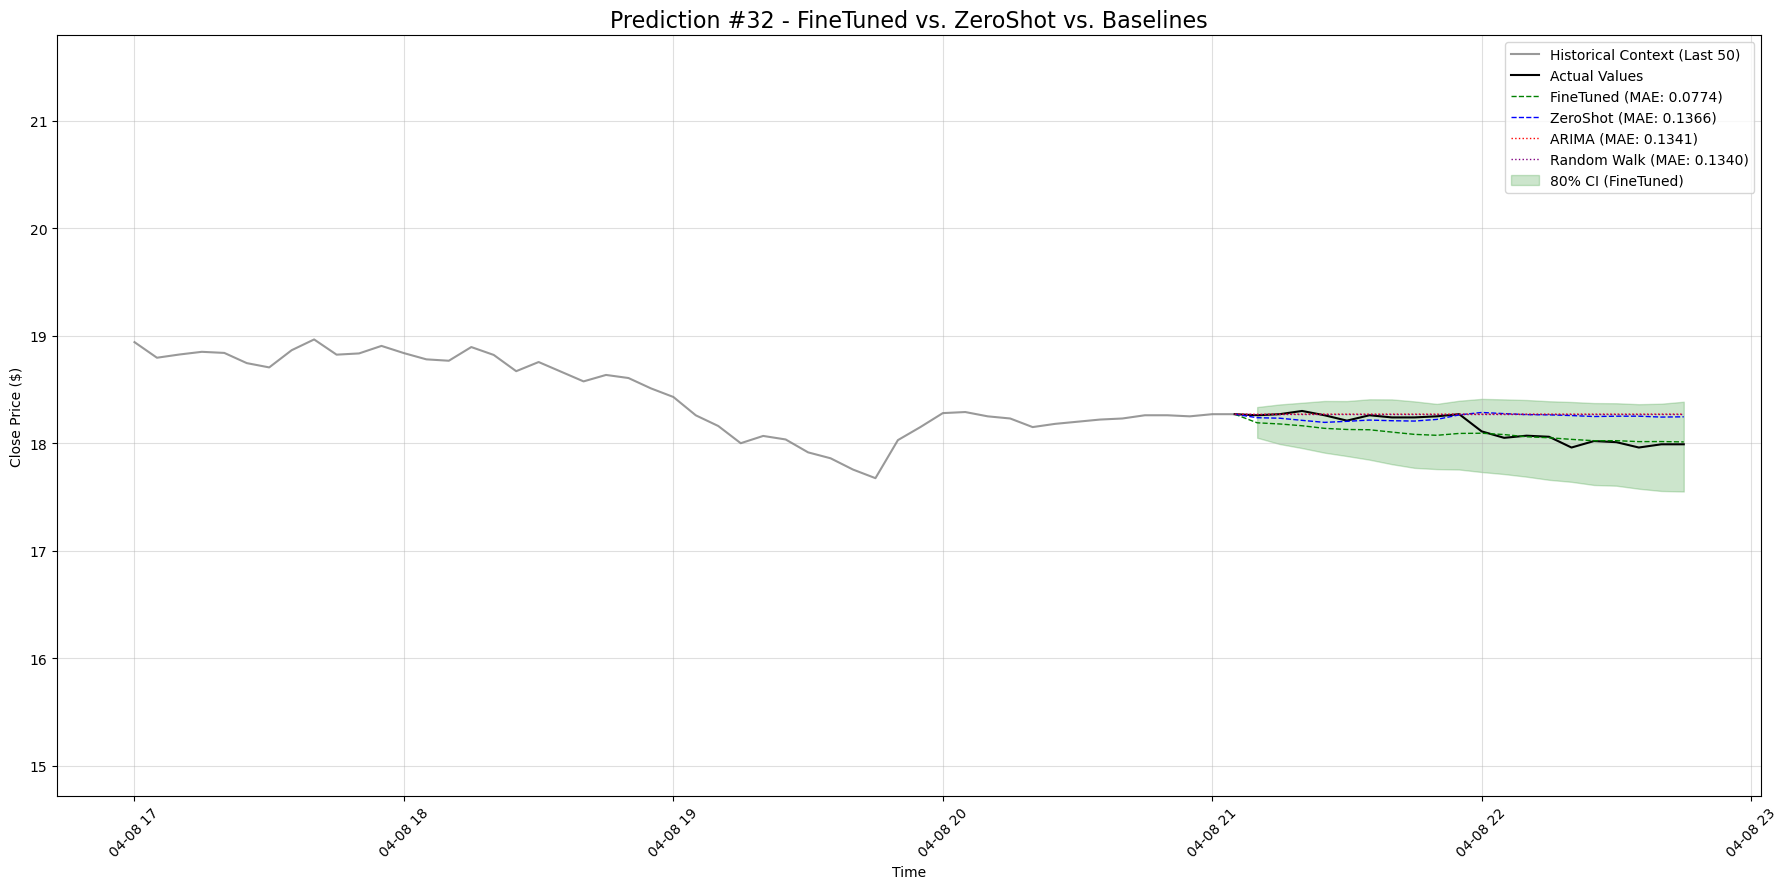

 ✅ FineTuned - MAE: 0.0774, RMSE: 0.0975
 ✅ ZeroShot  - MAE: 0.1366, RMSE: 0.1723
 ✅ ARIMA     - MAE: 0.1341, RMSE: 0.1796
 ✅ Random W. - MAE: 0.1340, RMSE: 0.1795
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_32_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_32_data.csv

🔍 Making prediction #33 for window ending at 4851
   🎯 AutoGluon native plot for prediction #33...
   🎯 AutoGluon native plot for prediction #33...


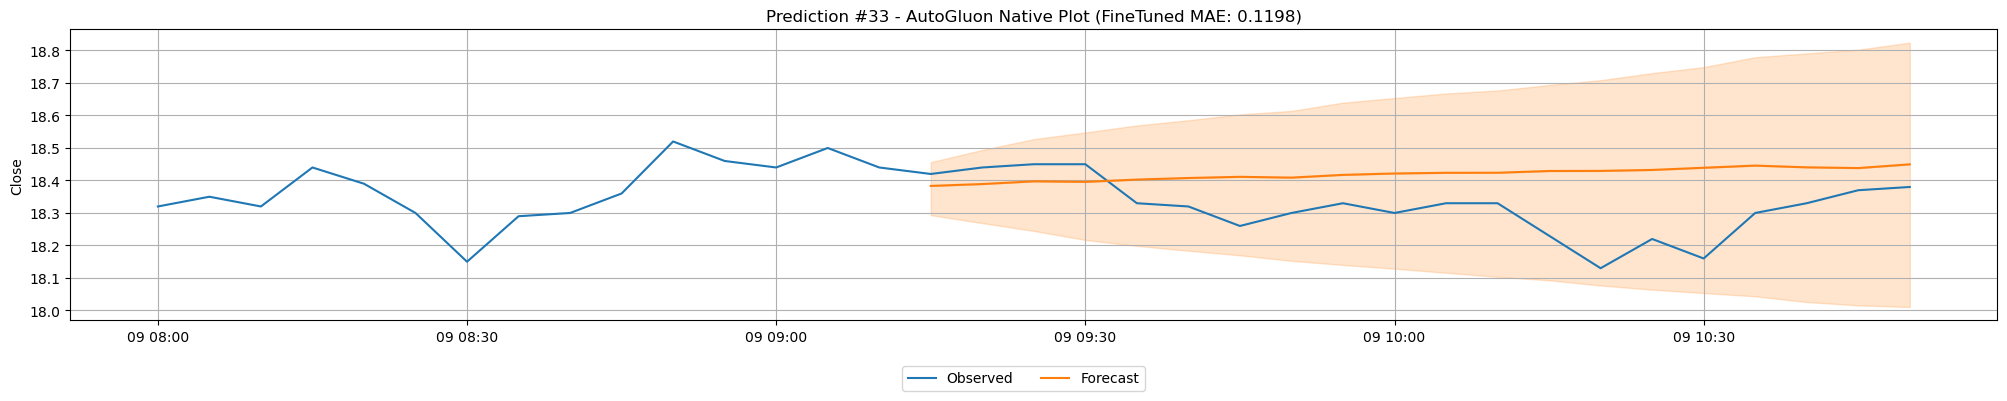

   📊 Custom comparison plot for prediction #33...


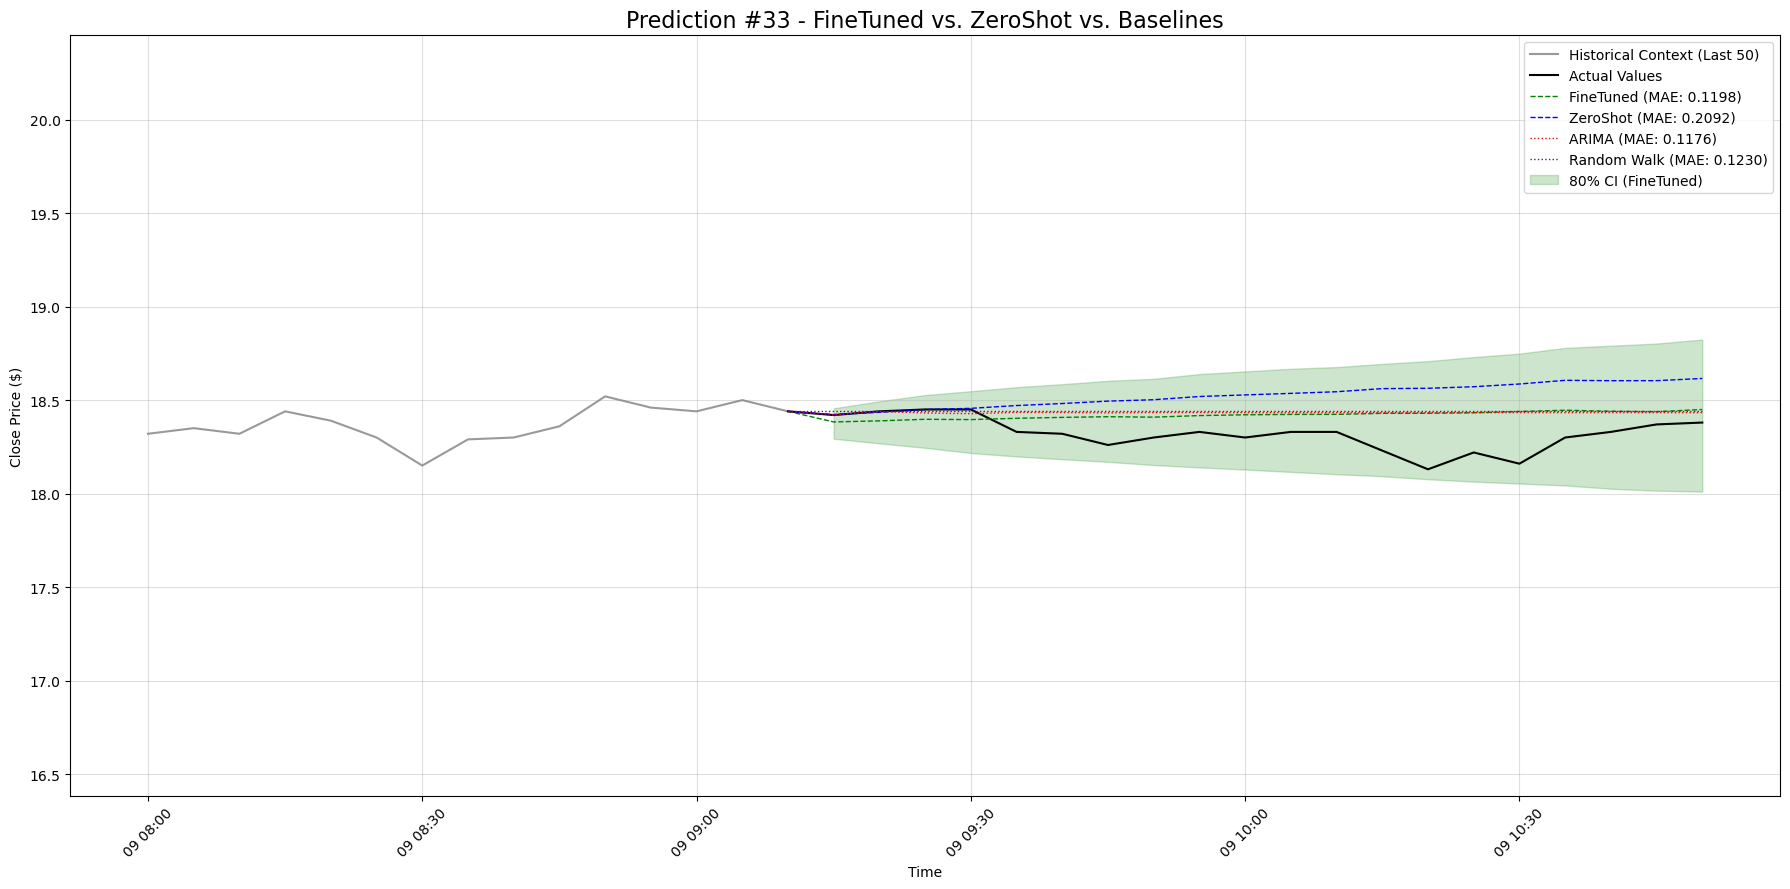

 ✅ FineTuned - MAE: 0.1198, RMSE: 0.1401
 ✅ ZeroShot  - MAE: 0.2092, RMSE: 0.2450
 ✅ ARIMA     - MAE: 0.1176, RMSE: 0.1431
 ✅ Random W. - MAE: 0.1230, RMSE: 0.1487
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_33_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_33_data.csv

🔍 Making prediction #34 for window ending at 4996
   🎯 AutoGluon native plot for prediction #34...
   🎯 AutoGluon native plot for prediction #34...


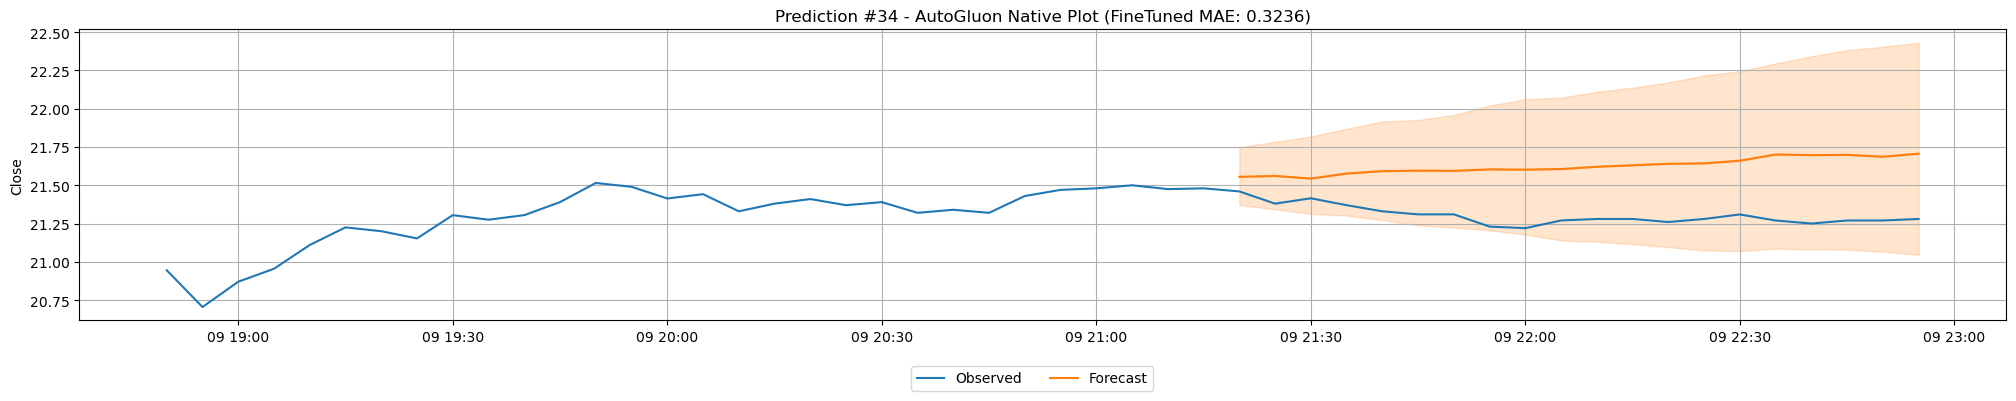

   📊 Custom comparison plot for prediction #34...


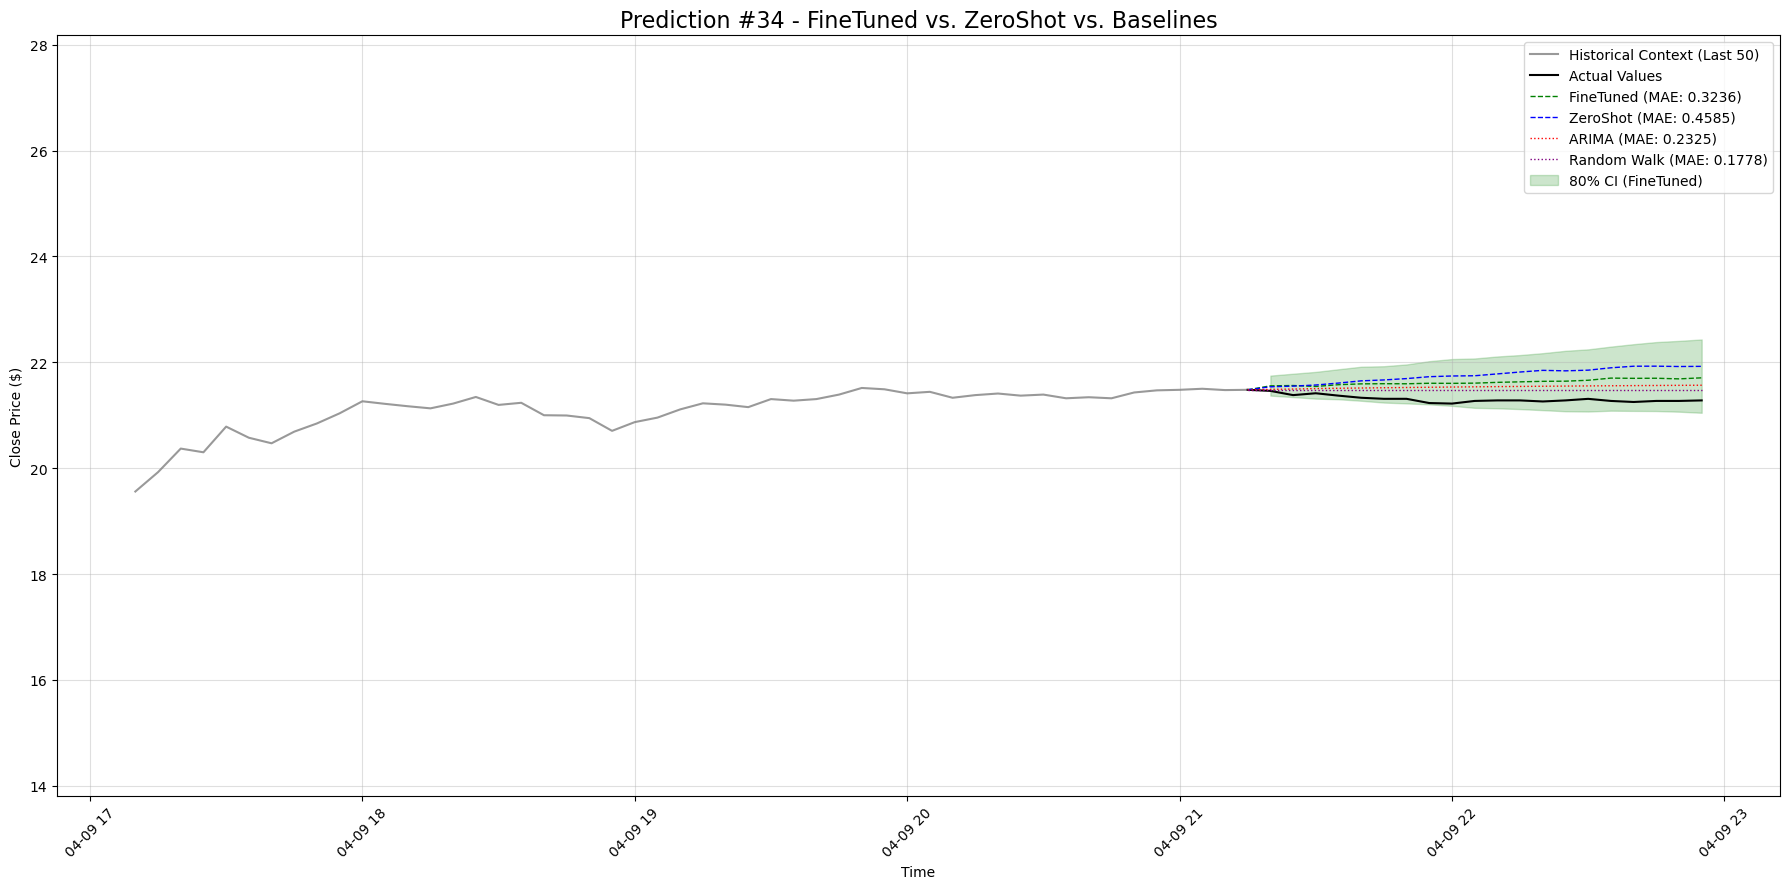

 ✅ FineTuned - MAE: 0.3236, RMSE: 0.3388
 ✅ ZeroShot  - MAE: 0.4585, RMSE: 0.4920
 ✅ ARIMA     - MAE: 0.2325, RMSE: 0.2456
 ✅ Random W. - MAE: 0.1778, RMSE: 0.1876
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_34_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_34_data.csv

🔍 Making prediction #35 for window ending at 5140
   🎯 AutoGluon native plot for prediction #35...
   🎯 AutoGluon native plot for prediction #35...


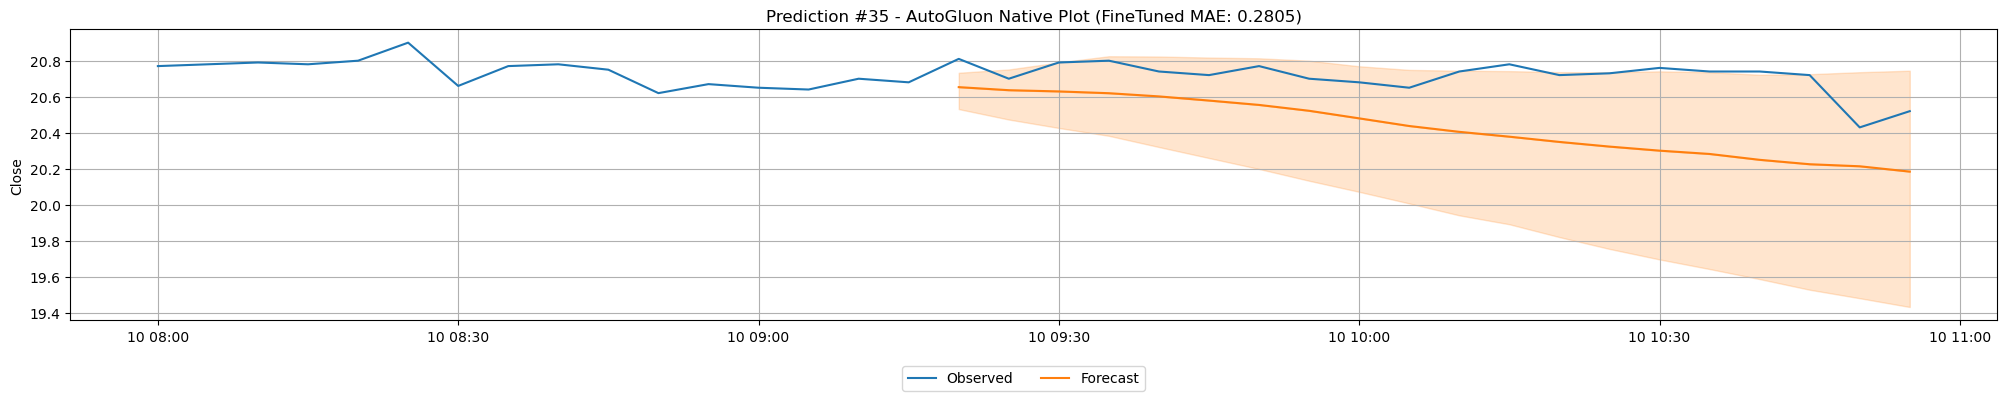

   📊 Custom comparison plot for prediction #35...


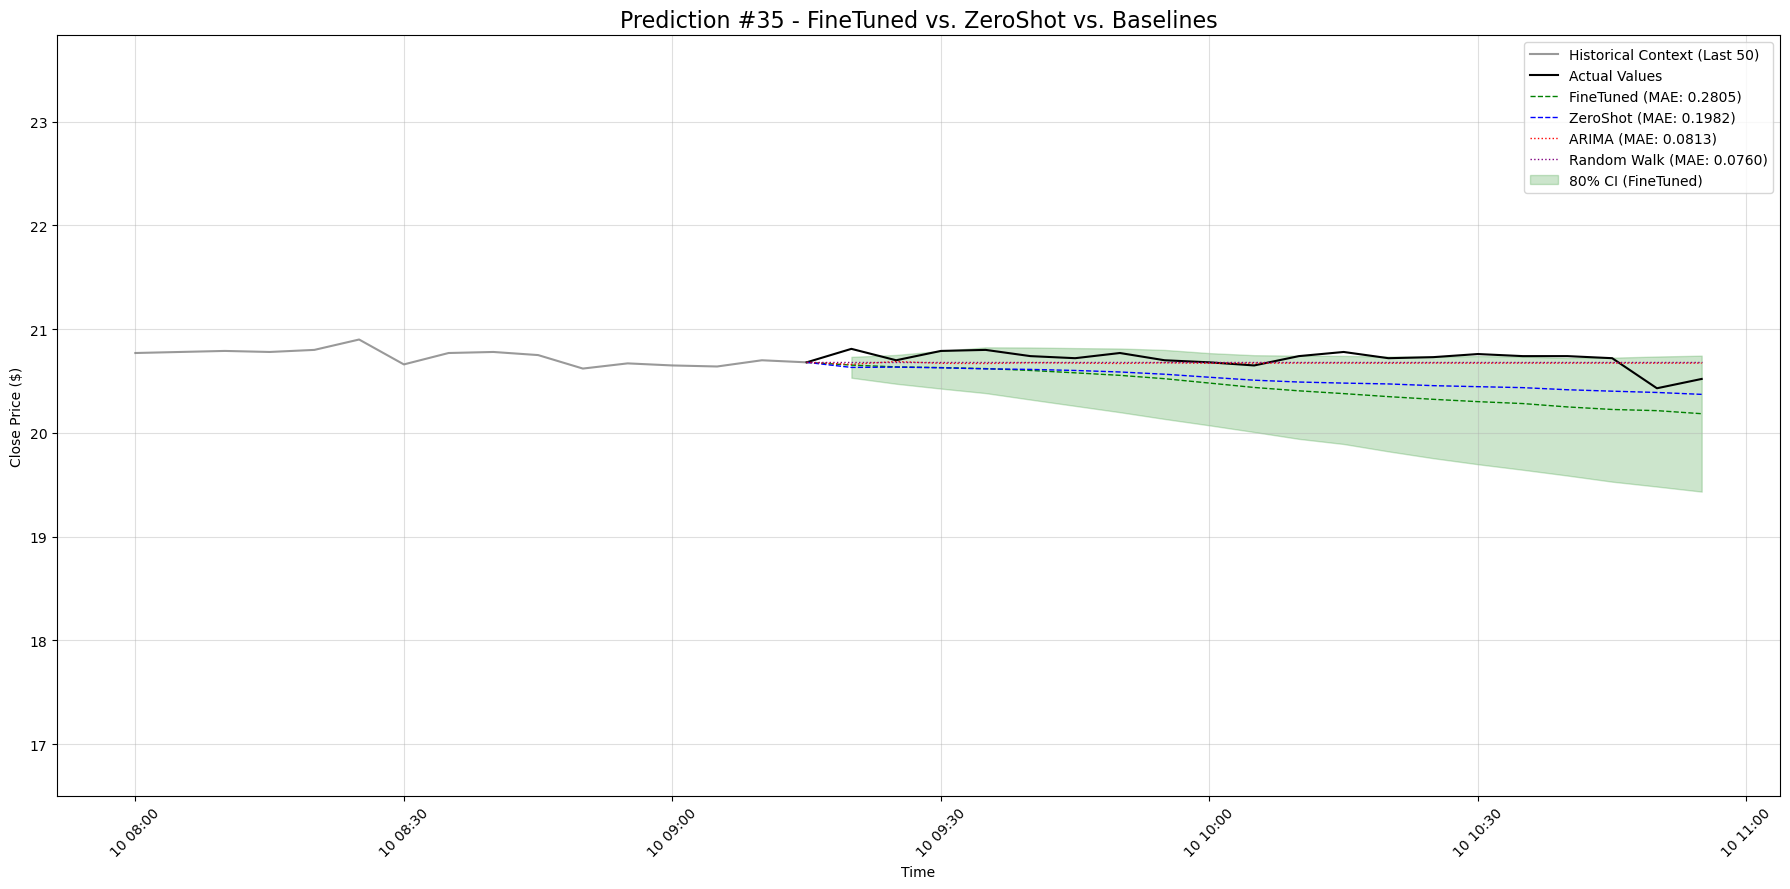

 ✅ FineTuned - MAE: 0.2805, RMSE: 0.3105
 ✅ ZeroShot  - MAE: 0.1982, RMSE: 0.2157
 ✅ ARIMA     - MAE: 0.0813, RMSE: 0.0985
 ✅ Random W. - MAE: 0.0760, RMSE: 0.0947
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_35_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_35_data.csv

🔍 Making prediction #36 for window ending at 5285
   🎯 AutoGluon native plot for prediction #36...
   🎯 AutoGluon native plot for prediction #36...


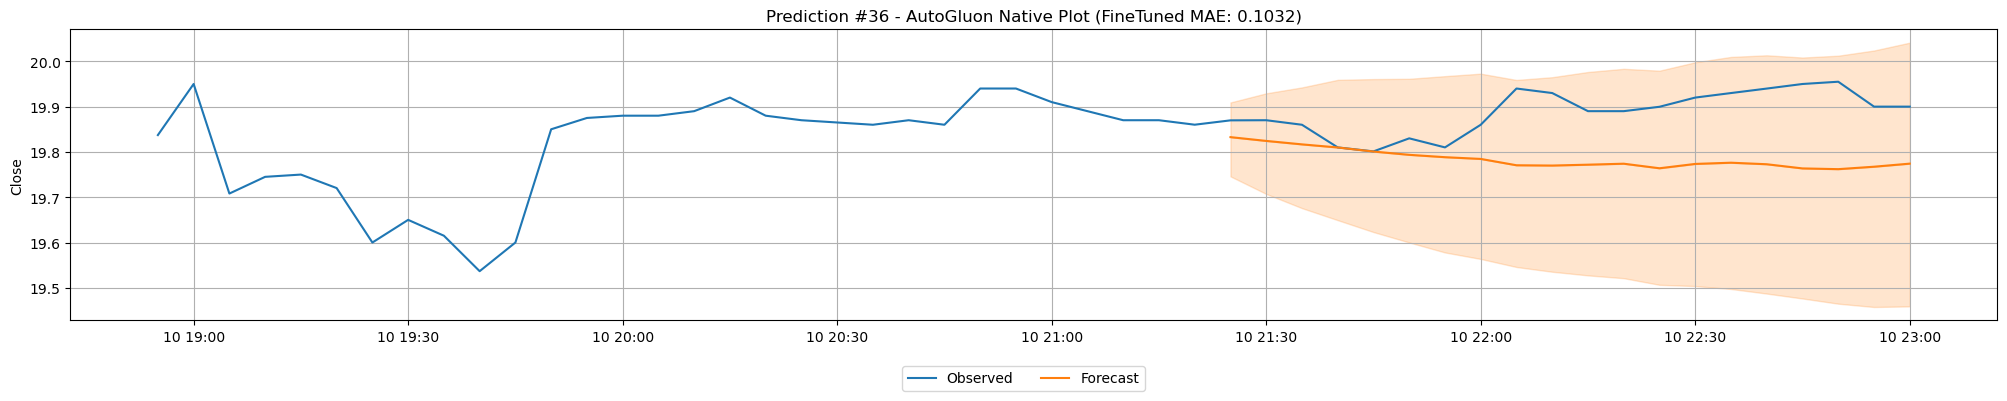

   📊 Custom comparison plot for prediction #36...


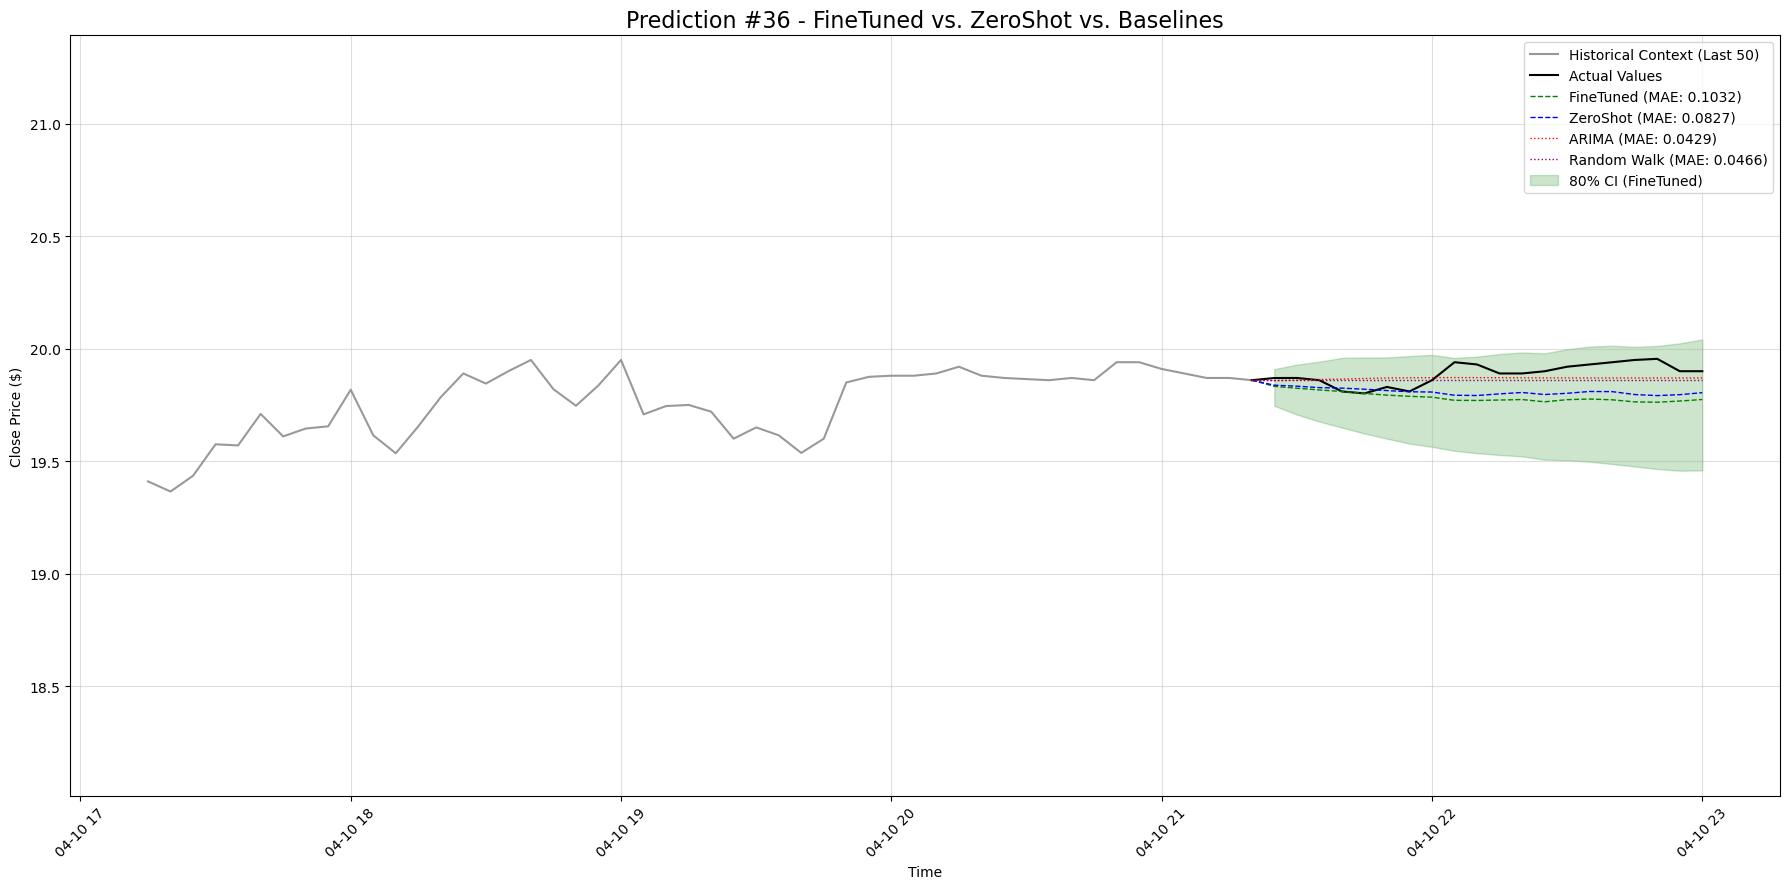

 ✅ FineTuned - MAE: 0.1032, RMSE: 0.1207
 ✅ ZeroShot  - MAE: 0.0827, RMSE: 0.0974
 ✅ ARIMA     - MAE: 0.0429, RMSE: 0.0496
 ✅ Random W. - MAE: 0.0466, RMSE: 0.0545
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_36_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_36_data.csv

🔍 Making prediction #37 for window ending at 5430
   🎯 AutoGluon native plot for prediction #37...
   🎯 AutoGluon native plot for prediction #37...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


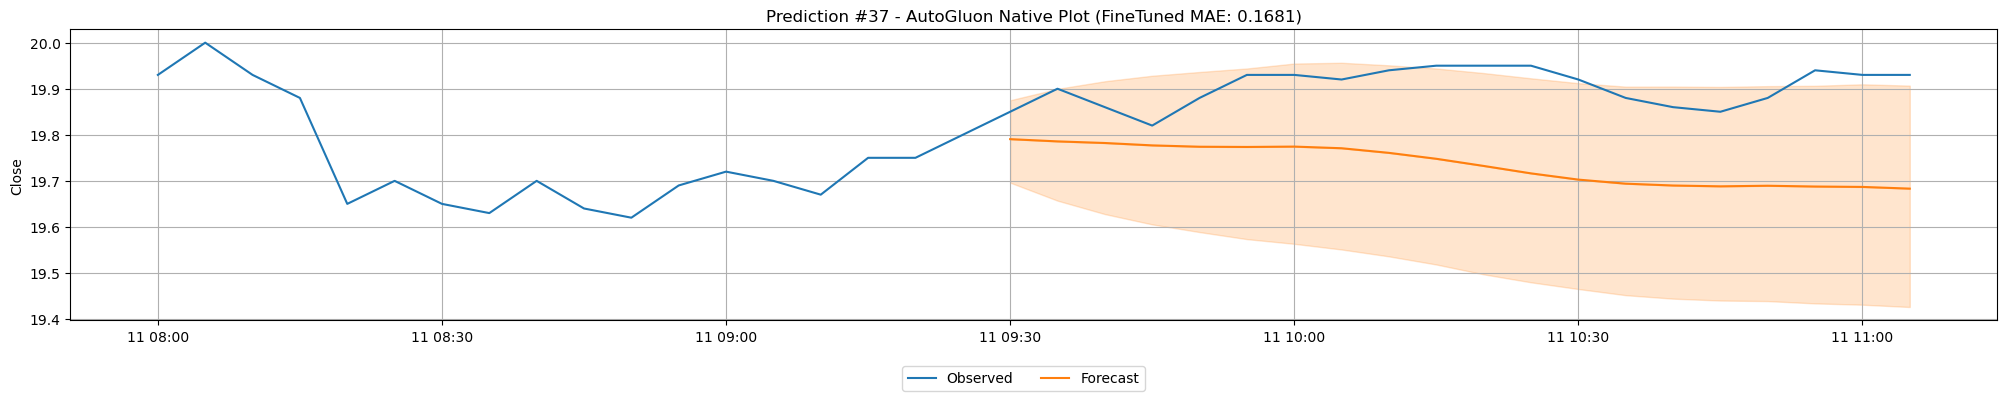

   📊 Custom comparison plot for prediction #37...


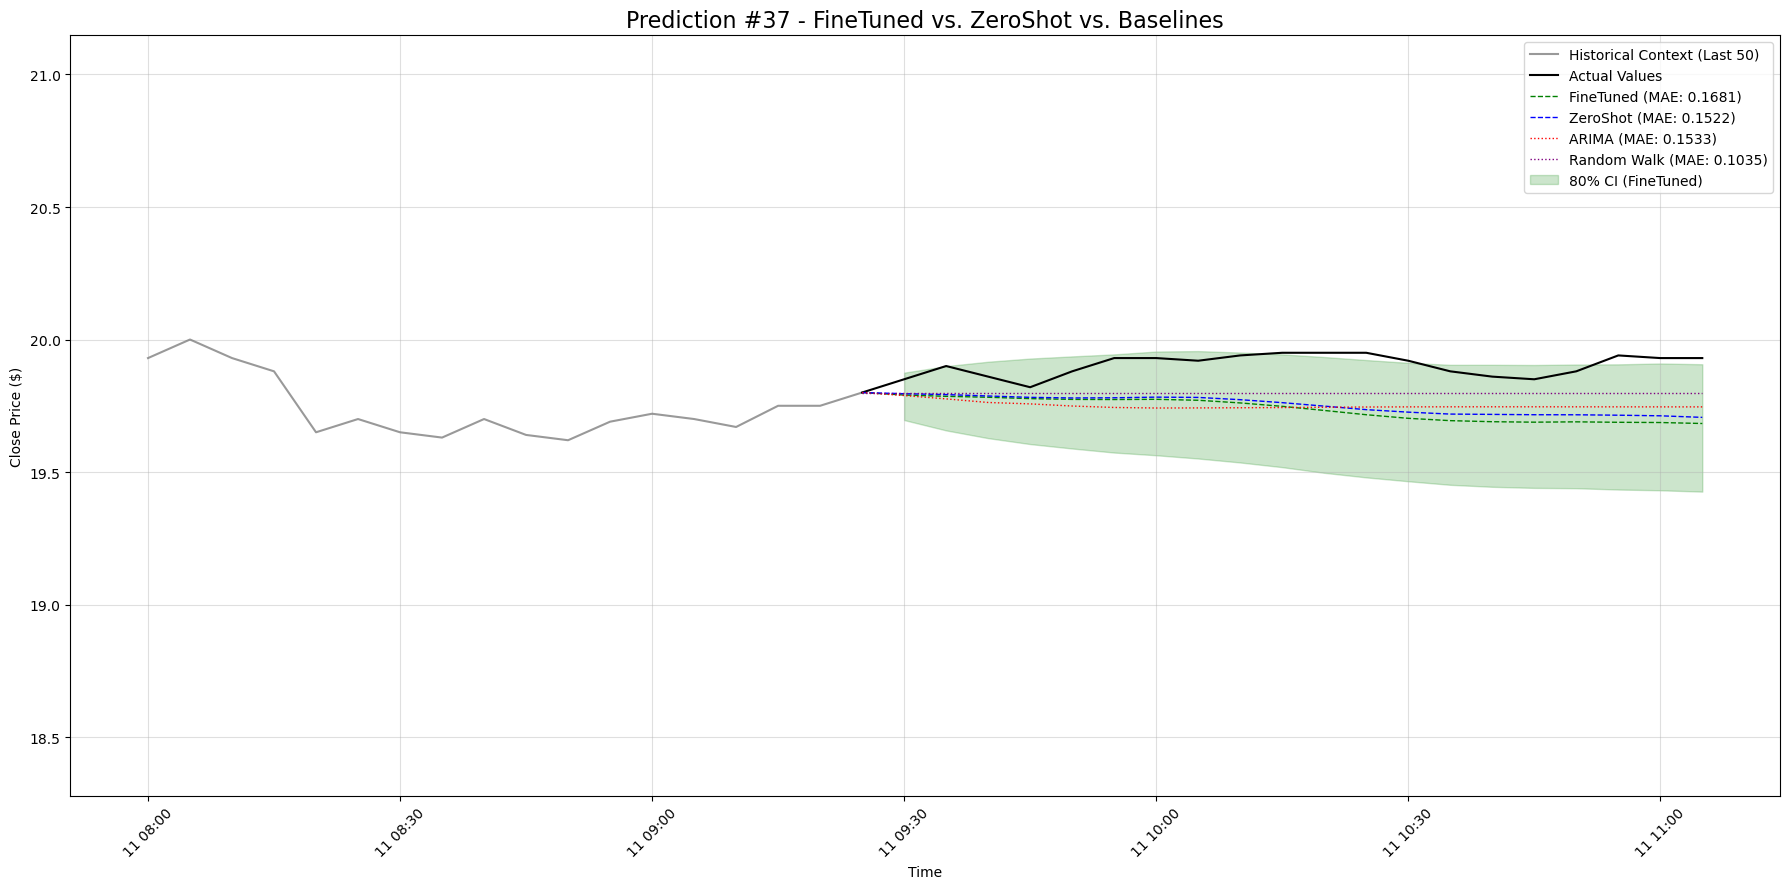

 ✅ FineTuned - MAE: 0.1681, RMSE: 0.1787
 ✅ ZeroShot  - MAE: 0.1522, RMSE: 0.1615
 ✅ ARIMA     - MAE: 0.1533, RMSE: 0.1602
 ✅ Random W. - MAE: 0.1035, RMSE: 0.1107
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_37_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_37_data.csv

🔍 Making prediction #38 for window ending at 5575
   🎯 AutoGluon native plot for prediction #38...
   🎯 AutoGluon native plot for prediction #38...


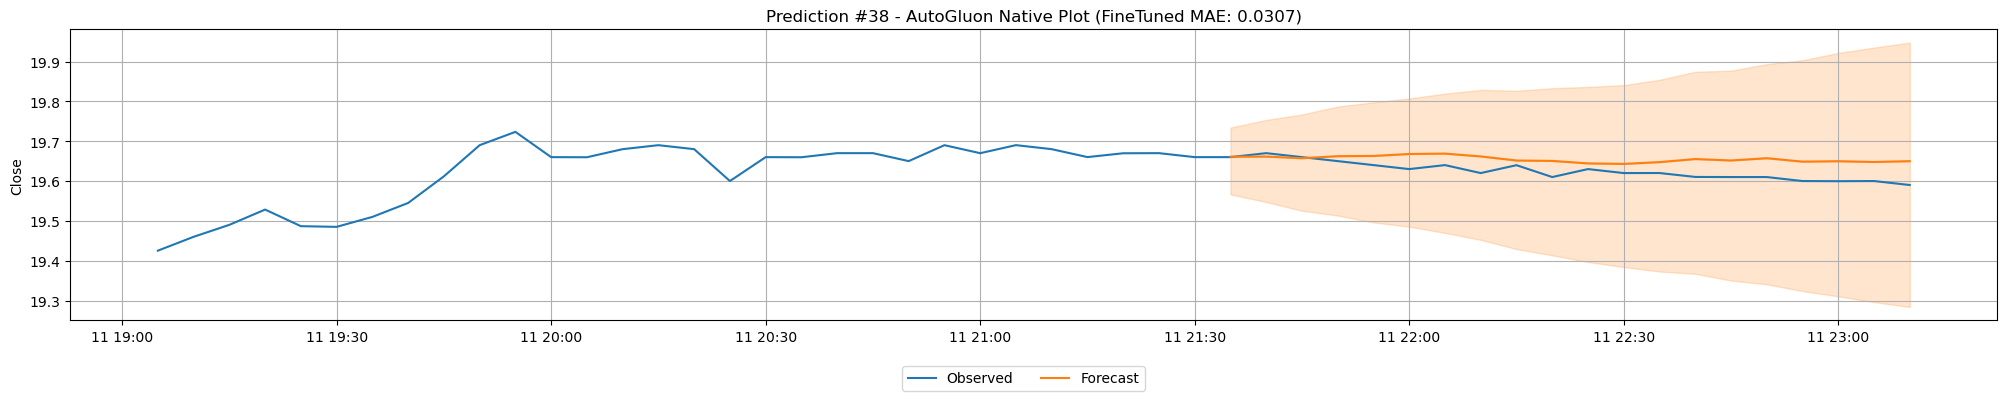

   📊 Custom comparison plot for prediction #38...


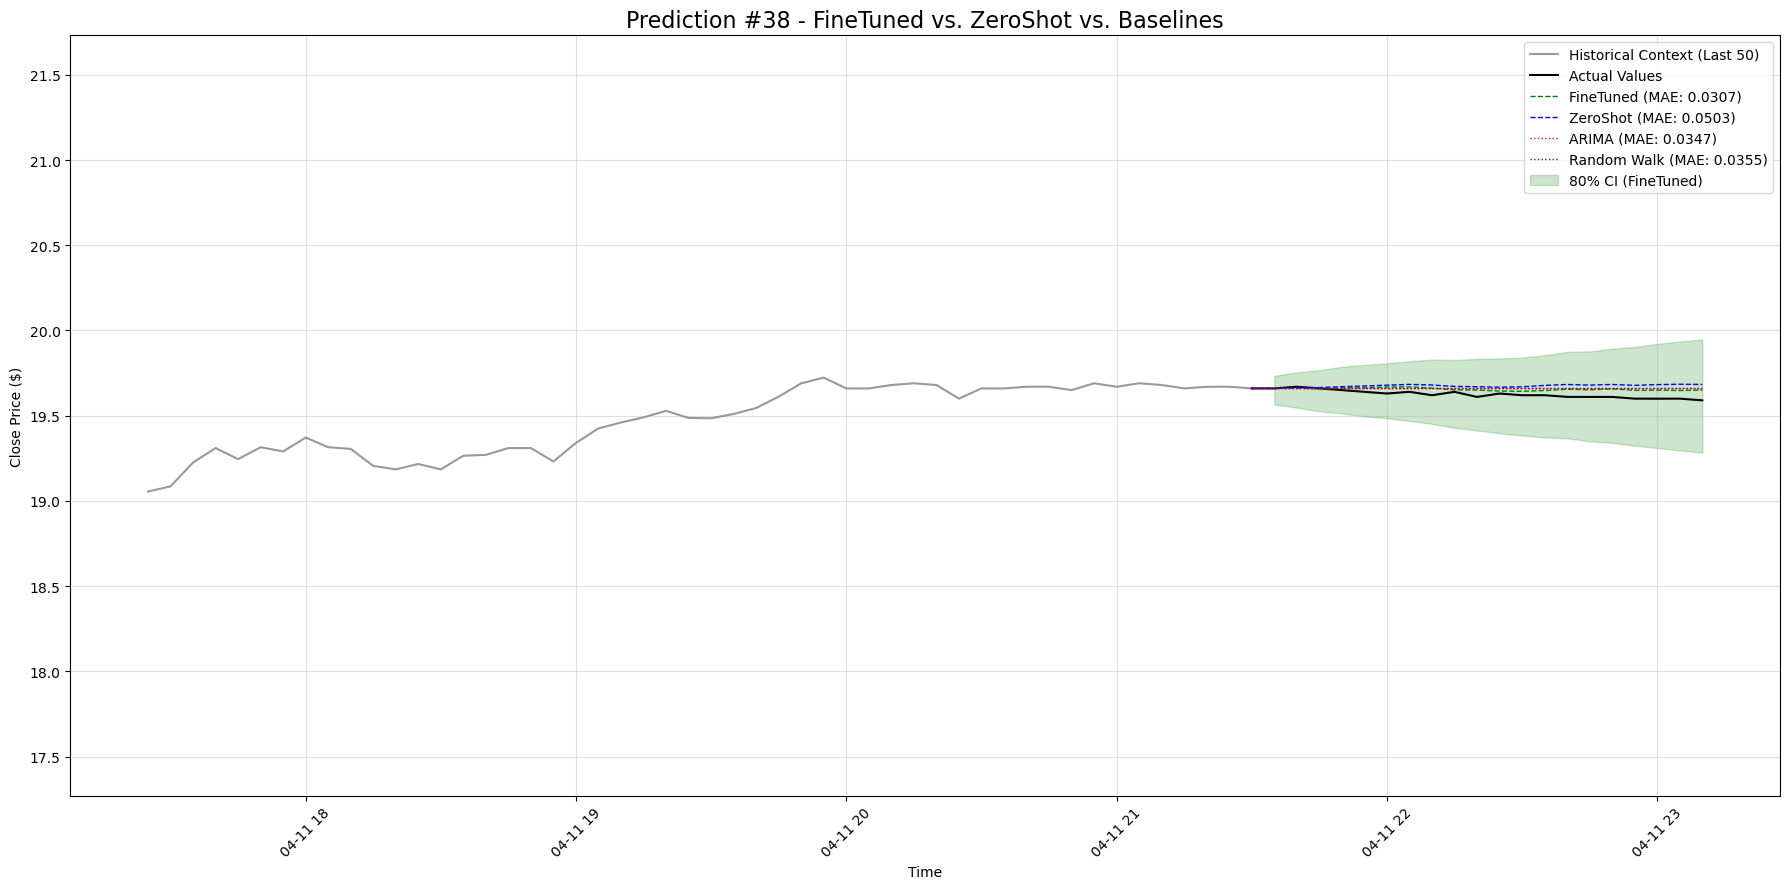

 ✅ FineTuned - MAE: 0.0307, RMSE: 0.0352
 ✅ ZeroShot  - MAE: 0.0503, RMSE: 0.0572
 ✅ ARIMA     - MAE: 0.0347, RMSE: 0.0401
 ✅ Random W. - MAE: 0.0355, RMSE: 0.0411
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_38_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_38_data.csv

🔍 Making prediction #39 for window ending at 5719

🔍 Making prediction #40 for window ending at 5864

🔍 Making prediction #40 for window ending at 5864

🔍 Making prediction #41 for window ending at 6009

🔍 Making prediction #41 for window ending at 6009

🔍 Making prediction #42 for window ending at 6154

🔍 Making prediction #42 for window ending at 6154

🔍 Making prediction #43 for window ending at 6298

🔍 Making prediction #43 for window ending at 6298
   🎯 AutoGluon native plot for prediction #43...
   🎯 AutoGluon native plot for prediction #43...


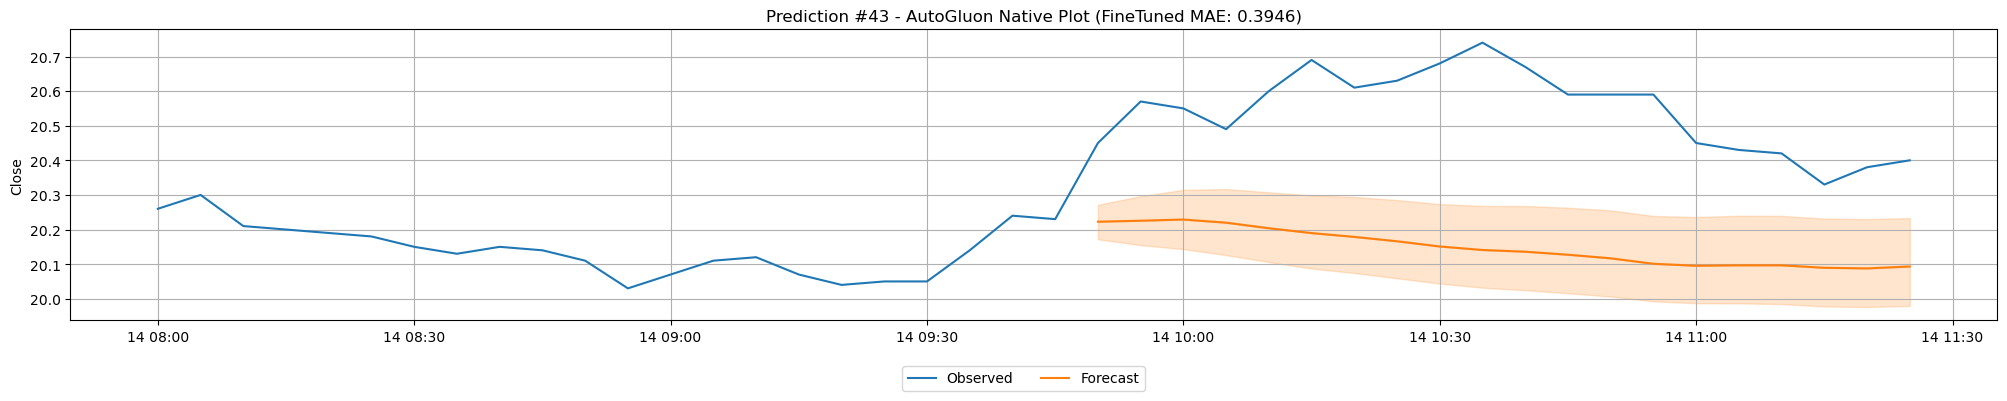

   📊 Custom comparison plot for prediction #43...


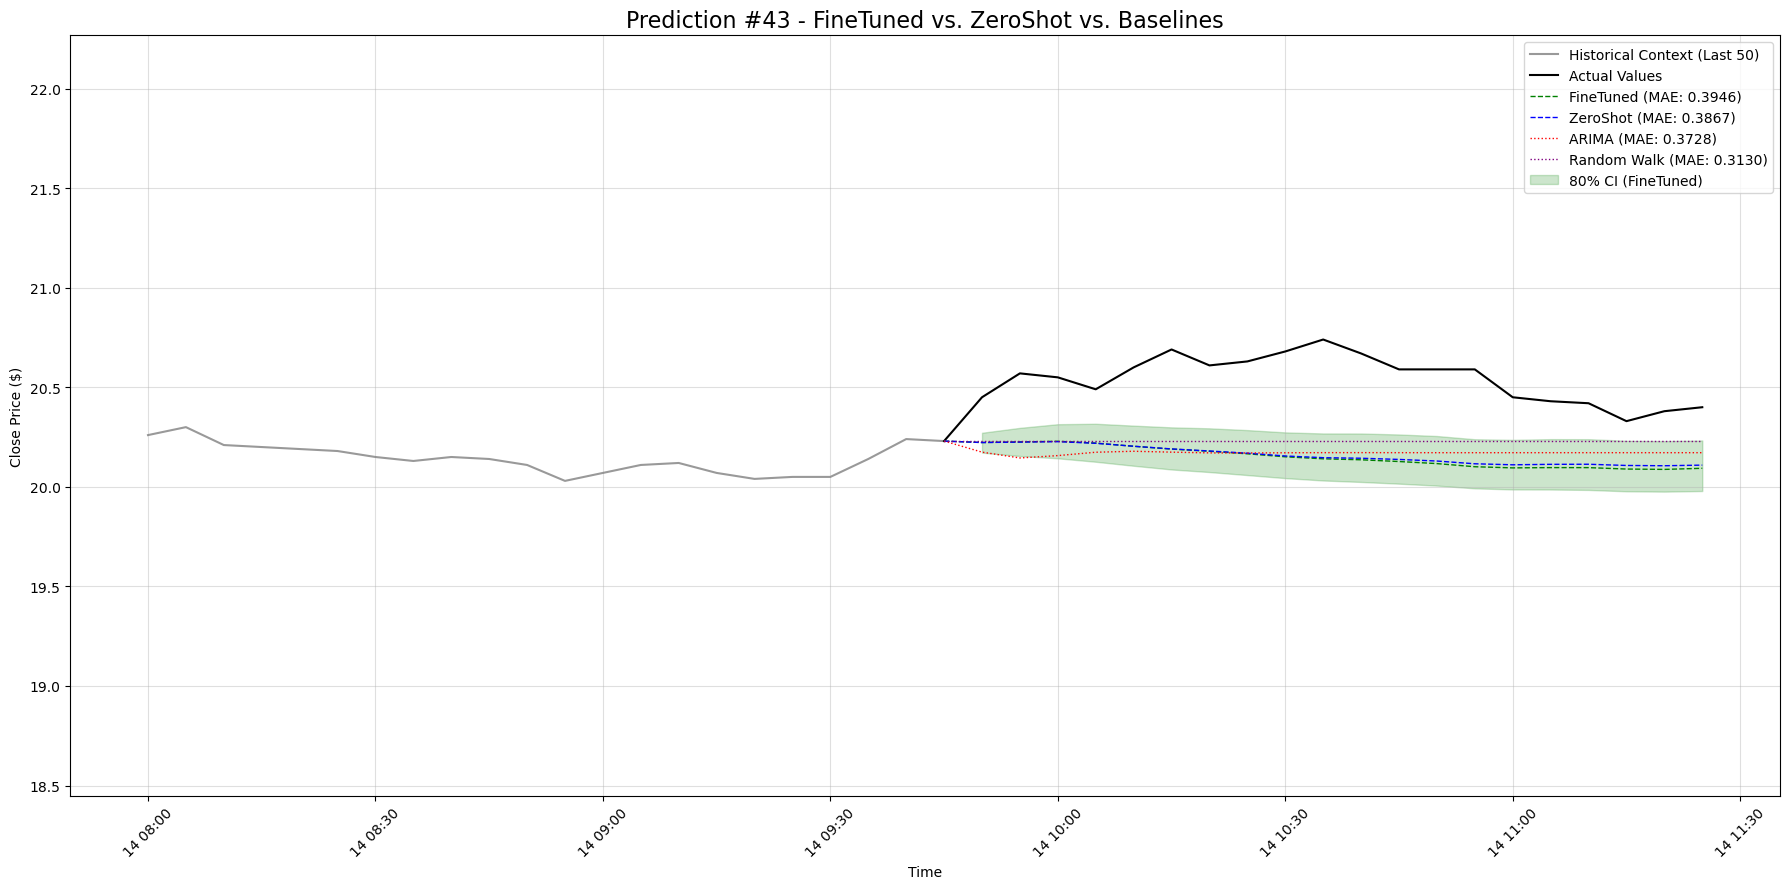

 ✅ FineTuned - MAE: 0.3946, RMSE: 0.4083
 ✅ ZeroShot  - MAE: 0.3867, RMSE: 0.4010
 ✅ ARIMA     - MAE: 0.3728, RMSE: 0.3899
 ✅ Random W. - MAE: 0.3130, RMSE: 0.3330
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_43_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_43_data.csv

🔍 Making prediction #44 for window ending at 6443
   🎯 AutoGluon native plot for prediction #44...
   🎯 AutoGluon native plot for prediction #44...


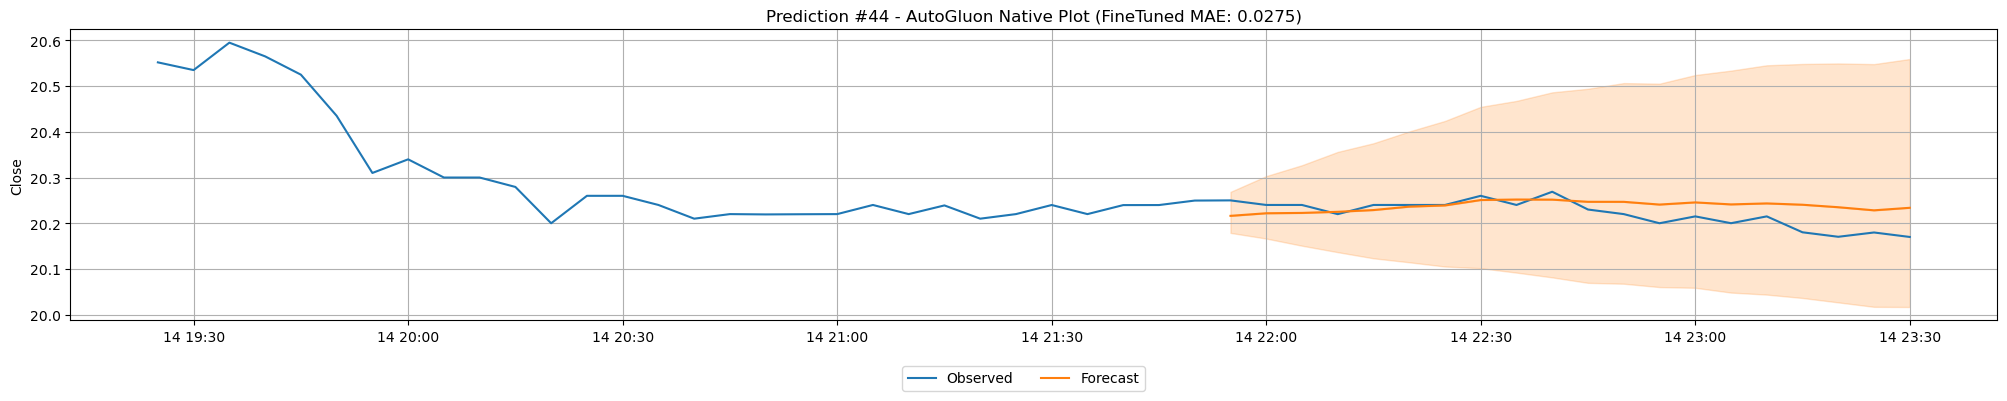

   📊 Custom comparison plot for prediction #44...


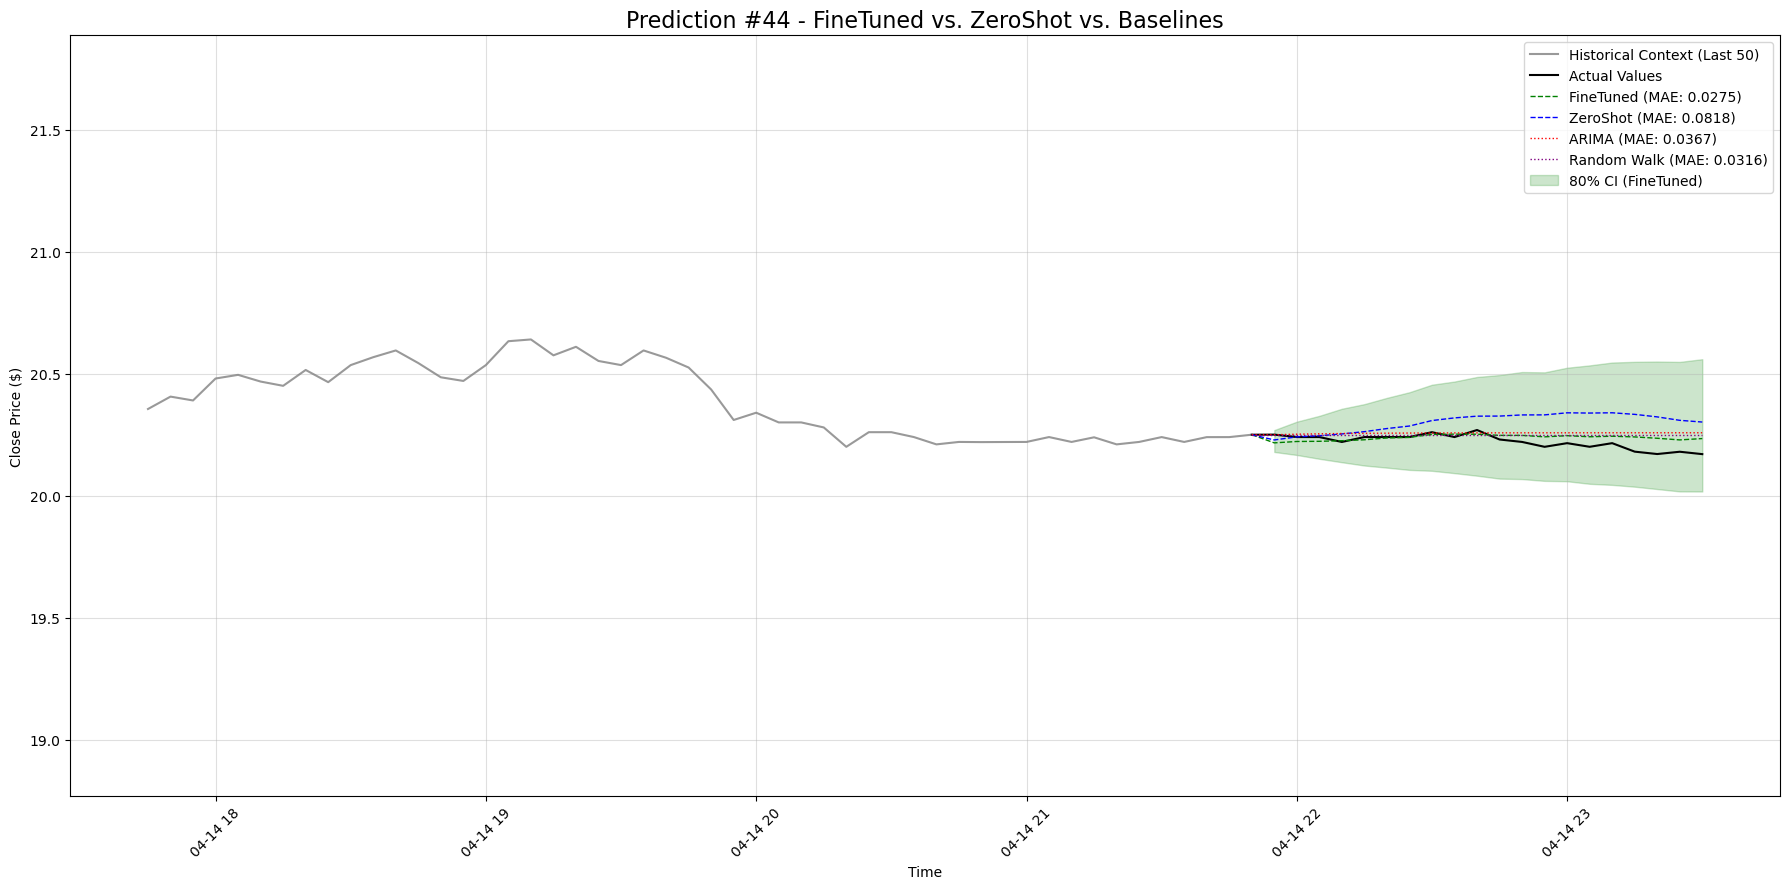

 ✅ FineTuned - MAE: 0.0275, RMSE: 0.0338
 ✅ ZeroShot  - MAE: 0.0818, RMSE: 0.0965
 ✅ ARIMA     - MAE: 0.0367, RMSE: 0.0460
 ✅ Random W. - MAE: 0.0316, RMSE: 0.0405
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_44_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_44_data.csv

🔍 Making prediction #45 for window ending at 6588
   🎯 AutoGluon native plot for prediction #45...
   🎯 AutoGluon native plot for prediction #45...


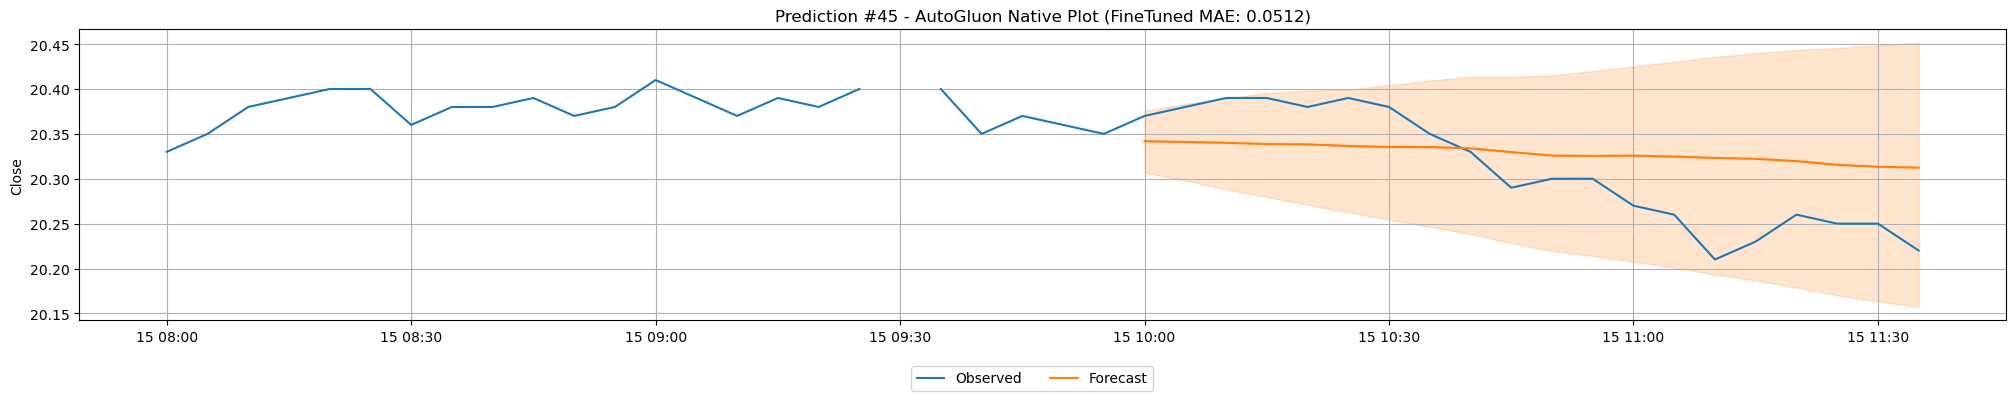

   📊 Custom comparison plot for prediction #45...


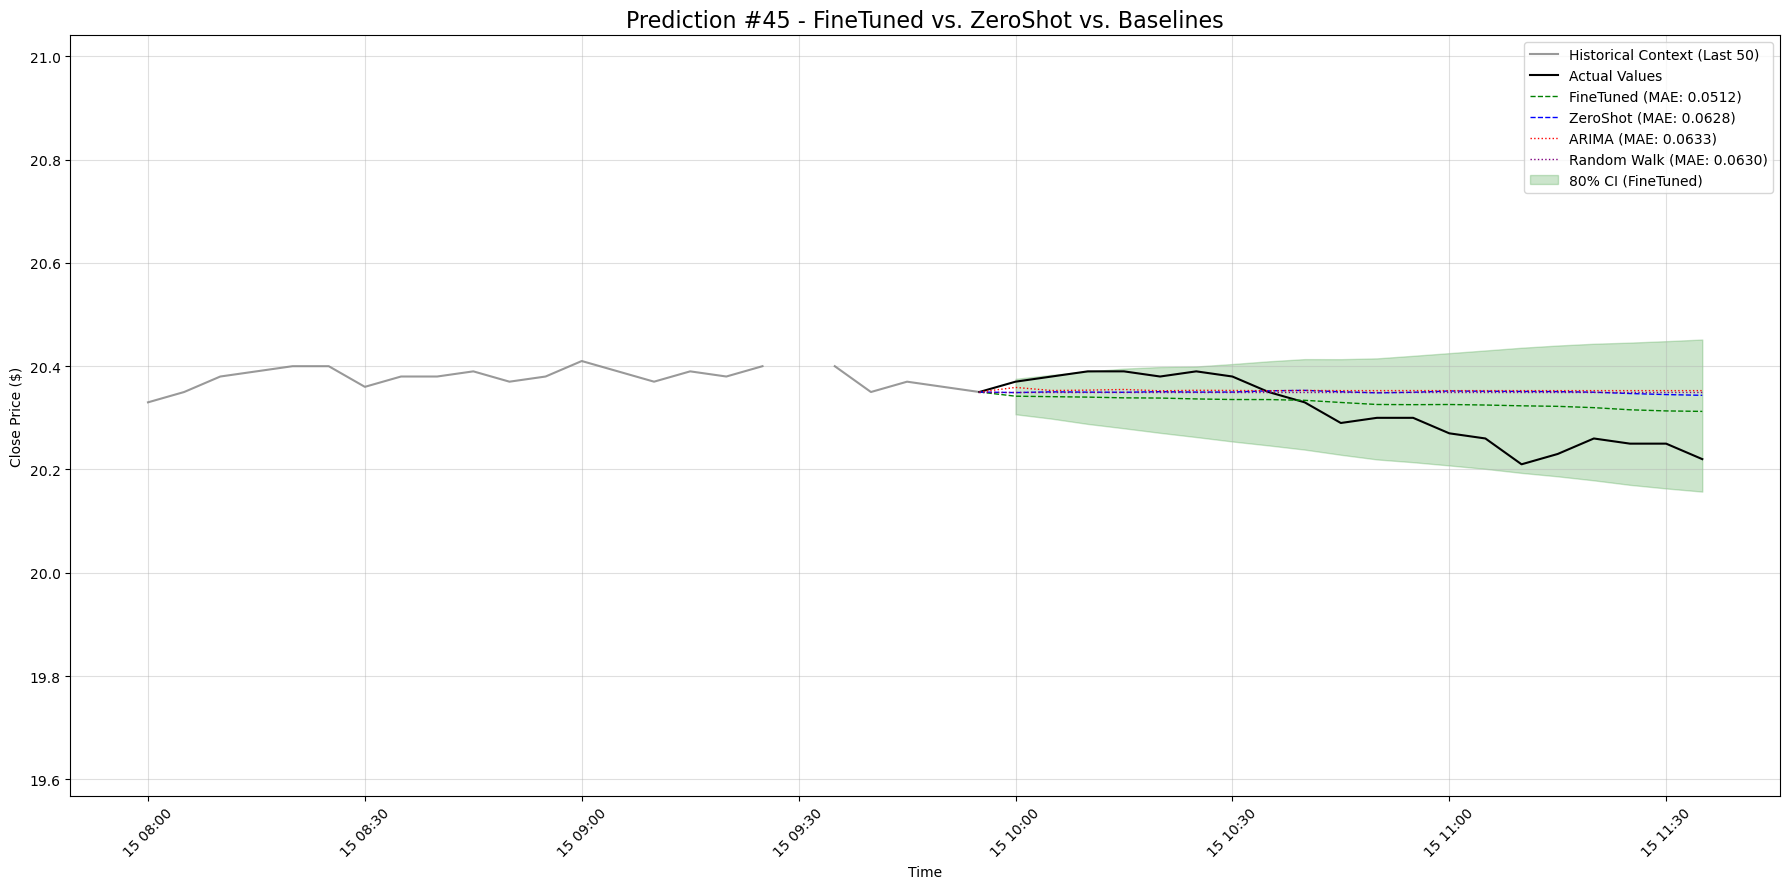

 ✅ FineTuned - MAE: 0.0512, RMSE: 0.0575
 ✅ ZeroShot  - MAE: 0.0628, RMSE: 0.0736
 ✅ ARIMA     - MAE: 0.0633, RMSE: 0.0756
 ✅ Random W. - MAE: 0.0630, RMSE: 0.0743
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_45_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_45_data.csv

🔍 Making prediction #46 for window ending at 6733
   🎯 AutoGluon native plot for prediction #46...
   🎯 AutoGluon native plot for prediction #46...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


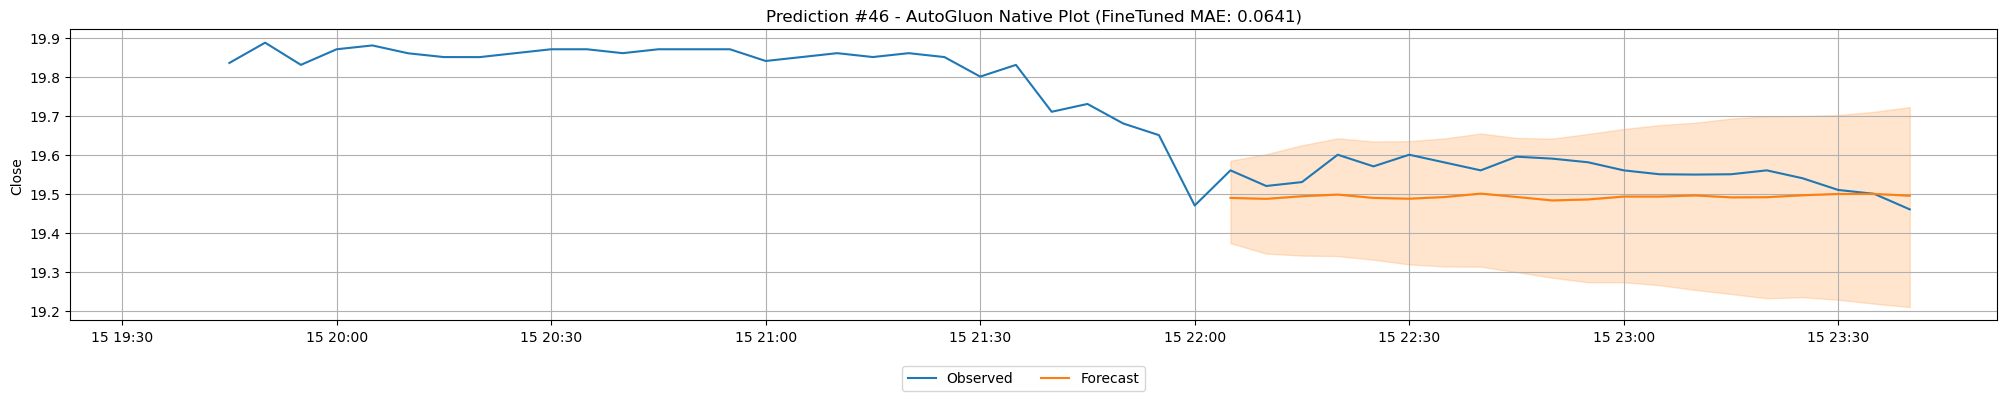

   📊 Custom comparison plot for prediction #46...


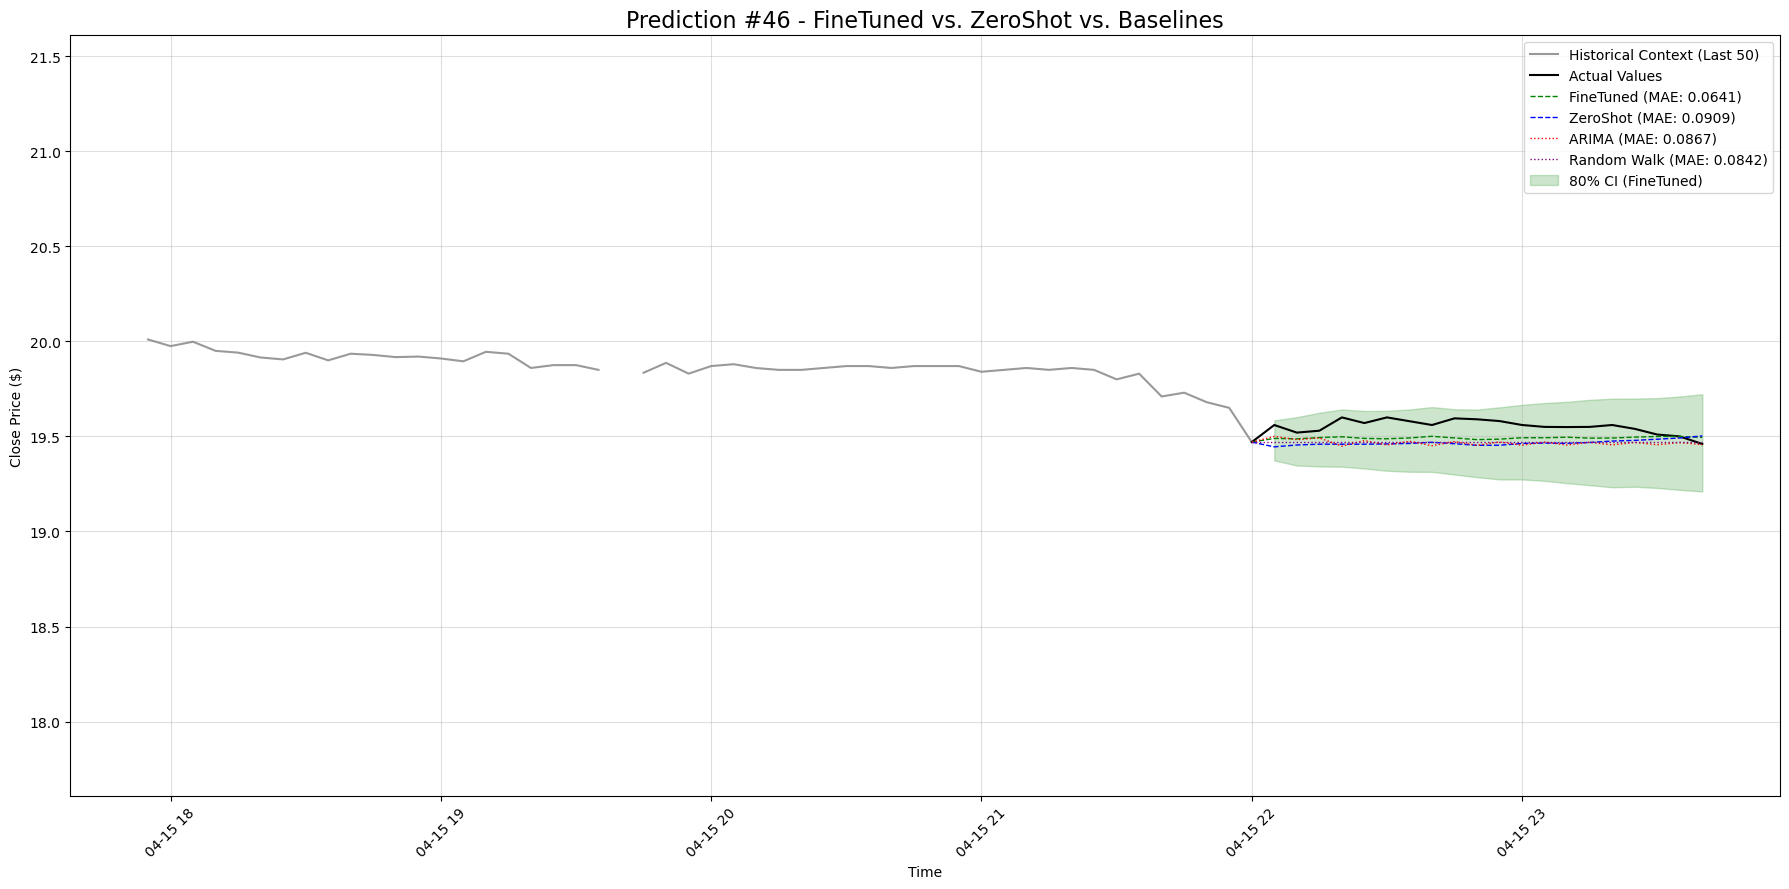

 ✅ FineTuned - MAE: 0.0641, RMSE: 0.0712
 ✅ ZeroShot  - MAE: 0.0909, RMSE: 0.0982
 ✅ ARIMA     - MAE: 0.0867, RMSE: 0.0950
 ✅ Random W. - MAE: 0.0842, RMSE: 0.0903
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_46_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_46_data.csv

🔍 Making prediction #47 for window ending at 6877
   🎯 AutoGluon native plot for prediction #47...
   🎯 AutoGluon native plot for prediction #47...


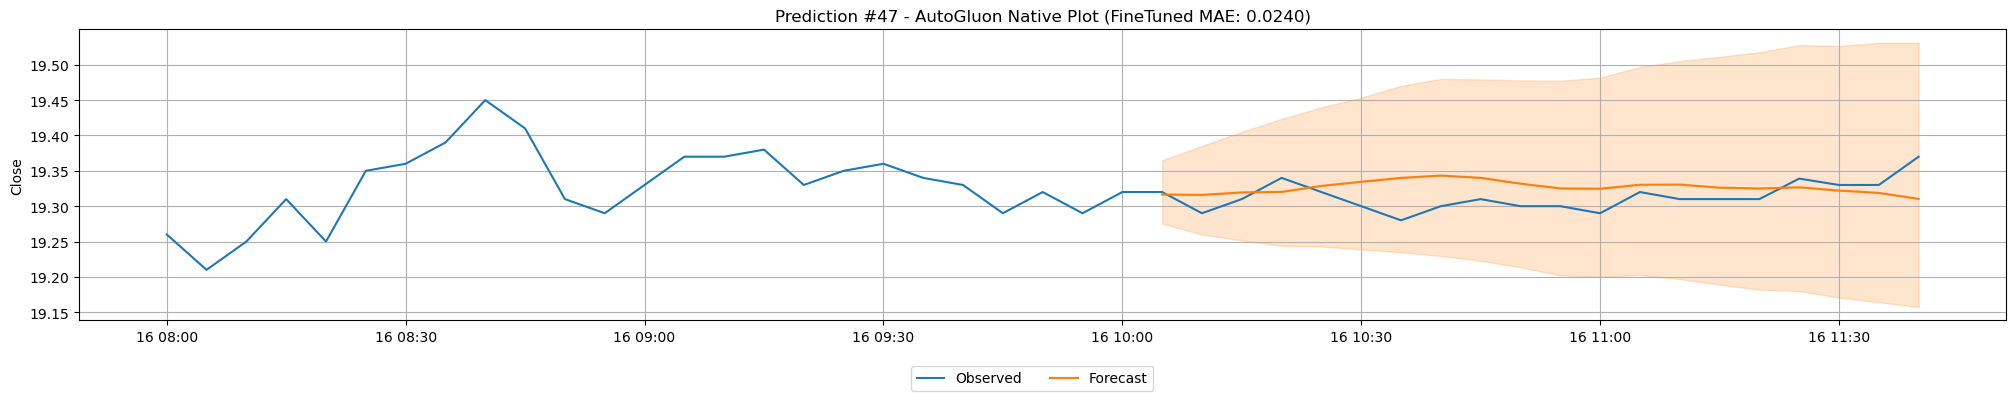

   📊 Custom comparison plot for prediction #47...


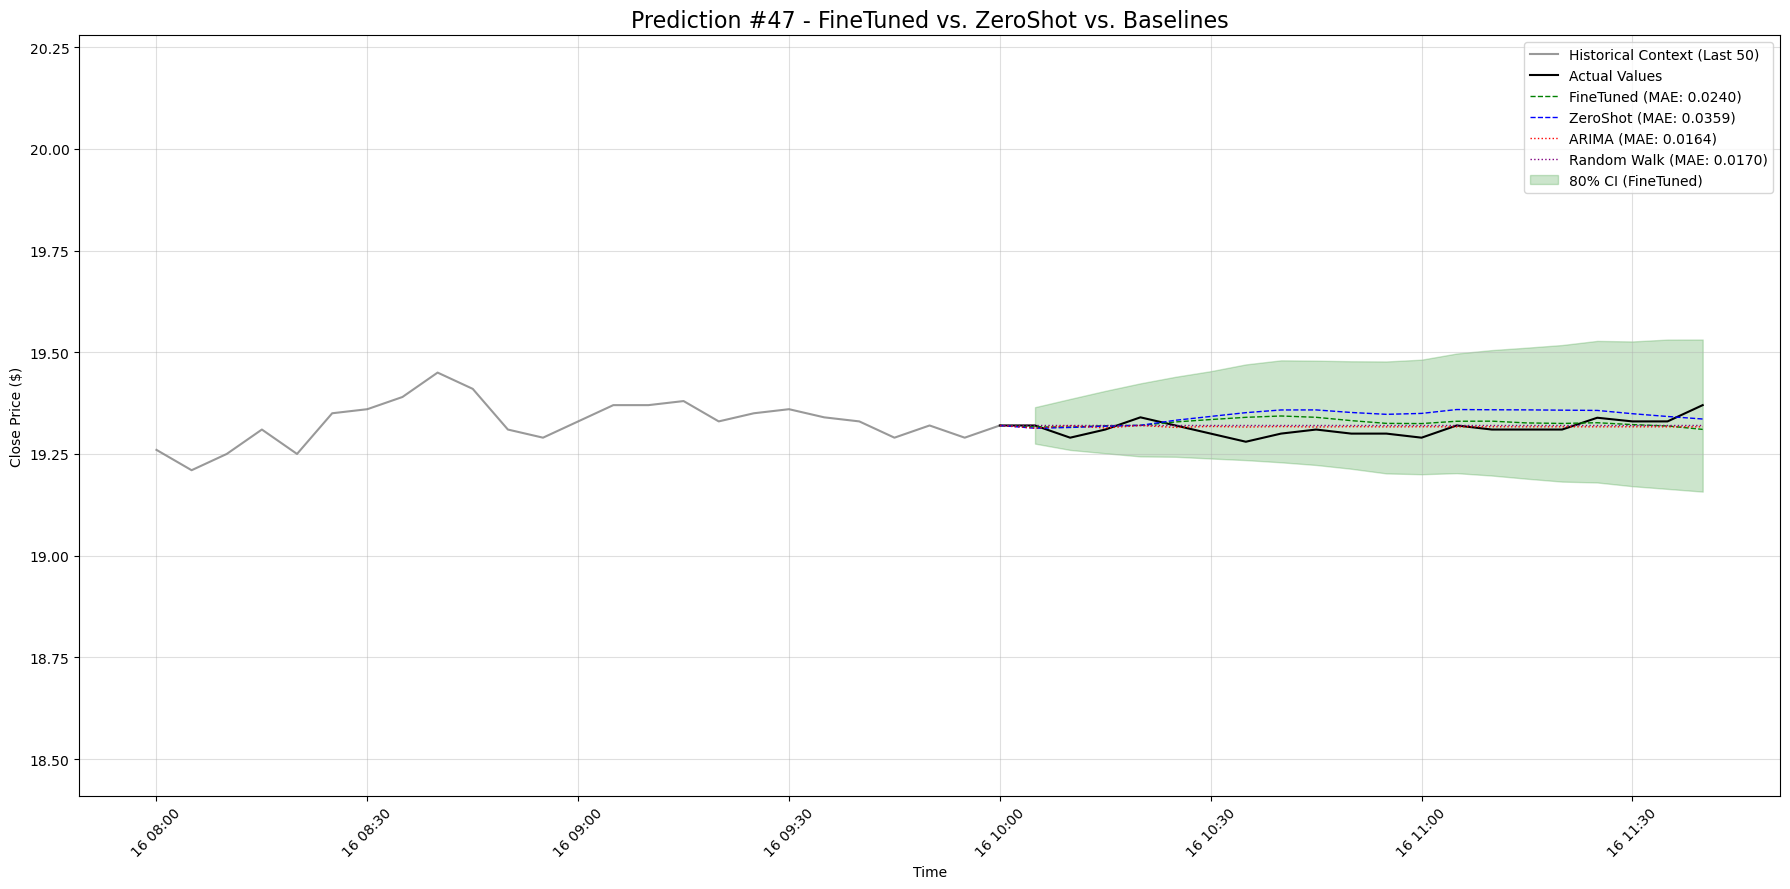

 ✅ FineTuned - MAE: 0.0240, RMSE: 0.0288
 ✅ ZeroShot  - MAE: 0.0359, RMSE: 0.0406
 ✅ ARIMA     - MAE: 0.0164, RMSE: 0.0205
 ✅ Random W. - MAE: 0.0170, RMSE: 0.0212
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_47_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_47_data.csv

🔍 Making prediction #48 for window ending at 7022
   🎯 AutoGluon native plot for prediction #48...
   🎯 AutoGluon native plot for prediction #48...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


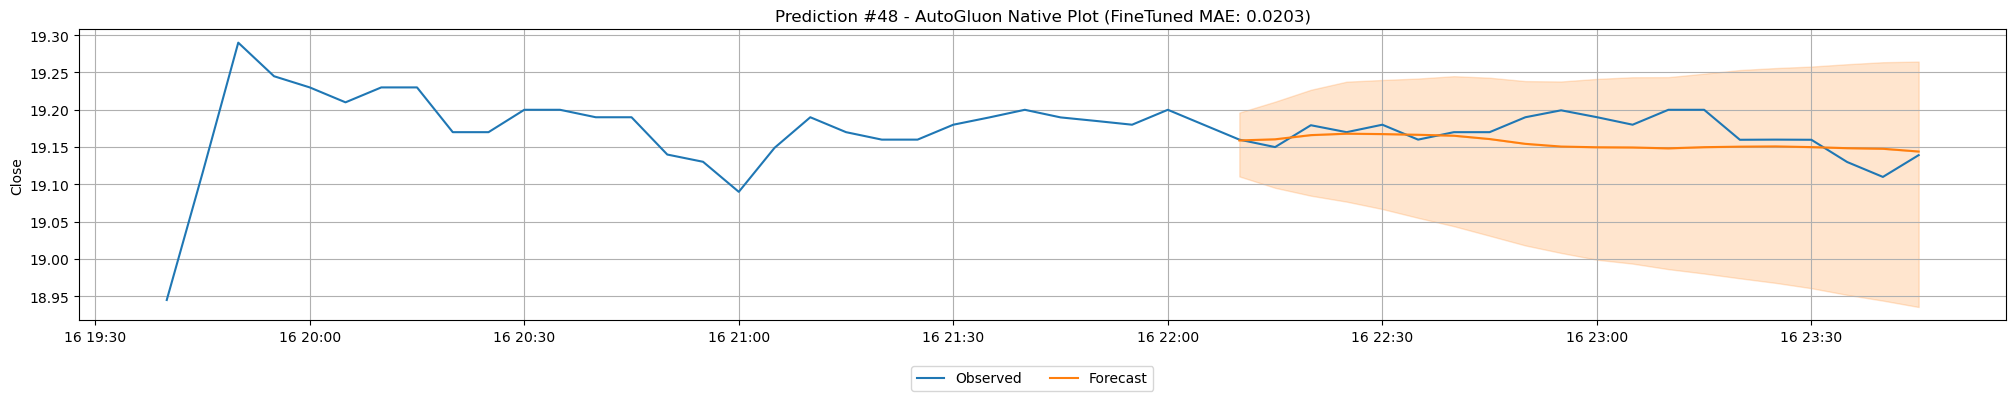

   📊 Custom comparison plot for prediction #48...


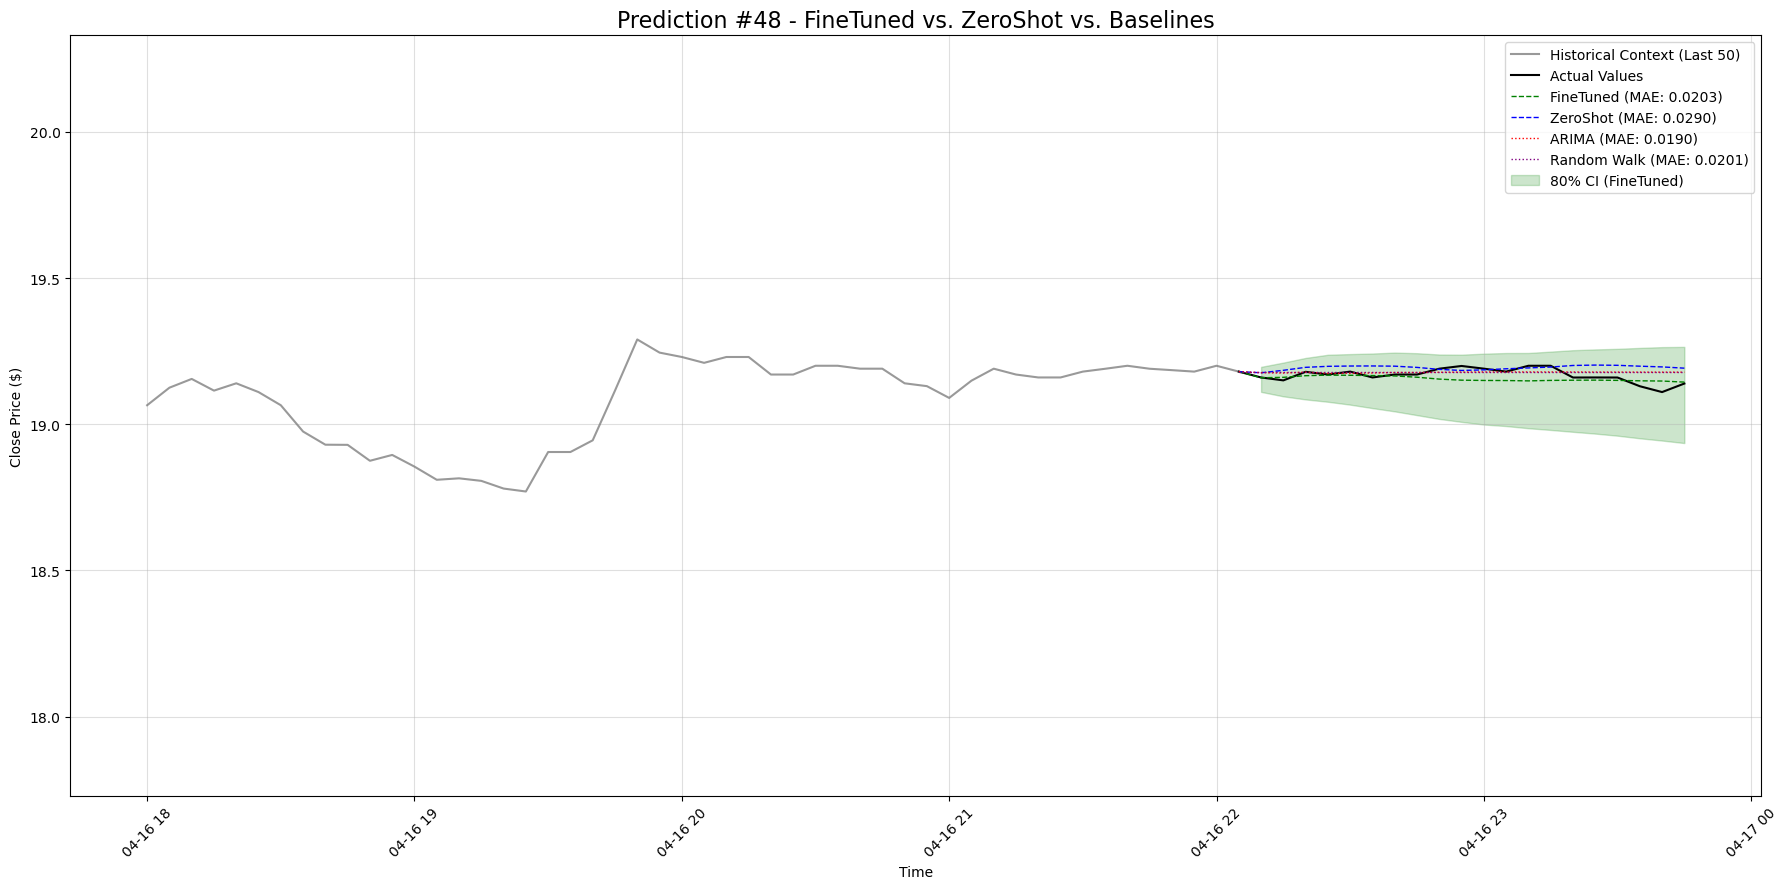

 ✅ FineTuned - MAE: 0.0203, RMSE: 0.0265
 ✅ ZeroShot  - MAE: 0.0290, RMSE: 0.0363
 ✅ ARIMA     - MAE: 0.0190, RMSE: 0.0249
 ✅ Random W. - MAE: 0.0201, RMSE: 0.0261
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_48_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_48_data.csv

🔍 Making prediction #49 for window ending at 7167
   🎯 AutoGluon native plot for prediction #49...
   🎯 AutoGluon native plot for prediction #49...


c:\Users\micha\anaconda3\envs\autogluon_ts_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


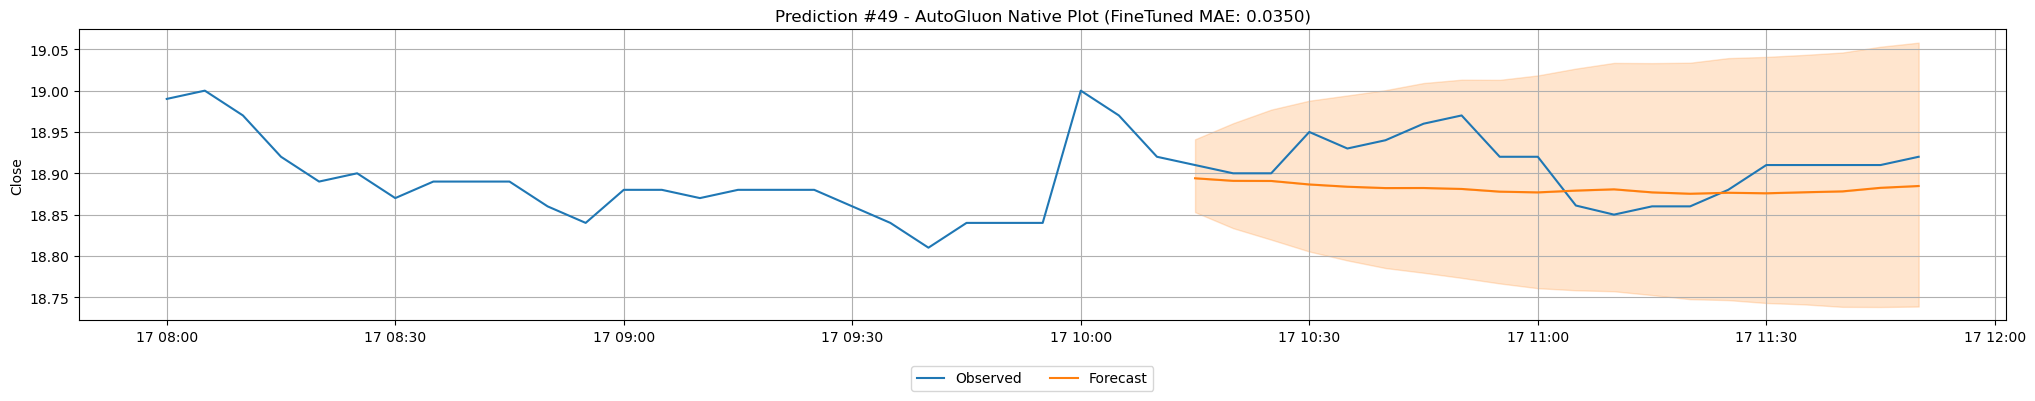

   📊 Custom comparison plot for prediction #49...


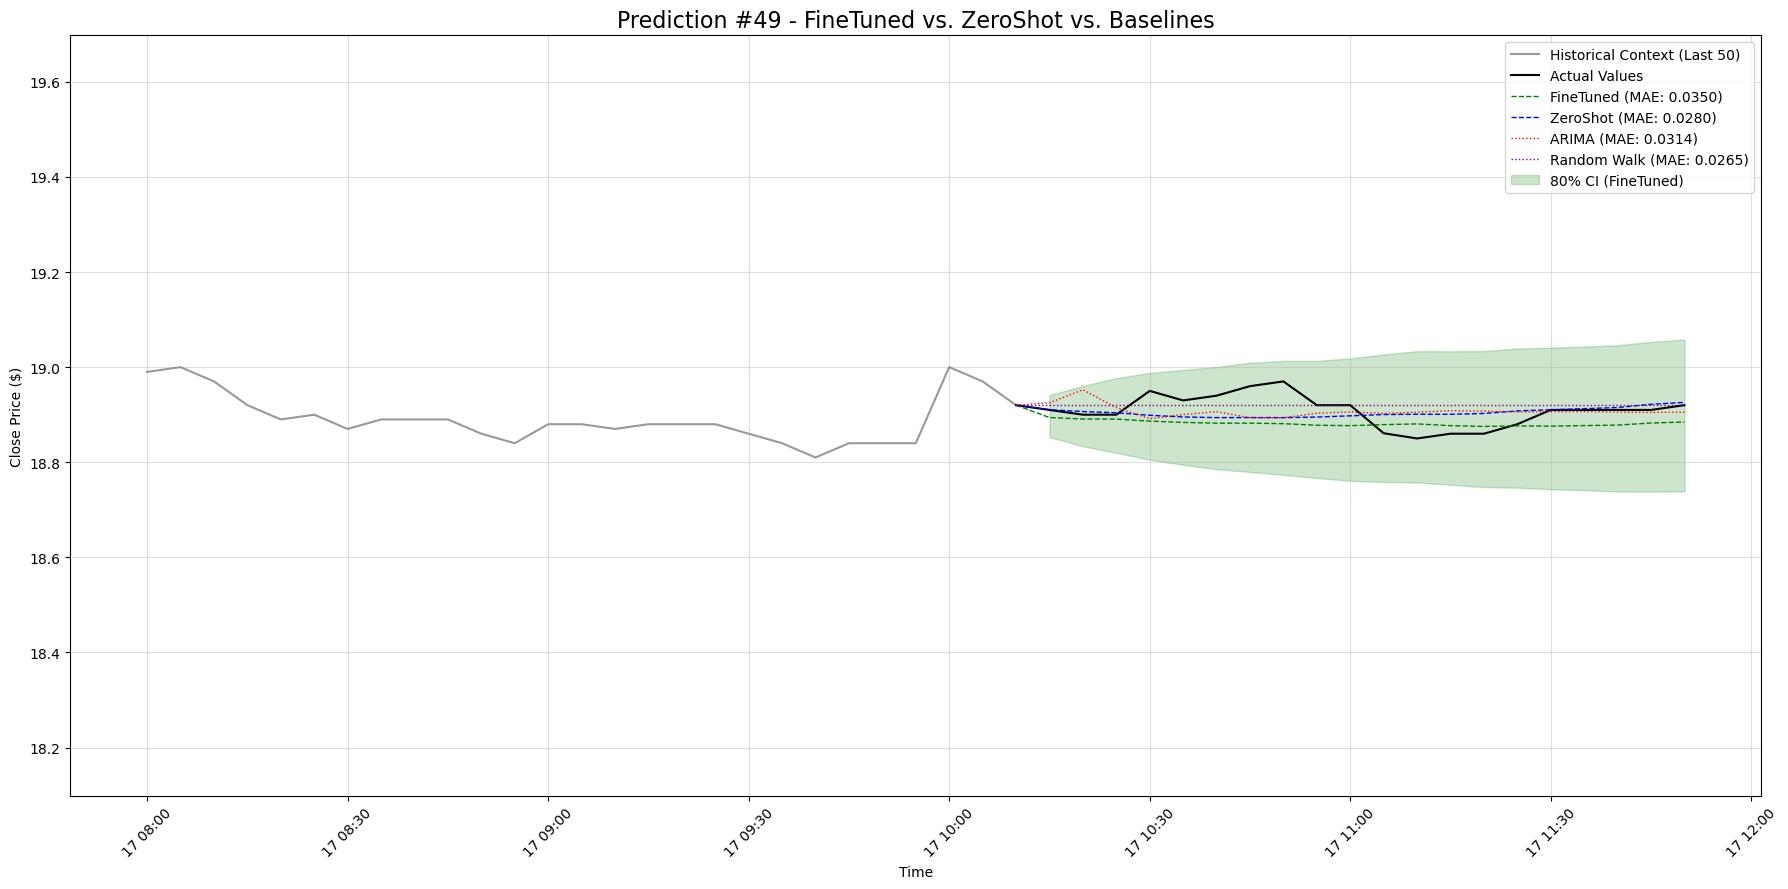

 ✅ FineTuned - MAE: 0.0350, RMSE: 0.0416
 ✅ ZeroShot  - MAE: 0.0280, RMSE: 0.0360
 ✅ ARIMA     - MAE: 0.0314, RMSE: 0.0385
 ✅ Random W. - MAE: 0.0265, RMSE: 0.0346
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_49_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_49_data.csv

🔍 Making prediction #50 for window ending at 7312
   🎯 AutoGluon native plot for prediction #50...


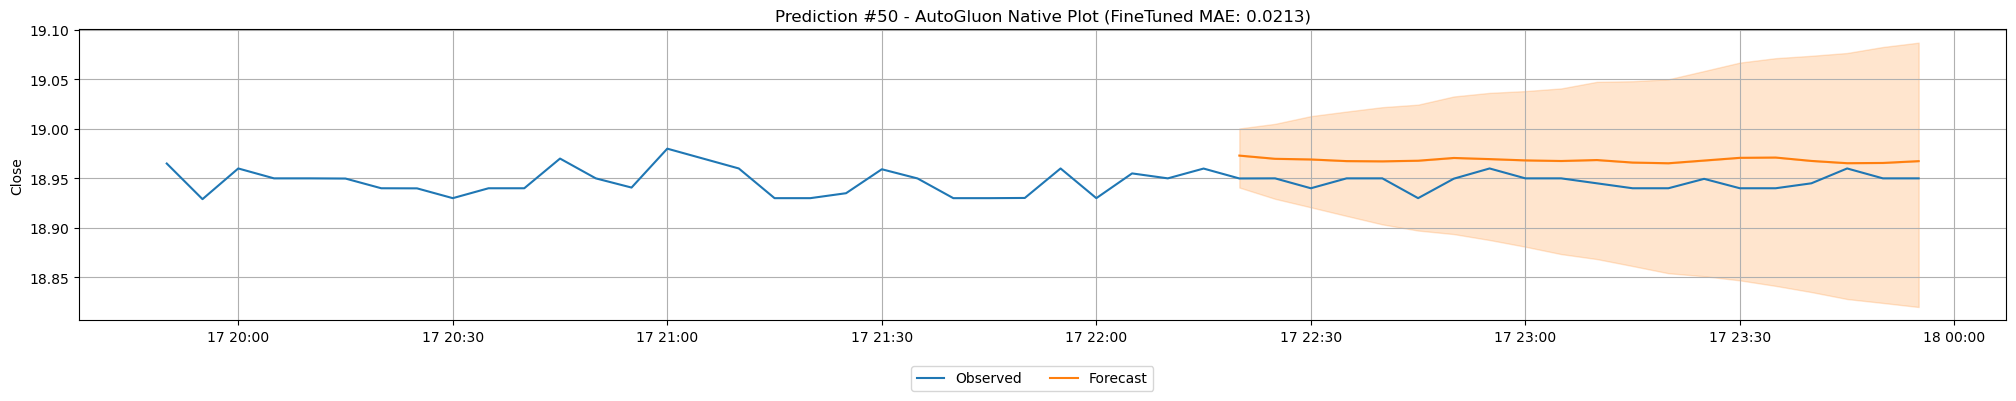

   📊 Custom comparison plot for prediction #50...


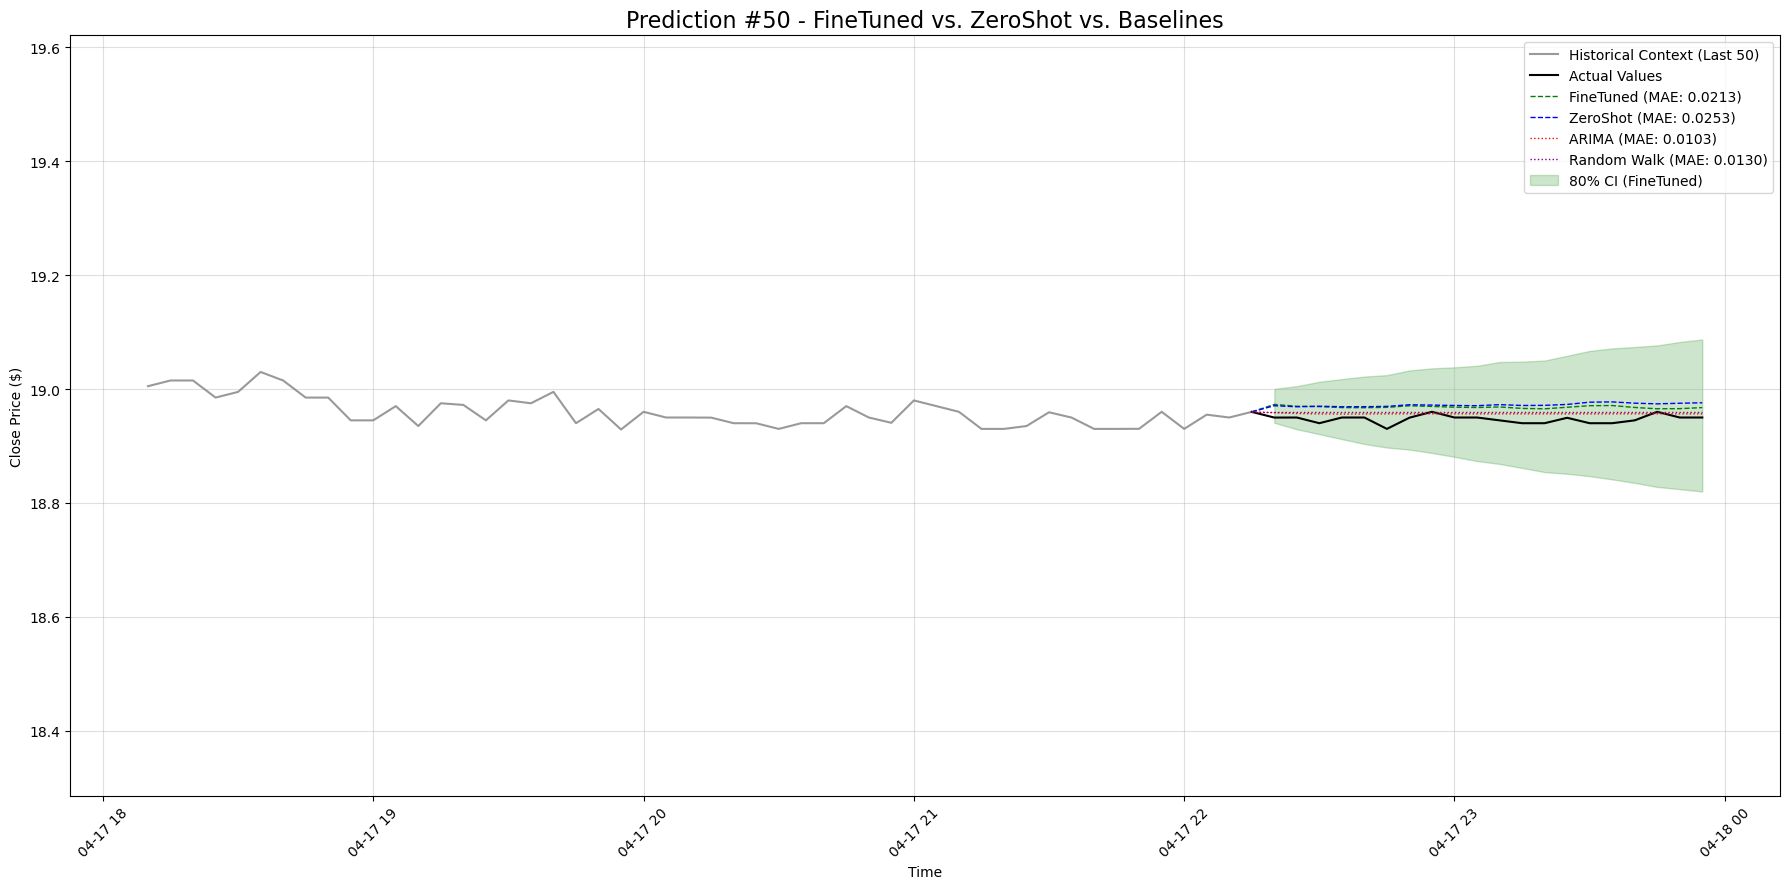

 ✅ FineTuned - MAE: 0.0213, RMSE: 0.0226
 ✅ ZeroShot  - MAE: 0.0253, RMSE: 0.0264
 ✅ ARIMA     - MAE: 0.0103, RMSE: 0.0118
 ✅ Random W. - MAE: 0.0130, RMSE: 0.0147
 💾 Saved plot: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_50_comparison_plot.png
 💾 Saved CSV:  c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC\prediction_50_data.csv


📊 Summary of Average Metrics over 38 windows:
  - FineTuned    | MAE: 0.7661, RMSE: 0.7812
  - ZeroShot     | MAE: 0.7789, RMSE: 0.7956
  - ARIMA        | MAE: nan, RMSE: nan
  - Random Walk  | MAE: nan, RMSE: nan

💾 All results saved to: c:\Users\micha\code\finance\diploma\notebooks\..\results\finetuned_vs_zeroshot_5M_INTC


In [7]:
prediction_length_test = 20
context_window = 200
num_predictions = 50
results = {}

ticker = "INTC"
results_dir = os.path.join(os.getcwd(), "..", "results", f'finetuned_vs_zeroshot_5M_{ticker}')
os.makedirs(results_dir, exist_ok=True)

total_test_length = len(test_data)
prediction_end_points = np.linspace(
    context_window + prediction_length_test,
    total_test_length,
    num_predictions,
    dtype=int
)

for i, end_point in enumerate(prediction_end_points):
    start_point = end_point - prediction_length_test
    context_start = start_point - context_window

    if context_start < 0:
        continue
        
    print(f"\n🔍 Making prediction #{i+1} for window ending at {end_point}")
    
    context_data = test_data.iloc[context_start:start_point]
    actual_data = test_data.iloc[start_point:end_point]

    # Generate predictions from both models
    predictions_zeroshot = predictor.predict(context_data, model="ChronosZeroShot[bolt_small]").head(prediction_length_test)
    predictions_finetuned = predictor.predict(context_data, model="ChronosFineTuned[bolt_small]").head(prediction_length_test)
    
    actual_series = actual_data["Close"].dropna()
    
    if not actual_series.empty:
        actual_vals = actual_series.values
        test_timestamps = actual_series.index
        plot_timestamps = test_timestamps.get_level_values('timestamp')

        # Extract predictions
        pred_zs = predictions_zeroshot.loc[test_timestamps]["mean"].values
        pred_ft = predictions_finetuned.loc[test_timestamps]["mean"].values

        # Calculate metrics for Chronos models
        mae_zs = mean_absolute_error(actual_vals, pred_zs)
        rmse_zs = np.sqrt(mean_squared_error(actual_vals, pred_zs))
        mae_ft = mean_absolute_error(actual_vals, pred_ft)
        rmse_ft = np.sqrt(mean_squared_error(actual_vals, pred_ft))

        # Generate and evaluate baseline models
        try:
            context_values = context_data['Close'].dropna().values
            arima_model = ARIMA(context_values, order=(5,1,1)).fit()
            arima_forecast = arima_model.forecast(steps=len(actual_vals))
            random_walk_forecast = np.full(shape=len(actual_vals), fill_value=context_values[-1])
            mae_arima = mean_absolute_error(actual_vals, arima_forecast)
            rmse_arima = np.sqrt(mean_squared_error(actual_vals, arima_forecast))
            mae_rw = mean_absolute_error(actual_vals, random_walk_forecast)
            rmse_rw = np.sqrt(mean_squared_error(actual_vals, random_walk_forecast))
        except Exception as e:
            print(f"   ⚠️ Error generating baselines: {e}")
            arima_forecast, random_walk_forecast = (np.full(len(actual_vals), np.nan),)*2
            mae_arima, rmse_arima, mae_rw, rmse_rw = (np.nan,)*4

        # --- AutoGluon Native Plot (for FineTuned model) ---
        print(f"   🎯 AutoGluon native plot for prediction #{i+1}...")
        try:
            predictor.plot(
                data=test_data.iloc[context_start:end_point],
                predictions=predictions_finetuned,
                item_ids=[ticker],
                max_history_length=context_window // 4,
            )
            plt.title(f'Prediction #{i+1} - AutoGluon Native Plot (FineTuned MAE: {mae_ft:.4f})')
            plt.show()
        except Exception as e:
            print(f"   ⚠️ AutoGluon native plot failed: {e}")

        # --- Comprehensive Comparison Plot ---
        print(f"   📊 Custom comparison plot for prediction #{i+1}...")
        plt.figure(figsize=(18, 9))
        
        context_to_plot = context_data.tail(50)

        # --- Create connected data for plotting to close the gap ---
        last_context_point = context_data.iloc[-1]
        last_context_timestamp = last_context_point.name[1]
        last_context_value = last_context_point['Close']

        # Prepend the last context point to each series
        plot_timestamps_connected = pd.to_datetime([last_context_timestamp] + plot_timestamps.tolist())
        actual_vals_connected = np.insert(actual_vals, 0, last_context_value)
        pred_ft_connected = np.insert(pred_ft, 0, last_context_value)
        pred_zs_connected = np.insert(pred_zs, 0, last_context_value)
        arima_forecast_connected = np.insert(arima_forecast, 0, last_context_value)
        random_walk_forecast_connected = np.insert(random_walk_forecast, 0, last_context_value)

        # --- Y-axis scaling (zoom out) ---
        all_plot_data = np.concatenate([
            context_to_plot['Close'].values,
            actual_vals,
            pred_ft,
            pred_zs,
            arima_forecast,
            random_walk_forecast
        ])
        all_plot_data = all_plot_data[~np.isnan(all_plot_data)]
        
        y_min = all_plot_data.min()
        y_max = all_plot_data.max()
        
        try:
            lower_bound_ci = predictions_finetuned.loc[test_timestamps]['0.1'].values
            upper_bound_ci = predictions_finetuned.loc[test_timestamps]['0.9'].values
            y_min = min(y_min, np.nanmin(lower_bound_ci))
            y_max = max(y_max, np.nanmax(upper_bound_ci))
        except KeyError:
            lower_bound_ci, upper_bound_ci = None, None

        y_range = y_max - y_min
        y_buffer = y_range * 2.0 # 200% buffer for more zoom out
        plt.ylim(y_min - y_buffer, y_max + y_buffer)
        
        # Historical Context
        plt.plot(context_to_plot.index.get_level_values('timestamp'), context_to_plot['Close'], label='Historical Context (Last 50)', color='gray', alpha=0.8)
        
        # Actual Values (thinner line)
        plt.plot(plot_timestamps_connected, actual_vals_connected, label='Actual Values', color='black', linewidth=1.5)
        
        # Predictions (thinner lines, no markers, connected)
        plt.plot(plot_timestamps_connected, pred_ft_connected, label=f'FineTuned (MAE: {mae_ft:.4f})', linestyle='--', linewidth=1.0, color='green')
        plt.plot(plot_timestamps_connected, pred_zs_connected, label=f'ZeroShot (MAE: {mae_zs:.4f})', linestyle='--', linewidth=1.0, color='blue')
        plt.plot(plot_timestamps_connected, arima_forecast_connected, label=f'ARIMA (MAE: {mae_arima:.4f})', linestyle=':', linewidth=1.0, color='red')
        plt.plot(plot_timestamps_connected, random_walk_forecast_connected, label=f'Random Walk (MAE: {mae_rw:.4f})', linestyle=':', linewidth=1.0, color='purple')

        # Confidence Interval for FineTuned model
        if lower_bound_ci is not None:
            # Note: CI is not connected, it only covers the prediction range
            plt.fill_between(plot_timestamps, lower_bound_ci, upper_bound_ci, color='green', alpha=0.2, label='80% CI (FineTuned)')
        else:
            print("   ⚠️ Could not find confidence interval columns ('0.1', '0.9') for FineTuned model.")

        plt.title(f'Prediction #{i+1} - FineTuned vs. ZeroShot vs. Baselines', fontsize=16)
        plt.xlabel("Time")
        plt.ylabel("Close Price ($)")
        plt.legend()
        plt.grid(True, alpha=0.4)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        plot_path = os.path.join(results_dir, f'prediction_{i+1}_comparison_plot.png')
        plt.savefig(plot_path, dpi=300)
        plt.show()

        # --- Save CSV Data ---
        csv_data = pd.DataFrame({
            'timestamp': plot_timestamps,
            'actual': actual_vals,
            'finetuned_pred': pred_ft,
            'zeroshot_pred': pred_zs,
            'arima_pred': arima_forecast,
            'random_walk_pred': random_walk_forecast
        })
        try:
            csv_data['finetuned_lower_ci'] = predictions_finetuned.loc[test_timestamps]['0.1'].values
            csv_data['finetuned_upper_ci'] = predictions_finetuned.loc[test_timestamps]['0.9'].values
        except KeyError:
            pass
        
        csv_path = os.path.join(results_dir, f'prediction_{i+1}_data.csv')
        csv_data.to_csv(csv_path, index=False)
        
        # --- Store and Print Metrics ---
        results[f"prediction_{i+1}"] = {
            'mae_finetuned': mae_ft, 'rmse_finetuned': rmse_ft,
            'mae_zeroshot': mae_zs, 'rmse_zeroshot': rmse_zs,
            'mae_arima': mae_arima, 'rmse_arima': rmse_arima,
            'mae_random_walk': mae_rw, 'rmse_random_walk': rmse_rw,
        }
        print(f" ✅ FineTuned - MAE: {mae_ft:.4f}, RMSE: {rmse_ft:.4f}")
        print(f" ✅ ZeroShot  - MAE: {mae_zs:.4f}, RMSE: {rmse_zs:.4f}")
        print(f" ✅ ARIMA     - MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}")
        print(f" ✅ Random W. - MAE: {mae_rw:.4f}, RMSE: {rmse_rw:.4f}")
        print(f" 💾 Saved plot: {plot_path}")
        print(f" 💾 Saved CSV:  {csv_path}")

# --- Final Summary ---
print(f"\n\n📊 Summary of Average Metrics over {len(results)} windows:")
metric_summary = {
    "FineTuned": {"MAE": np.mean([r['mae_finetuned'] for r in results.values()]), "RMSE": np.mean([r['rmse_finetuned'] for r in results.values()])},
    "ZeroShot": {"MAE": np.mean([r['mae_zeroshot'] for r in results.values()]), "RMSE": np.mean([r['rmse_zeroshot'] for r in results.values()])},
    "ARIMA": {"MAE": np.mean([r['mae_arima'] for r in results.values() if 'mae_arima' in r]), "RMSE": np.mean([r['rmse_arima'] for r in results.values() if 'rmse_arima' in r])},
    "Random Walk": {"MAE": np.mean([r['mae_random_walk'] for r in results.values() if 'mae_random_walk' in r]), "RMSE": np.mean([r['rmse_random_walk'] for r in results.values() if 'rmse_random_walk' in r])}
}

for model, metrics in metric_summary.items():
    print(f"  - {model:<12} | MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}")

print(f"\n💾 All results saved to: {results_dir}")